<a href="https://colab.research.google.com/github/kennedykwangari/-Facebook-Friend-Recommendation-using-Graph-Mining/blob/master/customer_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Lifetime Value Analysis and Calculation**

Customer lifetime value is how much money a customer will bring your brand throughout their entire time as a paying customer.

**Connect Google Colab with Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install Lifetimes

#Import the necessary libraries

from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import matplotlib.pyplot as plt
import datetime as dt

import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import xlrd
import pandas as pd
import datetime
import lifetimes

from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *

from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

     |████████████████████████████████| 584 kB 9.2 MB/s 


In [ ]:
#importing necessary libraries
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime
np.random.seed(42)

plt.style.use("ggplot")

In [ ]:
plt.style.use("ggplot")

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt

import plotly.express as px
import xlrd
import pandas as pd
import datetime
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

**Loading and Reading the Data**

In [ ]:
data = pd.read_csv(r"C:\Users\kenne\Desktop\finance_module\cleaned_dataset.csv")

In [ ]:
model_data=data

In [ ]:
# Sample bank of africa customer transactions data
model_data=pd.read_csv('/content/gdrive/MyDrive/Bank of Africa Project/Sample Datasets/cleaned_dataset.csv')

In [ ]:
model_data.head(5)

CUSTOMER_NUMBER  ACCOUNT_NUMBER  ... TRANSACTION_CODE   TRANSACTION_DESCRIPTION
0            10846      1084620300  ...              MFS  MOBILE BANKING OPERATION
1            10846      1084620300  ...              MFS  MOBILE BANKING OPERATION
2            11437      1143720300  ...               VI         INTERNAL TRANSFER
3            11799       117990127  ...               VI         INTERNAL TRANSFER
4            11985      1198520300  ...             FXTA               FX SPOT BUY

[5 rows x 11 columns]

In [ ]:
cltv_dataset=model_data

In [ ]:
cltv_dataset.shape

(5938, 11)

**Create function to support data visualization**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style="ticks")
import gc
import itertools
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 100)
np.random.seed(42)
import plotly
from datetime import datetime, timedelta
import plotly.offline as pyoff
import plotly.graph_objs as go
#initiate visualization library for jupyter notebook 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pyoff.init_notebook_mode(connected=True)
%matplotlib inline



#defining visualizaition functions
def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    

def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)
        
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()
    
    
def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
    
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Setting borders
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=12, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=12, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()

**Data Understanding, Wrangling and Transformations**

In [ ]:
cltv_dataset.head(5)

CUSTOMER_NUMBER  ACCOUNT_NUMBER  TRANS_DATE      AMOUNT  \
0            10846      1084620300  01/07/2021     13318.0   
1            10846      1084620300  01/07/2021       500.0   
2            11437      1143720300  01/07/2021   1578121.3   
3            11799       117990127  01/07/2021     67650.0   
4            11985      1198520300  01/07/2021  12570000.0   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   
3  REV-8.MAT. ON YOUR SPOT PURCHASE KES 8618610 A...      D9   
4             6.MAT SPOT SALE OF EUR 100000 AT 125.7      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
3  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
4  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION  
0              MFS  MOBILE BANKING OPERATION  
1              MFS  MOBILE BANKING OPERATION  
2               VI         INTERNAL TRANSFER  
3               VI         INTERNAL TRANSFER  
4             FXTA               FX SPOT BUY

In [ ]:
# Defining today date as max(mobile transaction date) + 2 days
today_date = dt.datetime(2022, 2, 7)
print(f" Maximum mobile transaction date: {cltv_dataset.TRANS_DATE.max()} \n Today date: {today_date}")

 Maximum mobile transaction date: 31/08/2021 
 Today date: 2022-02-07 00:00:00


In [ ]:
# Parsing the date column
from datetime import datetime
model_data['TRANS_DATE'] = pd.to_datetime(model_data['TRANS_DATE'])

In [ ]:
#Change the Date column to datetime format
cltv_dataset['TRANS_DATE'] =  pd.to_datetime(cltv_dataset['TRANS_DATE']).dt.floor('d')

In [ ]:

print("Min date: {} \nMax date: {}".format(cltv_dataset.TRANS_DATE	.min(), cltv_dataset.TRANS_DATE	.max()))
print("Time difference is: {}".format(cltv_dataset.TRANS_DATE	.max() - cltv_dataset.TRANS_DATE.min()))

Min date: 2021-01-07 00:00:00 
Max date: 2021-12-08 00:00:00
Time difference is: 335 days 00:00:00


In [ ]:
#Days between min and max date
import numpy as np
DaysPeriod = (cltv_dataset['TRANS_DATE'].max() - cltv_dataset['TRANS_DATE'].min())/np.timedelta64(1, 'D')
DaysPeriod

335.0

In [ ]:
#Last day of calibration period 
lastDayCal = pd.Timestamp('2021-08-24')

In [ ]:
#Days in calibration
DaysCalibration = (lastDayCal - cltv_dataset['TRANS_DATE'].min())/np.timedelta64(1, 'D')
DaysCalibration

229.0

In [ ]:
#Percentage of calibration - holdout split
DaysCalibration/DaysPeriod

0.6835820895522388

**Customer Lifetime Value Analysis, Calculation and Predictions**

Customer lifetime value is how much money a customer will bring your brand throughout their entire time as a paying customer.

In order to predict and calculate CLTV, we have to estimate the frequency, recency, and total amount of money transacted by each customer. 

We are going to determine basic information about each customer's average and lifetime transacting amount, as well as each customer's duration and frequency of their mobile transactions.

**Customers**

In this part we'd like to learn more about our customers:

**Repeat Customers** : Customers who have done more than 2 transaction

In [ ]:
df=cltv_dataset

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'transactions_duration'
avg_frequency.__name__ = 'transactions_frequency'

In [ ]:
df_summary = cltv_dataset.reset_index().groupby('CUSTOMER_NUMBER').agg({
            'AMOUNT': [min, max, sum, groupby_mean, groupby_count],
            'TRANS_DATE': [min, max, purchase_duration, avg_frequency]
             })

In [ ]:
df_summary.head()

AMOUNT                                                  \
                       min           max            sum          avg count   
CUSTOMER_NUMBER                                                              
10468               10.000 416822814.400 1188338817.320 13058668.322    91   
10846              200.000    150000.000     496681.000     4730.295   105   
10953              389.000  55903876.000  494310268.170   742207.610   666   
10982           400000.000    400000.000    1200000.000   400000.000     3   
10983             8700.000  45214829.260  244413483.190  9052351.229    27   

                TRANS_DATE                                   \
                       min        max transactions_duration   
CUSTOMER_NUMBER                                               
10468           2021-01-07 2021-12-07                   334   
10846           2021-01-07 2021-12-08                   335   
10953           2021-01-07 2021-12-08                   335   
10982           2021-08-20 2021-12-07                   109   
10983           2021-04-08 2021-11-08                   214   

                                        
                transactions_frequency  
CUSTOMER_NUMBER                         
10468                            3.670  
10846                            3.190  
10953                            0.503  
10982                           36.333  
10983                            7.926

This data gives us an idea on the mobile transactions made by each customer.

Let us have a closer look at the repeat customers. Particularly, we are interested in the number of transactions and the frequency of the mobile transactions made.

**Repeat Customers**

**Number of mobile transcations**

In [ ]:
df_summary.columns = ['_'.join(col).lower() for col in df_summary.columns]

In [ ]:
df_summary

amount_min    amount_max     amount_sum   amount_avg  \
CUSTOMER_NUMBER                                                         
10468                10.000 416822814.400 1188338817.320 13058668.322   
10846               200.000    150000.000     496681.000     4730.295   
10953               389.000  55903876.000  494310268.170   742207.610   
10982            400000.000    400000.000    1200000.000   400000.000   
10983              8700.000  45214829.260  244413483.190  9052351.229   
...                     ...           ...            ...          ...   
752617           351523.000  28971429.000   82271674.050 11753096.293   
820171               74.400    351557.000    2349422.400   130523.467   
821073           188106.000  12625916.000   14057803.000  4685934.333   
821319            80000.000    160000.000     830000.000    92222.222   
821410             5550.000    931963.000    1910660.550    68237.877   

                 amount_count trans_date_min trans_date_max  \
CUSTOMER_NUMBER                                               
10468                      91     2021-01-07     2021-12-07   
10846                     105     2021-01-07     2021-12-08   
10953                     666     2021-01-07     2021-12-08   
10982                       3     2021-08-20     2021-12-07   
10983                      27     2021-04-08     2021-11-08   
...                       ...            ...            ...   
752617                      7     2021-02-07     2021-08-30   
820171                     18     2021-03-08     2021-09-30   
821073                      3     2021-08-27     2021-08-27   
821319                      9     2021-04-08     2021-09-08   
821410                     28     2021-04-08     2021-11-08   

                 trans_date_transactions_duration  \
CUSTOMER_NUMBER                                     
10468                                         334   
10846                                         335   
10953                                         335   
10982                                         109   
10983                                         214   
...                                           ...   
752617                                        204   
820171                                        206   
821073                                          0   
821319                                        153   
821410                                        214   

                 trans_date_transactions_frequency  
CUSTOMER_NUMBER                                     
10468                                        3.670  
10846                                        3.190  
10953                                        0.503  
10982                                       36.333  
10983                                        7.926  
...                                            ...  
752617                                      29.143  
820171                                      11.444  
821073                                       0.000  
821319                                      17.000  
821410                                       7.643  

[105 rows x 9 columns]

In [ ]:
df_summary = df_summary.loc[df_summary['trans_date_transactions_duration'] > 0]

In [ ]:
df_summary.shape

(88, 9)

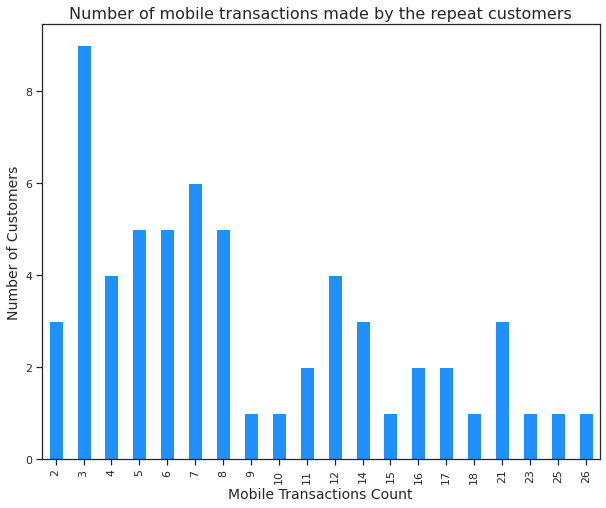

In [ ]:
# Let's look at the number of purchases
ax = df_summary.groupby('amount_count').count()['amount_avg'][:20].plot(
        kind='bar', 
        color='dodgerblue', 
        figsize=(10,8), 
        grid=False)
plt.xlabel('Mobile Transactions Count', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Number of mobile transactions made by the repeat customers', fontsize=16);

In our analysis, we consider repeat customers who made at least 2 mobile transactions. As you can see, repeat customers tend to make about 3 mobile transactions or more.

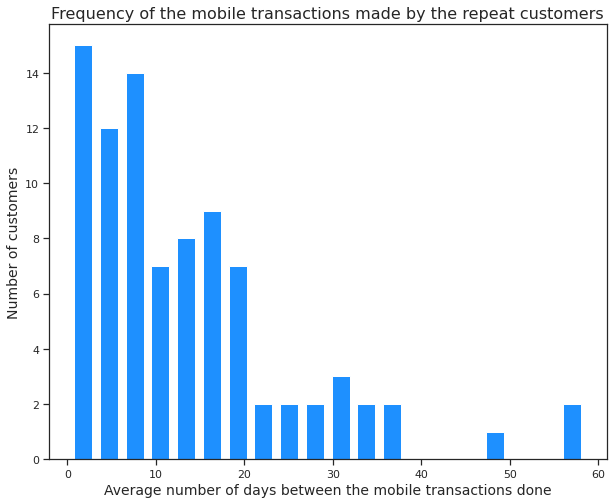

In [ ]:
ax = df_summary['trans_date_transactions_frequency'].hist(
        bins=20,
        color='dodgerblue',
        rwidth=0.7,
        figsize=(10,8),
        grid=False)
plt.xlabel('Average number of days between the mobile transactions done', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Frequency of the mobile transactions made by the repeat customers', fontsize=16);

As you can see from this plot, the majority of repeat customers tend to make a mobile transaction every 1 to 20 days lifeline.

**Predict 1-Month Customer Life Time Value**

We are going to build a model, which predicts the CLTV for a 1 month projection. 

First, let us slice the data into chunks with 1-month data each and take the last chunk as the target for predictions.

In [ ]:
clv_freq = '1M'

In [ ]:
df_data = cltv_dataset.reset_index().groupby([
            'CUSTOMER_NUMBER',
            pd.Grouper(key='TRANS_DATE', freq=clv_freq)
            ]).agg({'AMOUNT': [sum, groupby_mean, groupby_count],})

In [ ]:
df_data.columns = ['_'.join(col).lower() for col in df_data.columns]

In [ ]:
df_data = df_data.reset_index()

In [ ]:
df_data.head()

CUSTOMER_NUMBER TRANS_DATE    amount_sum   amount_avg  amount_count
0            10468 2021-01-31    516075.450    86012.575             6
1            10468 2021-02-28    121900.000    24380.000             5
2            10468 2021-05-31    761500.000   253833.333             3
3            10468 2021-06-30    198000.000    39600.000             5
4            10468 2021-07-31 834300715.240 41715035.762            20

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CUSTOMER_NUMBER  506 non-null    int64         
 1   TRANS_DATE       506 non-null    datetime64[ns]
 2   amount_sum       506 non-null    float64       
 3   amount_avg       506 non-null    float64       
 4   amount_count     506 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 19.9 KB


For further simplicity, let us encode the Date Column and define in which Month the mobile transaction was made

In [ ]:
map_date_month = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
                    sorted(df_data.reset_index()['TRANS_DATE'].unique(), reverse=True))}

In [ ]:
map_date_month

{'2021-01-31': 'M_12',
 '2021-02-28': 'M_11',
 '2021-03-31': 'M_10',
 '2021-04-30': 'M_9',
 '2021-05-31': 'M_8',
 '2021-06-30': 'M_7',
 '2021-07-31': 'M_6',
 '2021-08-31': 'M_5',
 '2021-09-30': 'M_4',
 '2021-10-31': 'M_3',
 '2021-11-30': 'M_2',
 '2021-12-31': 'M_1'}

In [ ]:
df_data['M'] = df_data['TRANS_DATE'].apply(lambda x: map_date_month[str(x)[:10]])

In [ ]:
df_data.head()

CUSTOMER_NUMBER TRANS_DATE    amount_sum   amount_avg  amount_count     M
0            10468 2021-01-31    516075.450    86012.575             6  M_12
1            10468 2021-02-28    121900.000    24380.000             5  M_11
2            10468 2021-05-31    761500.000   253833.333             3   M_8
3            10468 2021-06-30    198000.000    39600.000             5   M_7
4            10468 2021-07-31 834300715.240 41715035.762            20   M_6

In [ ]:
# Number of purchases made in each chunk
df_data['M'].value_counts()

M_4     86
M_5     80
M_6     78
M_11    37
M_7     36
M_12    30
M_1     30
M_10    30
M_8     29
M_3     27
M_9     25
M_2     18
Name: M, dtype: int64

In [ ]:
df_features = pd.pivot_table(
                df_data.loc[df_data['M'] != 'M_1'], 
                values=['amount_sum', 'amount_avg', 'amount_count'], 
                columns='M', 
                index='CUSTOMER_NUMBER')

In [ ]:
df_features.reset_index()

CUSTOMER_NUMBER amount_avg                                                 \
M                         M_10        M_11        M_12        M_2         M_3   
0             10468        NaN   24380.000   86012.575 136473.417  423000.000   
1             10846   1000.000    4494.286    6909.000        NaN         NaN   
2             10953 577811.043  485385.460 2840265.683 207827.000 1052016.596   
3             10982        NaN         NaN         NaN        NaN         NaN   
4             10983        NaN         NaN         NaN  58000.000         NaN   
..              ...        ...         ...         ...        ...         ...   
99           752617        NaN 2000000.000         NaN        NaN         NaN   
100          820171 138200.000         NaN         NaN        NaN         NaN   
101          821073        NaN         NaN         NaN        NaN         NaN   
102          821319        NaN         NaN         NaN        NaN         NaN   
103          821410        NaN         NaN         NaN   5740.000         NaN   

                                                                              \
M           M_4          M_5          M_6        M_7          M_8        M_9   
0    104044.992 12473121.305 41715035.762  39600.000   253833.333        NaN   
1      6951.556     3510.714     1802.857   7217.700      966.667        NaN   
2    640776.118   945422.939   523864.131 780890.920   294482.381 661101.744   
3    400000.000   400000.000          NaN        NaN          NaN        NaN   
4   9729433.332 18094011.484   980179.780        NaN 13500000.000 126320.000   
..          ...          ...          ...        ...          ...        ...   
99          NaN 14643640.637 10848555.750        NaN          NaN        NaN   
100  133358.133   100768.500   175875.000        NaN   300000.000   1500.000   
101         NaN  4685934.333          NaN        NaN          NaN        NaN   
102   90000.000          NaN    85000.000  82500.000   160000.000  80000.000   
103   24026.333    38489.764    97285.200        NaN          NaN   6850.000   

    amount_count                                                             \
M           M_10   M_11   M_12    M_2    M_3     M_4     M_5     M_6    M_7   
0            NaN  5.000  6.000  3.000  2.000  18.000  28.000  20.000  5.000   
1          1.000  7.000  2.000    NaN    NaN  36.000  21.000  14.000 10.000   
2         27.000 34.000 21.000 15.000 27.000 164.000 141.000 136.000 36.000   
3            NaN    NaN    NaN    NaN    NaN   1.000   1.000     NaN    NaN   
4            NaN    NaN    NaN  1.000    NaN  14.000   5.000   4.000    NaN   
..           ...    ...    ...    ...    ...     ...     ...     ...    ...   
99           NaN  1.000    NaN    NaN    NaN     NaN   4.000   2.000    NaN   
100        1.000    NaN    NaN    NaN    NaN   3.000   8.000   4.000    NaN   
101          NaN    NaN    NaN    NaN    NaN     NaN   3.000     NaN    NaN   
102          NaN    NaN    NaN    NaN    NaN   1.000     NaN   2.000  4.000   
103          NaN    NaN    NaN  1.000    NaN   3.000   7.000  16.000    NaN   

                   amount_sum                                        \
M      M_8   M_9         M_10         M_11         M_12         M_2   
0    3.000   NaN          NaN   121900.000   516075.450  409420.250   
1    6.000   NaN     1000.000    31460.000    13818.000         NaN   
2   27.000 9.000 15600898.150 16503105.650 59645579.350 3117405.000   
3      NaN   NaN          NaN          NaN          NaN         NaN   
4    1.000 2.000          NaN          NaN          NaN   58000.000   
..     ...   ...          ...          ...          ...         ...   
99     NaN   NaN          NaN  2000000.000          NaN         NaN   
100  1.000 1.000   138200.000          NaN          NaN         NaN   
101    NaN   NaN          NaN          NaN          NaN         NaN   
102  1.000 1.000          NaN          NaN          NaN         NaN   
103    NaN 1.000          NaN

In [ ]:
df_features.columns = ['_'.join(col) for col in df_features.columns]

In [ ]:
df_features.head()

amount_avg_M_10  amount_avg_M_11  amount_avg_M_12  \
CUSTOMER_NUMBER                                                      
10468                        NaN        24380.000        86012.575   
10846                   1000.000         4494.286         6909.000   
10953                 577811.043       485385.460      2840265.683   
10982                        NaN              NaN              NaN   
10983                        NaN              NaN              NaN   

                 amount_avg_M_2  amount_avg_M_3  amount_avg_M_4  \
CUSTOMER_NUMBER                                                   
10468                136473.417      423000.000      104044.992   
10846                       NaN             NaN        6951.556   
10953                207827.000     1052016.596      640776.118   
10982                       NaN             NaN      400000.000   
10983                 58000.000             NaN     9729433.332   

                 amount_avg_M_5  amount_avg_M_6  amount_avg_M_7  \
CUSTOMER_NUMBER                                                   
10468              12473121.305    41715035.762       39600.000   
10846                  3510.714        1802.857        7217.700   
10953                945422.939      523864.131      780890.920   
10982                400000.000             NaN             NaN   
10983              18094011.484      980179.780             NaN   

                 amount_avg_M_8  amount_avg_M_9  amount_count_M_10  \
CUSTOMER_NUMBER                                                      
10468                253833.333             NaN                NaN   
10846                   966.667             NaN              1.000   
10953                294482.381      661101.744             27.000   
10982                       NaN             NaN                NaN   
10983              13500000.000      126320.000                NaN   

                 amount_count_M_11  amount_count_M_12  amount_count_M_2  \
CUSTOMER_NUMBER                                                           
10468                        5.000              6.000             3.000   
10846                        7.000              2.000               NaN   
10953                       34.000             21.000            15.000   
10982                          NaN                NaN               NaN   
10983                          NaN                NaN             1.000   

                 amount_count_M_3  amount_count_M_4  amount_count_M_5  \
CUSTOMER_NUMBER                                                         
10468                       2.000            18.000            28.000   
10846                         NaN            36.000            21.000   
10953                      27.000           164.000           141.000   
10982                         NaN             1.000             1.000   
10983                         NaN            14.000             5.000   

                 amount_count_M_6  amount_count_M_7  amount_count_M_8  \
CUSTOMER_NUMBER                                                         
10468                      20.000             5.000             3.000   
10846                      14.000            10.000             6.000   
10953                     136.000            36.000            27.000   
10982                         NaN               NaN               NaN   
10983                       4.000               NaN             1.000   

                 amount_count_M_9  amount_sum_M_10  amount_sum_M_11  \
CUSTOMER_NUMBER                                                       
10468                         NaN              NaN       121900.000   
10846                         NaN         1000.000        31460.000   
10953                       9.000     15600898.150     16503105.650   
10982                         NaN              NaN              NaN   
10983                       2.000              NaN              NaN   

                 amount_sum_M_12  amount_sum_M_

In [ ]:
df_features.reset_index(level=0, inplace=True)

In [ ]:
df_features.head()

CUSTOMER_NUMBER  amount_avg_M_10  amount_avg_M_11  amount_avg_M_12  \
0            10468              NaN        24380.000        86012.575   
1            10846         1000.000         4494.286         6909.000   
2            10953       577811.043       485385.460      2840265.683   
3            10982              NaN              NaN              NaN   
4            10983              NaN              NaN              NaN   

   amount_avg_M_2  amount_avg_M_3  amount_avg_M_4  amount_avg_M_5  \
0      136473.417      423000.000      104044.992    12473121.305   
1             NaN             NaN        6951.556        3510.714   
2      207827.000     1052016.596      640776.118      945422.939   
3             NaN             NaN      400000.000      400000.000   
4       58000.000             NaN     9729433.332    18094011.484   

   amount_avg_M_6  amount_avg_M_7  amount_avg_M_8  amount_avg_M_9  \
0    41715035.762       39600.000      253833.333             NaN   
1        1802.857        7217.700         966.667             NaN   
2      523864.131      780890.920      294482.381      661101.744   
3             NaN             NaN             NaN             NaN   
4      980179.780             NaN    13500000.000      126320.000   

   amount_count_M_10  amount_count_M_11  amount_count_M_12  amount_count_M_2  \
0                NaN              5.000              6.000             3.000   
1              1.000              7.000              2.000               NaN   
2             27.000             34.000             21.000            15.000   
3                NaN                NaN                NaN               NaN   
4                NaN                NaN                NaN             1.000   

   amount_count_M_3  amount_count_M_4  amount_count_M_5  amount_count_M_6  \
0             2.000            18.000            28.000            20.000   
1               NaN            36.000            21.000            14.000   
2            27.000           164.000           141.000           136.000   
3               NaN             1.000             1.000               NaN   
4               NaN            14.000             5.000             4.000   

   amount_count_M_7  amount_count_M_8  amount_count_M_9  amount_sum_M_10  \
0             5.000             3.000               NaN              NaN   
1            10.000             6.000               NaN         1000.000   
2            36.000            27.000             9.000     15600898.150   
3               NaN               NaN               NaN              NaN   
4               NaN             1.000             2.000              NaN   

   amount_sum_M_11  amount_sum_M_12  amount_sum_M_2  amount_sum_M_3  \
0       121900.000       516075.450      409420.250      846000.000   
1        31460.000        13818.000             NaN             NaN   
2     16503105.650     59645579.350     3117405.000    28404448.100   
3              NaN              NaN             NaN             NaN   
4              NaN              NaN       58000.000             NaN   

   amount_sum_M_4  amount_sum_M_5  amount_sum_M_6  amount_sum_M_7  \
0     1872809.850   349247396.530   834300715.240      198000.000   
1      250256.000       73725.000       25240.000       72177.000   
2   105087283.420   133304634.390    71245521.750    28112073.110   
3      400000.000      400000.000             NaN             NaN   
4   136212066.650    90470057.420     3920719.120             NaN   

   amount_sum_M_8  amount_sum_M_9  
0      761500.000             NaN  
1        5800.000             NaN  
2     7951024.300     5949915.700  
3             NaN             NaN  
4    13500000.000      252640.000

In [ ]:
df_features.fillna(0, inplace=True)

In [ ]:
# Let's check the Null values
df_features.isnull().sum().sum()

0

In [ ]:
df_target = df_data.loc[df_data['M'] == 'M_1', ['CUSTOMER_NUMBER', 'amount_sum']]

In [ ]:
df_target.columns = ['CUSTOMER_NUMBER', 'CLV_'+clv_freq]

In [ ]:
df_sample_set = df_features.merge(
                df_target, 
                left_on='CUSTOMER_NUMBER', 
                right_on='CUSTOMER_NUMBER',
                how='left')

In [ ]:
df_sample_set.fillna(0, inplace=True)

In [ ]:
df_sample_set['CLV_1M'].describe()

count        104.000
mean     1136852.721
std      4411478.823
min            0.000
25%            0.000
50%            0.000
75%         5734.500
max     32852393.000
Name: CLV_1M, dtype: float64

**Build a Simple Linear Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
target_var = 'CLV_1M'
all_features = [x for x in df_sample_set.columns if x not in ['CUSTOMER_NUMBER', target_var]]

In [ ]:
all_features

['amount_avg_M_10',
 'amount_avg_M_11',
 'amount_avg_M_12',
 'amount_avg_M_2',
 'amount_avg_M_3',
 'amount_avg_M_4',
 'amount_avg_M_5',
 'amount_avg_M_6',
 'amount_avg_M_7',
 'amount_avg_M_8',
 'amount_avg_M_9',
 'amount_count_M_10',
 'amount_count_M_11',
 'amount_count_M_12',
 'amount_count_M_2',
 'amount_count_M_3',
 'amount_count_M_4',
 'amount_count_M_5',
 'amount_count_M_6',
 'amount_count_M_7',
 'amount_count_M_8',
 'amount_count_M_9',
 'amount_sum_M_10',
 'amount_sum_M_11',
 'amount_sum_M_12',
 'amount_sum_M_2',
 'amount_sum_M_3',
 'amount_sum_M_4',
 'amount_sum_M_5',
 'amount_sum_M_6',
 'amount_sum_M_7',
 'amount_sum_M_8',
 'amount_sum_M_9']

In [ ]:
df_sample_set

CUSTOMER_NUMBER  amount_avg_M_10  amount_avg_M_11  amount_avg_M_12  \
0              10468            0.000        24380.000        86012.575   
1              10846         1000.000         4494.286         6909.000   
2              10953       577811.043       485385.460      2840265.683   
3              10982            0.000            0.000            0.000   
4              10983            0.000            0.000            0.000   
..               ...              ...              ...              ...   
99            752617            0.000      2000000.000            0.000   
100           820171       138200.000            0.000            0.000   
101           821073            0.000            0.000            0.000   
102           821319            0.000            0.000            0.000   
103           821410            0.000            0.000            0.000   

     amount_avg_M_2  amount_avg_M_3  amount_avg_M_4  amount_avg_M_5  \
0        136473.417      423000.000      104044.992    12473121.305   
1             0.000           0.000        6951.556        3510.714   
2        207827.000     1052016.596      640776.118      945422.939   
3             0.000           0.000      400000.000      400000.000   
4         58000.000           0.000     9729433.332    18094011.484   
..              ...             ...             ...             ...   
99            0.000           0.000           0.000    14643640.637   
100           0.000           0.000      133358.133      100768.500   
101           0.000           0.000           0.000     4685934.333   
102           0.000           0.000       90000.000           0.000   
103        5740.000           0.000       24026.333       38489.764   

     amount_avg_M_6  amount_avg_M_7  amount_avg_M_8  amount_avg_M_9  \
0      41715035.762       39600.000      253833.333           0.000   
1          1802.857        7217.700         966.667           0.000   
2        523864.131      780890.920      294482.381      661101.744   
3             0.000           0.000           0.000           0.000   
4        980179.780           0.000    13500000.000      126320.000   
..              ...             ...             ...             ...   
99     10848555.750           0.000           0.000           0.000   
100      175875.000           0.000      300000.000        1500.000   
101           0.000           0.000           0.000           0.000   
102       85000.000       82500.000      160000.000       80000.000   
103       97285.200           0.000           0.000        6850.000   

     amount_count_M_10  amount_count_M_11  amount_count_M_12  \
0                0.000              5.000              6.000   
1                1.000              7.000              2.000   
2               27.000             34.000             21.000   
3                0.000              0.000              0.000   
4                0.000              0.000              0.000   
..                 ...                ...                ...   
99               0.000              1.000              0.000   
100              1.000              0.000              0.000   
101              0.000              0.000              0.000   
102              0.000              0.000              0.000   
103              0.000              0.000              0.000   

     amount_count_M_2  amount_count_M_3  amount_count_M_4  amount_count_M_5  \
0               3.000             2.000            18.000            28.000   
1               0.000             0.000            36.000            21.000   
2              15.000            27.000           164.000           141.000   
3               0.000             0.000             1.000             1.000   
4               1.000             0.000            14.000             5.000   
..                ...               ...               ...               ...   
99              0.000             0.000             0.000             4.000 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                    df_sample_set[all_features], 
                                    df_sample_set[target_var], 
                                    random_state=2,
                                    test_size=0.35)

In [ ]:
lin_reg = LinearRegression(n_jobs=1)

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [ ]:
lin_reg.intercept_

118246.49772856513

In [ ]:
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['feature', 'coef']

In [ ]:
coef

feature        coef
0     amount_avg_M_10       1.281
1     amount_avg_M_11      -0.010
2     amount_avg_M_12       0.257
3      amount_avg_M_2       3.119
4      amount_avg_M_3       1.952
5      amount_avg_M_4      -0.056
6      amount_avg_M_5      -0.167
7      amount_avg_M_6       0.020
8      amount_avg_M_7       0.197
9      amount_avg_M_8       0.131
10     amount_avg_M_9      -0.129
11  amount_count_M_10   79284.681
12  amount_count_M_11   88959.777
13  amount_count_M_12  120643.981
14   amount_count_M_2 -320845.243
15   amount_count_M_3  164811.645
16   amount_count_M_4   83075.868
17   amount_count_M_5 -133573.069
18   amount_count_M_6   47151.543
19   amount_count_M_7  109614.742
20   amount_count_M_8    8016.628
21   amount_count_M_9 -269299.912
22    amount_sum_M_10      -0.666
23    amount_sum_M_11      -0.003
24    amount_sum_M_12      -0.374
25     amount_sum_M_2       0.045
26     amount_sum_M_3      -0.974
27     amount_sum_M_4       0.005
28     amount_sum_M_5       0.051
29     amount_sum_M_6      -0.000
30     amount_sum_M_7      -0.096
31     amount_sum_M_8      -0.279
32     amount_sum_M_9       0.061

**Evaluate the Model**

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error

In [ ]:
train_preds =  lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

**R-Squared**

In [ ]:
print('R-Squared for Train set: %0.2f' % r2_score(y_true=y_train, y_pred=train_preds))
print('R-Squared for Test set: %0.2f' % r2_score(y_true=y_test, y_pred=test_preds))

R-Squared for Train set: 0.89
R-Squared for Test set: -5.27


**Median Absolute Error**

In [ ]:
print('Median Absolute Error for Train set: %0.2f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Median Absolute Error for Test set: %0.2f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

Median Absolute Error for Train set: 215008.87
Median Absolute Error for Test set: 486329.50


**Scatter Plot**

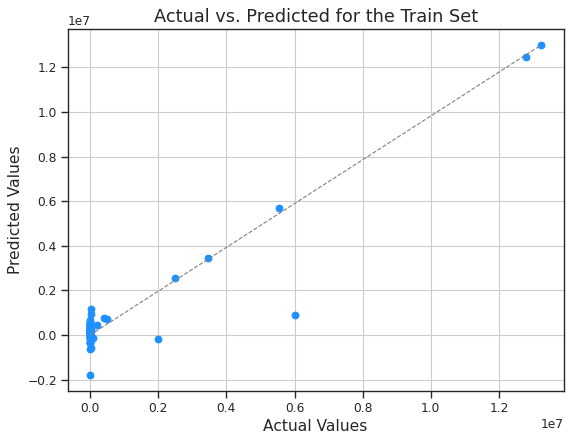

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train, train_preds, color='dodgerblue')
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for the Train Set', fontsize=16)
plt.grid()

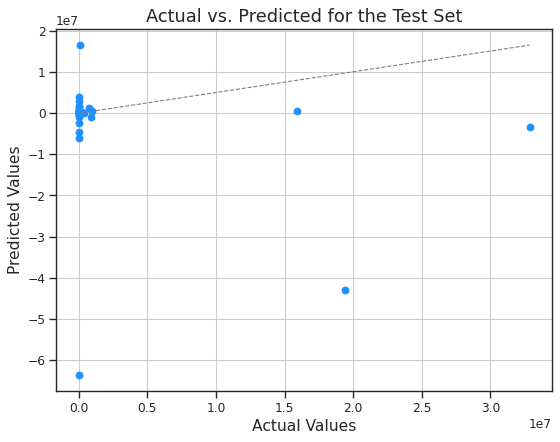

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for the Test Set', fontsize=16)
plt.grid()

As you can see on this plot, the x-axis is the actual values and the y-axis represents the predicted values. Closer the dots are located to the straight diagonal line, better predictions are.

**Summary**

Based on the data analysis, we found that the repeat customers tend to make about 12 purchases or less within a year and the majority of repeat customers tend to make a purchase every 12 to 50 days
We predicted 3-month CLTV for customers of the online retail using linear regression

R-squared value for the test set is -5.27, which is not great but it is a good benchmark to try other regression models such as Epsilon-Support Vector Regression and Random Forest Regressor


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='mse'),
    n_estimators=150
)
model=adaboost.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 5768816.580300563
MAE 2169667.2692015767
R-squared: 0.21695629320114618


In [ ]:
from sklearn import metrics

# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

MAE: 2169667.2692015767
MSE 33279244737150.684
RMSE: 5768816.580300563
R-squared: 0.21695629320114618


**Serializing and saving the model to file using joblib**

In [ ]:
!pip install joblib

In [ ]:
# Saving model to disk
pickle.dump(model, open('adaboost_model.pkl','wb'))

# Loading model to compare the results
model_adaboost = pickle.load(open('adaboost_model.pkl','rb'))

In [ ]:
filename = 'adaboost_model.sav'
joblib.dump(model, filename)

['adaboost_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.21695629320114618


In [ ]:
#Import required libraries and modules
# app.py
import json
import pickle
import pandas as pd
import datetime
#import packages
import os
import numpy as np

from flask import Flask, abort, jsonify, request, url_for
from flask_httpauth import HTTPBasicAuth
from flask_restful import Api, Resource, reqparse
from utils import read_data
auth = HTTPBasicAuth()

from flask import Flask
from flask_restful import Api, Resource, reqparse

APP = Flask(__name__)
API = Api(APP)

model = pickle.load(open("lin_reg_model.pkl", ‘rb’)
class Predict(Resource):

    @staticmethod
    def post():
        parser = reqparse.RequestParser()
        parser.add_argument('customer_number')
        parser.add_argument('account_number')
        parser.add_argument('trans_date')
        parser.add_argument('amount')

        args = parser.parse_args()  # creates dict
        X_new = np.fromiter(args.values(), dtype=float)  # convert input to array
        prediction_out = {'Prediction': model.predict([X_new])[0]} 
        final_predictions = pd.DataFrame([prediction_out])
        return final_predictions, 200

    except:
        if start_date and end_date not in load_data(customer_number, start_date, end_date):
            return jsonify({'Message': 'Invalid date input.'})
        return jsonify({"Error: No input customer number data provided"})

API.add_resource(Predict, '/predict')

if __name__ == '__main__':
    APP.run(debug=True, port='1080')

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostRegressor
import joblib

In [ ]:
# saving our model # model - model , filename-model_jlib
joblib.dump(gg , 'model_jlib')

['model_jlib']

In [ ]:
filename = 'gamma_finalized_model.sav'
joblib.dump(gg, filename)

['gamma_finalized_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model
print(result)

<lifetimes.GammaGammaFitter: fitted with 88 subjects, p: 2.12, q: 0.09, v: 2.06>


**Implementing the Probabilistic Models**

**Predicting Customer Lifetime Value and Future Purchases**

In [ ]:
cltv_dataset.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION  
0              MFS  MOBILE BANKING OPERATION  
1              MFS  MOBILE BANKING OPERATION  
2               VI         INTERNAL TRANSFER

**Creating the RFM Matrix based on Transaction Log**

In [ ]:
from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

In [ ]:
# transform our transaction level data into the required summary form for Lifetimes
RFM_data = summary_data_from_transaction_data(cltv_dataset, customer_id_col = 'CUSTOMER_NUMBER', datetime_col = 'TRANS_DATE', monetary_value_col = 'AMOUNT', freq = 'D')
# used freq = 'D' since we have a daily transactions log
RFM_data.head(10)

frequency  recency       T  monetary_value
CUSTOMER_NUMBER                                            
10468               47.000  334.000 335.000    25279393.870
10846               32.000  335.000 335.000       15089.469
10953               64.000  335.000 335.000     7682873.763
10982                2.000  109.000 110.000      400000.000
10983               16.000  214.000 244.000    15260052.699
11312                1.000   41.000 117.000      900000.000
11339               40.000  335.000 335.000      965131.348
11437               30.000  266.000 335.000     4104317.873
11520               64.000  335.000 335.000     5168516.407
11563                7.000  265.000 335.000      427407.071

In [ ]:
one_time_buyers = round(sum(RFM_data['frequency'] == 0)/float(len(RFM_data))*(100),2)
print("The Percentage of mobile customers who have transacted once is:", one_time_buyers ,"%")

The Percentage of mobile customers who have transacted once is: 16.19 %


In [ ]:
# retain only those customers with frequency > 0
RFM_data = RFM_data[RFM_data['frequency'] > 0]

In [ ]:
#Last day of calibration period 
lastDayCal = pd.Timestamp('2021-08-26')

In [ ]:
#Sum monetary daily for customer

df_M_perDay_cal = cltv_dataset[ cltv_dataset['TRANS_DATE'] <= lastDayCal 
                       ].groupby(['CUSTOMER_NUMBER','TRANS_DATE']
                                    ).agg(monetary_value_sum_day = ('AMOUNT', np.sum))
df_M_perDay_cal.head()

df_M_perDay_hold = cltv_dataset[ cltv_dataset['TRANS_DATE'] > lastDayCal 
                       ].groupby(['CUSTOMER_NUMBER','TRANS_DATE']
                                    ).agg(monetary_value_sum_day = ('AMOUNT', np.sum))
df_M_perDay_hold.head()

monetary_value_sum_day
CUSTOMER_NUMBER TRANS_DATE                        
10468           2021-08-27              111968.000
                2021-08-30           347577877.430
                2021-08-31               64305.450
                2021-09-07              125000.000
                2021-09-08                6500.000

In [ ]:
#Average per day per customer
df_M_perDay_cal.reset_index(inplace=True)
df_M_avg_cal = df_M_perDay_cal.groupby('CUSTOMER_NUMBER').agg(monetary_value_avg_cal = ('monetary_value_sum_day', np.mean))

df_M_perDay_hold.reset_index(inplace=True)
df_M_avg_hold = df_M_perDay_hold.groupby('CUSTOMER_NUMBER').agg(monetary_value_avg_hold = ('monetary_value_sum_day', np.mean))

In [ ]:
#Check data dimensions
RFM_data.shape
df_M_avg_cal.shape
df_M_avg_hold.shape

(93, 1)

In [ ]:
calibration_period_ends = '2021-08-22'

from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(cltv_dataset, 
                                                   customer_id_col = 'CUSTOMER_NUMBER', 
                                                   datetime_col = 'TRANS_DATE', 
                                                   freq = 'D', #days
                                        calibration_period_end=calibration_period_ends,
                                        observation_period_end='2021-12-02' )

In [ ]:
summary_cal_holdout.head()

frequency_cal  recency_cal   T_cal  frequency_holdout  \
CUSTOMER_NUMBER                                                          
10468                   25.000      224.000 227.000             21.000   
10846                   16.000      225.000 227.000             14.000   
10953                   35.000      225.000 227.000             27.000   
10982                    0.000        0.000   2.000              1.000   
10983                    5.000      121.000 136.000             11.000   

                 duration_holdout  
CUSTOMER_NUMBER                    
10468                     102.000  
10846                     102.000  
10953                     102.000  
10982                     102.000  
10983                     102.000

In [ ]:
from lifetimes import BetaGeoFitter

In [ ]:
# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(RFM_data['frequency'], RFM_data['recency'], RFM_data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 88 subjects, a: 0.16, alpha: 24.31, b: 6.22, r: 1.46>


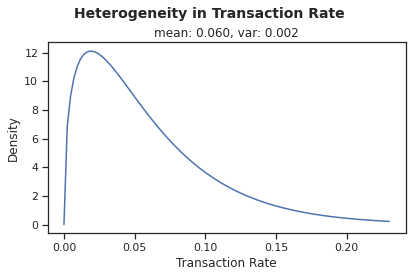

In [ ]:
# plot the estimated gamma distribution of λ (customers' propensities to purchase)
plot_transaction_rate_heterogeneity(bgf);

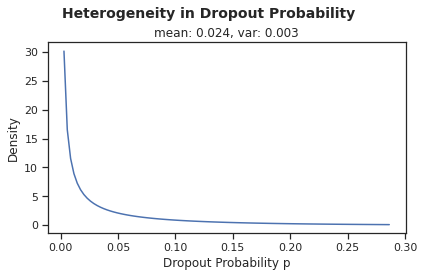

In [ ]:
# plot the estimated beta distribution of p, a customers' probability of dropping out immediately after a transaction
plot_dropout_rate_heterogeneity(bgf);

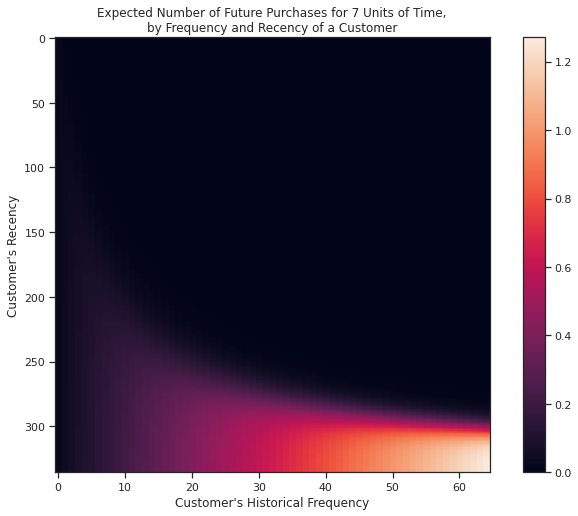

In [ ]:
# visualize our frequency/recency matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf, T = 7);

In [ ]:
# partition the dataset into a calibration and a holdout dataset
summary_cal_holdout = calibration_and_holdout_data(cltv_dataset, 'CUSTOMER_NUMBER', 'TRANS_DATE', freq = "D", monetary_value_col = 'AMOUNT', calibration_period_end='2021-08-22')
summary_cal_holdout.head()

frequency_cal  recency_cal   T_cal  monetary_value_cal  \
CUSTOMER_NUMBER                                                           
10468                   25.000      224.000 227.000        33475863.236   
10846                   16.000      225.000 227.000           10154.125   
10953                   35.000      225.000 227.000         7996870.958   
10982                    0.000        0.000   2.000               0.000   
10983                    5.000      121.000 136.000         3526943.824   

                 frequency_holdout  monetary_value_holdout  duration_holdout  
CUSTOMER_NUMBER                                                               
10468                       22.000             8780873.274           108.000  
10846                       16.000                5721.375           108.000  
10953                       29.000              676720.247           108.000  
10982                        2.000              400000.000           108.000  
10983                       11.000            12584784.671           108.000

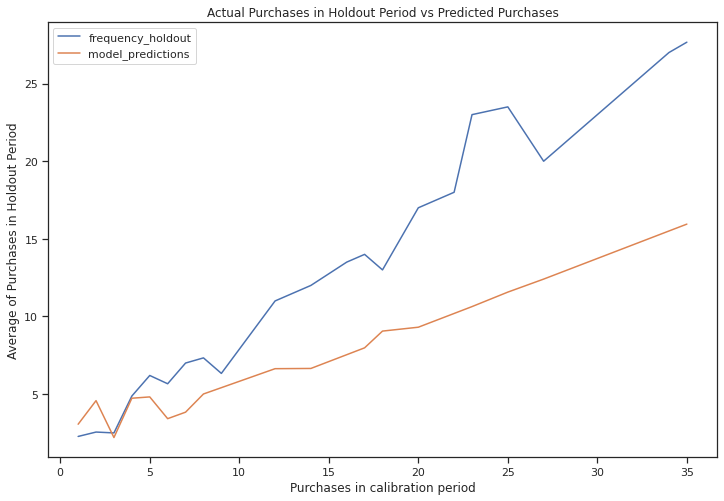

In [ ]:
# again, retain only the +ve frequency_cal values
summary_cal_holdout = summary_cal_holdout[summary_cal_holdout['frequency_cal'] > 0]
# compare the predicted # of repeat puchases with actual repeat purchases during the holdout period
bgf_cal = BetaGeoFitter(penalizer_coef=0.1)
bgf_cal.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf_cal, summary_cal_holdout, kind = 'frequency_cal', n = int(summary_cal_holdout['frequency_holdout'].max()), figsize = (12,8));

In [ ]:
# Let's fit the Gamma-Gamma model to our data_summary
ggf = GammaGammaFitter()
ggf.fit(frequency = RFM_data['frequency'], monetary_value = RFM_data['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 88 subjects, p: 0.16, q: 0.42, v: 953059.37>

In [ ]:
# Calculate the expected number of repeat purchases up to time t for a randomly chosen individual from the population
t = 30 # to calculate the number of expected repeat purchases over the next 30 days
RFM_data['predicted_mobile_transactions'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, RFM_data['frequency'], RFM_data['recency'], RFM_data['T'])
RFM_data.sort_values(by='predicted_mobile_transactions').tail(5)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
11520               64.000  335.000 335.000     5168516.407   
101122              64.000  335.000 335.000     3223472.450   
10953               64.000  335.000 335.000     7682873.763   
103027              64.000  335.000 335.000     6367557.470   
12409               64.000  335.000 335.000     1157789.288   

                 predicted_mobile_transactions  
CUSTOMER_NUMBER                                 
11520                                    5.421  
101122                                   5.421  
10953                                    5.421  
103027                                   5.421  
12409                                    5.421

In [ ]:
# Calculate probability of being currently alive and assign to each CustomerID
RFM_data['p_alive'] = bgf.conditional_probability_alive(RFM_data['frequency'], RFM_data['recency'], RFM_data['T'])
RFM_data.sort_values(by='predicted_mobile_transactions').tail(5)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
11520               64.000  335.000 335.000     5168516.407   
101122              64.000  335.000 335.000     3223472.450   
10953               64.000  335.000 335.000     7682873.763   
103027              64.000  335.000 335.000     6367557.470   
12409               64.000  335.000 335.000     1157789.288   

                 predicted_mobile_transactions  p_alive  
CUSTOMER_NUMBER                                          
11520                                    5.421    0.998  
101122                                   5.421    0.998  
10953                                    5.421    0.998  
103027                                   5.421    0.998  
12409                                    5.421    0.998

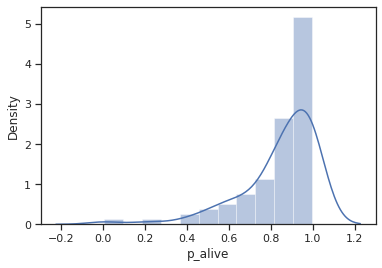

In [ ]:
sns.distplot(RFM_data['p_alive']);

In [ ]:
RFM_data['churn'] = ['churned' if p_alive < 0.5 else 'not churned' for p_alive in RFM_data['p_alive']]
RFM_data['churn'][(RFM_data['p_alive'] >= 0.5) & (RFM_data['p_alive'] < 0.75)] = "high risk"
RFM_data['churn'].value_counts()

not churned    70
high risk      14
churned         4
Name: churn, dtype: int64

In [ ]:
# After applying Gamma-Gamma model, now we can estimate average transaction value for each customer over his/her lifetime
RFM_data['predicted_mobile_transactions'] = ggf.conditional_expected_average_profit(RFM_data['frequency'], RFM_data['monetary_value'])
RFM_data.head()

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
10468               47.000  334.000 335.000    25279393.870   
10846               32.000  335.000 335.000       15089.469   
10953               64.000  335.000 335.000     7682873.763   
10982                2.000  109.000 110.000      400000.000   
10983               16.000  214.000 244.000    15260052.699   

                 predicted_mobile_transactions  p_alive        churn  
CUSTOMER_NUMBER                                                       
10468                             27456061.672    0.997  not churned  
10846                                50723.828    0.996  not churned  
10953                              8168929.290    0.998  not churned  
10982                             -1036476.477    0.978  not churned  
10983                             19913978.250    0.945  not churned

In [ ]:
# Final piece of the puzzle - calculate LTV for each customer over the next 1 month
RFM_data['LTV'] = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    RFM_data['frequency'], RFM_data['recency'], RFM_data['T'], RFM_data['monetary_value'],
    time = 1, # number of months to predict LTV for
)
RFM_data.head()

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
10468               47.000  334.000 335.000    25279393.870   
10846               32.000  335.000 335.000       15089.469   
10953               64.000  335.000 335.000     7682873.763   
10982                2.000  109.000 110.000      400000.000   
10983               16.000  214.000 244.000    15260052.699   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
10468                             27456061.672    0.997  not churned   
10846                                50723.828    0.996  not churned   
10953                              8168929.290    0.998  not churned   
10982                             -1036476.477    0.978  not churned   
10983                             19913978.250    0.945  not churned   

                          LTV  
CUSTOMER_NUMBER                
10468           108980969.786  
10846              138938.522  
10953            43844896.238  
10982             -769732.137  
10983            36131890.543

In [ ]:
# Let's identify our top 20 customers based on LTV
best_projected_cust_LTV = RFM_data.sort_values('LTV').tail(20)
best_projected_cust_LTV

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
101122              64.000  335.000 335.000     3223472.450   
105960               7.000  109.000 184.000    11354224.377   
104091               8.000  146.000 215.000    11186248.260   
80088               23.000  302.000 303.000     7674072.285   
101476              47.000  335.000 335.000     5380001.579   
102204              30.000  305.000 335.000     9811999.421   
11520               64.000  335.000 335.000     5168516.407   
752617               5.000  204.000 304.000    16054334.810   
220575               5.000  114.000 183.000    10535289.060   
10983               16.000  214.000 244.000    15260052.699   
103027              64.000  335.000 335.000     6367557.470   
109464              50.000  333.000 333.000     8707332.394   
10953               64.000  335.000 335.000     7682873.763   
12481                7.000   74.000 146.000    37606962.173   
40057                4.000  251.000 333.000    10713054.795   
106254              46.000  335.000 335.000    14181685.067   
602168               5.000  235.000 304.000    29236014.920   
10468               47.000  334.000 335.000    25279393.870   
602184               4.000   62.000 131.000    51368222.335   
40207                4.000  168.000 244.000   133554877.112   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
101122                             3436577.431    0.998  not churned   
105960                            24309908.551    0.643    high risk   
104091                            20991110.147    0.773  not churned   
80088                              9190536.565    0.994  not churned   
101476                             5860566.369    0.997  not churned   
102204                            11224947.047    0.936  not churned   
11520                              5500673.426    0.998  not churned   
752617                            62068256.821    0.863  not churned   
220575                            40981234.764    0.828  not churned   
10983                             19913978.250    0.945  not churned   
103027                             6773105.262    0.998  not churned   
109464                             9421993.824    0.997  not churned   
10953                              8168929.290    0.998  not churned   
12481                             79852187.661    0.429      churned   
40057                            141932012.677    0.935  not churned   
106254                            15441541.957    0.997  not churned   
602168                           112432466.834    0.935  not churned   
10468                             27456061.672    0.997  not churned   
602184                           668833787.647    0.706    high risk   
40207                           1733994673.740    0.906  not churned   

                          LTV  
CUSTOMER_NUMBER                
101122           18445058.774  
105960           18711174.713  
104091           18924096.462  
80088            20160523.983  
101476           23272250.549  
102204           27167723.939  
11520            29523631.190  
752617           31167952.034  
220575           31190680.717  
10983            36131890.543  
103027           36353123.751  
109464           39957307.943  
10953            43844896.238  
12481            50104696.718  
40057            59996026.151  
106254           60049986.996  
602168           61166928.993  
10468           108980969.786  
602184          488597512.191  
40207           944880240.336

In [ ]:
model_copy=best_projected_cust_LTV.copy()

In [ ]:
model_copy.reset_index(level=0, inplace=True)

In [ ]:
model_copy.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0           101122     64.000  335.000 335.000     3223472.450   
1           105960      7.000  109.000 184.000    11354224.377   
2           104091      8.000  146.000 215.000    11186248.260   

   predicted_mobile_transactions  p_alive        churn          LTV  
0                    3436577.431    0.998  not churned 18445058.774  
1                   24309908.551    0.643    high risk 18711174.713  
2                   20991110.147    0.773  not churned 18924096.462

In [ ]:
# Normalization 0-1 Range For CLV Values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(model_copy[["LTV"]])
model_copy["scaled_clv"] = scaler.transform(model_copy[["LTV"]])

model_copy.sort_values(by="scaled_clv", ascending=False).head()

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
19            40207      4.000  168.000 244.000   133554877.112   
18           602184      4.000   62.000 131.000    51368222.335   
17            10468     47.000  334.000 335.000    25279393.870   
16           602168      5.000  235.000 304.000    29236014.920   
15           106254     46.000  335.000 335.000    14181685.067   

    predicted_mobile_transactions  p_alive        churn           LTV  \
19                 1733994673.740    0.906  not churned 944880240.336   
18                  668833787.647    0.706    high risk 488597512.191   
17                   27456061.672    0.997  not churned 108980969.786   
16                  112432466.834    0.935  not churned  61166928.993   
15                   15441541.957    0.997  not churned  60049986.996   

    scaled_clv  
19       1.000  
18       0.507  
17       0.098  
16       0.046  
15       0.045

In [ ]:
# Segmentation of Customers
model_copy["segment"] = pd.qcut(model_copy["scaled_clv"], 4, labels=["D", "C", "B", "A"])
model_copy.head()

model_copy.head()

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0           101122     64.000  335.000 335.000     3223472.450   
1           105960      7.000  109.000 184.000    11354224.377   
2           104091      8.000  146.000 215.000    11186248.260   
3            80088     23.000  302.000 303.000     7674072.285   
4           101476     47.000  335.000 335.000     5380001.579   

   predicted_mobile_transactions  p_alive        churn          LTV  \
0                    3436577.431    0.998  not churned 18445058.774   
1                   24309908.551    0.643    high risk 18711174.713   
2                   20991110.147    0.773  not churned 18924096.462   
3                    9190536.565    0.994  not churned 20160523.983   
4                    5860566.369    0.997  not churned 23272250.549   

   scaled_clv segment  
0       0.000       D  
1       0.000       D  
2       0.001       D  
3       0.002       D  
4       0.005       D

In [ ]:
RFM_data["expected_average_profit"] = ggf.conditional_expected_average_profit(RFM_data['frequency'],
                                                                             RFM_data['monetary_value'])

RFM_data.sort_values("expected_average_profit", ascending=False).head(6)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
40207                4.000  168.000 244.000   133554877.112   
602184               4.000   62.000 131.000    51368222.335   
40057                4.000  251.000 333.000    10713054.795   
602168               5.000  235.000 304.000    29236014.920   
12481                7.000   74.000 146.000    37606962.173   
752617               5.000  204.000 304.000    16054334.810   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
40207                           1733994673.740    0.906  not churned   
602184                           668833787.647    0.706    high risk   
40057                            141932012.677    0.935  not churned   
602168                           112432466.834    0.935  not churned   
12481                             79852187.661    0.429      churned   
752617                            62068256.821    0.863  not churned   

                          LTV  expected_average_profit  
CUSTOMER_NUMBER                                         
40207           944880240.336           1733994673.740  
602184          488597512.191            668833787.647  
40057            59996026.151            141932012.677  
602168           61166928.993            112432466.834  
12481            50104696.718             79852187.661  
752617           31167952.034             62068256.821

In [ ]:
# 1 month expected mobile transactions

RFM_data["expected_transac_1_month"] = bgf.predict(4,
                                               RFM_data['frequency'],
                                               RFM_data['recency'],
                                               RFM_data['T'])

RFM_data.sort_values("expected_transac_1_month", ascending=False).head(10)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
103027              64.000  335.000 335.000     6367557.470   
10953               64.000  335.000 335.000     7682873.763   
101122              64.000  335.000 335.000     3223472.450   
11520               64.000  335.000 335.000     5168516.407   
12409               64.000  335.000 335.000     1157789.288   
12500               63.000  335.000 335.000      661555.237   
301660              56.000  335.000 335.000      312498.125   
109464              50.000  333.000 333.000     8707332.394   
101476              47.000  335.000 335.000     5380001.579   
10468               47.000  334.000 335.000    25279393.870   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
103027                             6773105.262    0.998  not churned   
10953                              8168929.290    0.998  not churned   
101122                             3436577.431    0.998  not churned   
11520                              5500673.426    0.998  not churned   
12409                              1244458.161    0.998  not churned   
12500                               718799.864    0.998  not churned   
301660                              352770.707    0.997  not churned   
109464                             9421993.824    0.997  not churned   
101476                             5860566.369    0.997  not churned   
10468                             27456061.672    0.997  not churned   

                          LTV  expected_average_profit  \
CUSTOMER_NUMBER                                          
103027           36353123.751              6773105.262   
10953            43844896.238              8168929.290   
101122           18445058.774              3436577.431   
11520            29523631.190              5500673.426   
12409             6679350.133              1244458.161   
12500             3798956.975               718799.864   
301660            1661615.988               352770.707   
109464           39957307.943              9421993.824   
101476           23272250.549              5860566.369   
10468           108980969.786             27456061.672   

                 expected_transac_1_month  
CUSTOMER_NUMBER                            
103027                              0.727  
10953                               0.727  
101122                              0.727  
11520                               0.727  
12409                               0.727  
12500                               0.715  
301660                              0.638  
109464                              0.574  
101476                              0.537  
10468                               0.537

In [ ]:
# 1 Month CLTV:
cltv_1 = ggf.customer_lifetime_value(bgf,
                                   RFM_data['frequency'],
                                   RFM_data['recency'],
                                   RFM_data['T'],
                                   RFM_data['monetary_value'],
                                   time=1,  # 1 month
                                   freq="W",  # frequency of T
                                   discount_rate=0.01)

cltv_1.head()
cltv_1= cltv_1.reset_index()
cltv_1 = RFM_data.merge(cltv_1, on="CUSTOMER_NUMBER", how="left")
cltv_1.sort_values(by="clv", ascending=False).head(10)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
26            40207      4.000  168.000 244.000   133554877.112   
75           602184      4.000   62.000 131.000    51368222.335   
0             10468     47.000  334.000 335.000    25279393.870   
74           602168      5.000  235.000 304.000    29236014.920   
49           106254     46.000  335.000 335.000    14181685.067   
23            40057      4.000  251.000 333.000    10713054.795   
18            12481      7.000   74.000 146.000    37606962.173   
2             10953     64.000  335.000 335.000     7682873.763   
51           109464     50.000  333.000 333.000     8707332.394   
42           103027     64.000  335.000 335.000     6367557.470   

    predicted_mobile_transactions  p_alive        churn           LTV  \
26                 1733994673.740    0.906  not churned 944880240.336   
75                  668833787.647    0.706    high risk 488597512.191   
0                    27456061.672    0.997  not churned 108980969.786   
74                  112432466.834    0.935  not churned  61166928.993   
49                   15441541.957    0.997  not churned  60049986.996   
23                  141932012.677    0.935  not churned  59996026.151   
18                   79852187.661    0.429      churned  50104696.718   
2                     8168929.290    0.998  not churned  43844896.238   
51                    9421993.824    0.997  not churned  39957307.943   
42                    6773105.262    0.998  not churned  36353123.751   

    expected_average_profit  expected_transac_1_month           clv  
26           1733994673.740                     0.074 137467161.611  
75            668833787.647                     0.099  71306383.437  
0              27456061.672                     0.537  15863055.272  
74            112432466.834                     0.074   8893523.218  
49             15441541.957                     0.526   8740693.731  
23            141932012.677                     0.057   8719033.001  
18             79852187.661                     0.085   7314294.086  
2               8168929.290                     0.727   6382568.275  
51              9421993.824                     0.574   5816384.189  
42              6773105.262                     0.727   5291979.552

In [ ]:
df.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION  
0              MFS  MOBILE BANKING OPERATION  
1              MFS  MOBILE BANKING OPERATION  
2               VI         INTERNAL TRANSFER

In [ ]:
dfxy=df

In [ ]:
from lifetimes.utils import expected_cumulative_transactions

t = (dfxy.TRANS_DATE.max() - dfxy.TRANS_DATE.min()).days
dfxy = expected_cumulative_transactions(bgf, dfxy, 'TRANS_DATE', 'CUSTOMER_NUMBER', t)

In [ ]:
dfxy.tail()

actual  predicted
330    1359   1202.780
331    1359   1207.844
332    1359   1212.905
333    1359   1217.963
334    1385   1223.018

**The Modelling Phase**

1. **The Beta Geometric / Negative Binomial distribution Model (BG/NBD)**

**Fitting the Beta Geometric / Negative Binomial distribution Model (BG/NBD).**

Some background info: model framework was laid by Pareto/NBD model (1987) which has 2 parts: time to dropout is modeled using Pareto (exponential gamma mixture) dist, while customers being still alive their repeat purchase/ transactions behaviour is modeled using Negative Binomial (Poisson Gamma) Distribution. 

Problem is with parameter fitting

****Calculating Customer Lifetime Value with BG-NBD and Gamma-Gamma****

In [ ]:
summary_bgf = RFM_data.copy()

In [ ]:
from lifetimes import BetaGeoFitter

In [ ]:
# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter(penalizer_coef=1)
bgf.fit(summary_bgf['frequency'], summary_bgf['recency'], summary_bgf['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 88 subjects, a: 0.00, alpha: 8.14, b: 0.06, r: 0.45>


In [ ]:
bgf.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r     0.455     0.046            0.365            0.544
alpha 8.135     1.544            5.109           11.161
a     0.001     0.002           -0.004            0.006
b     0.063     0.069           -0.072            0.197

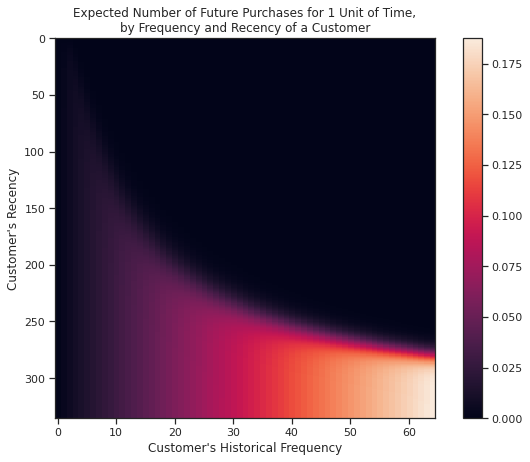

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
plt.figure(figsize=(10,7))
plot_frequency_recency_matrix(bgf)

As you can see our 80% customers have already churn or we can say dropped.



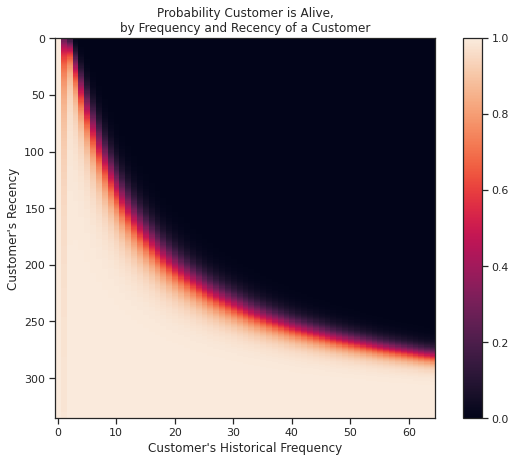

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
plt.figure(figsize=(10,7))
plot_probability_alive_matrix(bgf)

The brighter, the more likely a customer has churned out.

In [ ]:
t = 30
summary_bgf['predicted_transactions'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf['frequency'], summary_bgf['recency'], summary_bgf['T'])
summary_bgf.sort_values(by='predicted_transactions').tail(5)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
12409               64.000  335.000 335.000     1157789.288   
101122              64.000  335.000 335.000     3223472.450   
10953               64.000  335.000 335.000     7682873.763   
103027              64.000  335.000 335.000     6367557.470   
11520               64.000  335.000 335.000     5168516.407   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
12409                              1244458.161    0.998  not churned   
101122                             3436577.431    0.998  not churned   
10953                              8168929.290    0.998  not churned   
103027                             6773105.262    0.998  not churned   
11520                              5500673.426    0.998  not churned   

                         LTV  expected_average_profit  \
CUSTOMER_NUMBER                                         
12409            6679350.133              1244458.161   
101122          18445058.774              3436577.431   
10953           43844896.238              8168929.290   
103027          36353123.751              6773105.262   
11520           29523631.190              5500673.426   

                 expected_transac_1_month  predicted_transactions  
CUSTOMER_NUMBER                                                    
12409                               0.727                   5.635  
101122                              0.727                   5.635  
10953                               0.727                   5.635  
103027                              0.727                   5.635  
11520                               0.727                   5.635

In [ ]:
summary_bgf['predicted_transactions'].sum()

141.5952625528516

In [ ]:
summary_bgf.reset_index()
summary_bgf.head()

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
10468               47.000  334.000 335.000    25279393.870   
10846               32.000  335.000 335.000       15089.469   
10953               64.000  335.000 335.000     7682873.763   
10982                2.000  109.000 110.000      400000.000   
10983               16.000  214.000 244.000    15260052.699   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
10468                             27456061.672    0.997  not churned   
10846                                50723.828    0.996  not churned   
10953                              8168929.290    0.998  not churned   
10982                             -1036476.477    0.978  not churned   
10983                             19913978.250    0.945  not churned   

                          LTV  expected_average_profit  \
CUSTOMER_NUMBER                                          
10468           108980969.786             27456061.672   
10846              138938.522                50723.828   
10953            43844896.238              8168929.290   
10982             -769732.137             -1036476.477   
10983            36131890.543             19913978.250   

                 expected_transac_1_month  predicted_transactions  
CUSTOMER_NUMBER                                                    
10468                               0.537                   4.149  
10846                               0.371                   2.837  
10953                               0.727                   5.635  
10982                               0.101                   0.623  
10983                               0.246                   1.957

In [ ]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(cltv_dataset, "CUSTOMER_NUMBER", "TRANS_DATE", 
                                                   calibration_period_end = '2021-08-22',
                                                  observation_period_end = '2021-11-07')

In [ ]:
pd.DataFrame(summary_cal_holdout.head())

frequency_cal  recency_cal   T_cal  frequency_holdout  \
CUSTOMER_NUMBER                                                          
10468                   25.000      224.000 227.000             20.000   
10846                   16.000      225.000 227.000             14.000   
10953                   35.000      225.000 227.000             26.000   
10982                    0.000        0.000   2.000              1.000   
10983                    5.000      121.000 136.000             10.000   

                 duration_holdout  
CUSTOMER_NUMBER                    
10468                      77.000  
10846                      77.000  
10953                      77.000  
10982                      77.000  
10983                      77.000

In [ ]:
bgf = BetaGeoFitter(penalizer_coef = 0.1)
bgf.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.BetaGeoFitter: fitted with 92 subjects, a: 0.00, alpha: 15.05, b: 0.00, r: 0.72>

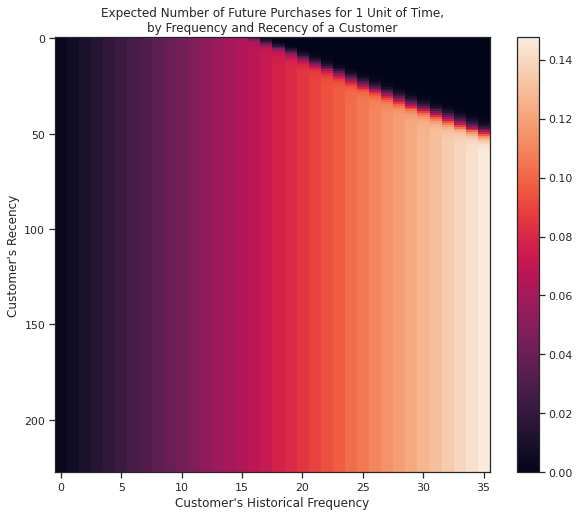

In [ ]:
#plotting the frequency and recency matrix
plt.figure(figsize=(10,8))
plot_frequency_recency_matrix(bgf)

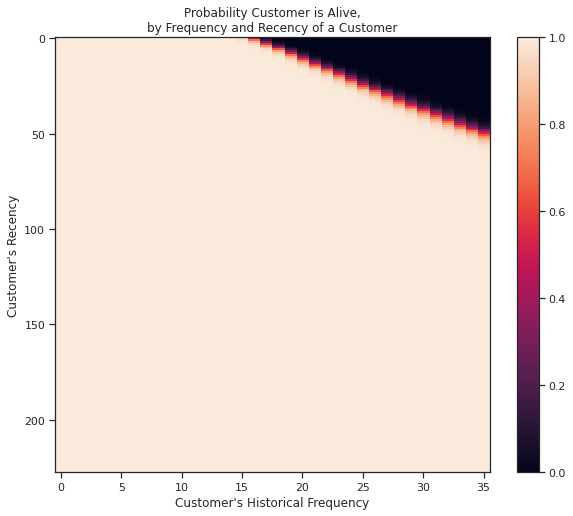

In [ ]:
#plotting the churn matrix
plt.figure(figsize=(10,8))
plot_probability_alive_matrix(bgf)

In [ ]:
t = 30
summary_bgf["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])
summary_bgf.sort_values(by = "predicted_purchases").tail(5)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
12409               64.000  335.000 335.000     1157789.288   
101122              64.000  335.000 335.000     3223472.450   
10953               64.000  335.000 335.000     7682873.763   
103027              64.000  335.000 335.000     6367557.470   
11520               64.000  335.000 335.000     5168516.407   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
12409                              1244458.161    0.998  not churned   
101122                             3436577.431    0.998  not churned   
10953                              8168929.290    0.998  not churned   
103027                             6773105.262    0.998  not churned   
11520                              5500673.426    0.998  not churned   

                         LTV  expected_average_profit  \
CUSTOMER_NUMBER                                         
12409            6679350.133              1244458.161   
101122          18445058.774              3436577.431   
10953           43844896.238              8168929.290   
103027          36353123.751              6773105.262   
11520           29523631.190              5500673.426   

                 expected_transac_1_month  predicted_transactions  \
CUSTOMER_NUMBER                                                     
12409                               0.727                   5.635   
101122                              0.727                   5.635   
10953                               0.727                   5.635   
103027                              0.727                   5.635   
11520                               0.727                   5.635   

                 predicted_purchases  
CUSTOMER_NUMBER                       
12409                          5.546  
101122                         5.546  
10953                          5.546  
103027                         5.546  
11520                          5.546

In [ ]:
summary_bgf["actual_30"] = summary_bgf["frequency"]/summary_bgf["recency"]*30

In [ ]:
summary_bgf = summary_bgf.fillna(value = 0) #filling null values with 0

In [ ]:
#calculating the prediction error for the 30 days purchase prediction
summary_bgf["Error"] = summary_bgf["actual_30"] - summary_bgf["predicted_purchases"]

In [ ]:
mse = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])

In [ ]:
summary_ = summary_bgf[(summary_bgf["monetary_value"] > 0) & (summary_bgf["frequency"] > 0)]

In [ ]:
summary_["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_["frequency"], 
                                                                        summary_["monetary_value"])

In [ ]:
summary_["predicted_clv"] = ggf.customer_lifetime_value(bgf,
                                                       summary_["frequency"],
                                                       summary_["recency"],
                                                       summary_["T"],
                                                       summary_["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [ ]:
#adding a 5% of profit margin
summary_["CLV"] = summary_["predicted_clv"]*0.05

In [ ]:
actual = summary_["monetary_value"]*summary_["actual_30"]

In [ ]:
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]

In [ ]:
error = actual - pred

In [ ]:
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T

In [ ]:
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result["Actual"], result["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: -14708554.142914467
Mean Squared Error: 1.21792771306442e+16
Root Mean Squared Error: 110359762.28066188


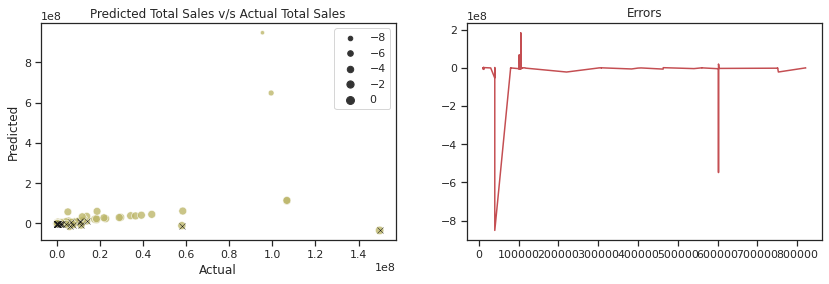

In [ ]:
#Predicted v/s Actual
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.scatterplot(result["Actual"], result["Predicted"], size = result["Error"], color = "darkkhaki", alpha = 0.8, marker = 'o')
sns.scatterplot((result[result["Error"] > 5000]["Actual"]), (result[result["Error"] > 5000]["Predicted"]), color = "k", marker = "x")
plt.title("Predicted Total Sales v/s Actual Total Sales")
plt.subplot(122)
plt.plot(result["Error"], color = "r")
plt.title("Errors")
plt.show()

**Expected Number of Mobile Transactions**

**BG / NBD (Beta Geometric / Negative Binominal Distribution) = Expected Number of Transaction**

BG/NBD models assume that the number of transactions made by each customer follows a Poisson process with a heterogeneity in transaction rates across customers following a gamma distribution.

These assumptions give us a Negative binomial distribution (NBD) for modeling the number of transactions made by the customer while he is alive

**Top 10 Expected Number of Transaction (1 Week)**

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(RFM_data['frequency'],
        RFM_data['recency'],
        RFM_data['T'])

<lifetimes.BetaGeoFitter: fitted with 88 subjects, a: 0.09, alpha: 24.48, b: 2.12, r: 1.48>

In [ ]:
# 1 week expected mobile transactions

RFM_data["expected_trans_1_week"] = bgf.predict(1,
                                               RFM_data['frequency'],
                                               RFM_data['recency'],
                                               RFM_data['T'])

RFM_data.sort_values("expected_trans_1_week", ascending=False).head(10)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
103027              64.000  335.000 335.000     6367557.470   
10953               64.000  335.000 335.000     7682873.763   
101122              64.000  335.000 335.000     3223472.450   
11520               64.000  335.000 335.000     5168516.407   
12409               64.000  335.000 335.000     1157789.288   
12500               63.000  335.000 335.000      661555.237   
301660              56.000  335.000 335.000      312498.125   
109464              50.000  333.000 333.000     8707332.394   
101476              47.000  335.000 335.000     5380001.579   
10468               47.000  334.000 335.000    25279393.870   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
103027                             6773105.262    0.998  not churned   
10953                              8168929.290    0.998  not churned   
101122                             3436577.431    0.998  not churned   
11520                              5500673.426    0.998  not churned   
12409                              1244458.161    0.998  not churned   
12500                               718799.864    0.998  not churned   
301660                              352770.707    0.997  not churned   
109464                             9421993.824    0.997  not churned   
101476                             5860566.369    0.997  not churned   
10468                             27456061.672    0.997  not churned   

                          LTV  expected_average_profit  \
CUSTOMER_NUMBER                                          
103027           36353123.751              6773105.262   
10953            43844896.238              8168929.290   
101122           18445058.774              3436577.431   
11520            29523631.190              5500673.426   
12409             6679350.133              1244458.161   
12500             3798956.975               718799.864   
301660            1661615.988               352770.707   
109464           39957307.943              9421993.824   
101476           23272250.549              5860566.369   
10468           108980969.786             27456061.672   

                 expected_transac_1_month  expected_trans_1_week  
CUSTOMER_NUMBER                                                   
103027                              0.727                  0.182  
10953                               0.727                  0.182  
101122                              0.727                  0.182  
11520                               0.727                  0.182  
12409                               0.727                  0.182  
12500                               0.715                  0.179  
301660                              0.638                  0.160  
109464                              0.574                  0.144  
101476                              0.537                  0.135  
10468                               0.537                  0.135

**Top 10 Expected Number of Transaction (1 Month)**

In [ ]:
# 1 month expected mobile transactions

RFM_data["expected_transac_1_month"] = bgf.predict(4,
                                               RFM_data['frequency'],
                                               RFM_data['recency'],
                                               RFM_data['T'])

RFM_data.sort_values("expected_transac_1_month", ascending=False).head(10)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
103027              64.000  335.000 335.000     6367557.470   
10953               64.000  335.000 335.000     7682873.763   
101122              64.000  335.000 335.000     3223472.450   
11520               64.000  335.000 335.000     5168516.407   
12409               64.000  335.000 335.000     1157789.288   
12500               63.000  335.000 335.000      661555.237   
301660              56.000  335.000 335.000      312498.125   
109464              50.000  333.000 333.000     8707332.394   
101476              47.000  335.000 335.000     5380001.579   
10468               47.000  334.000 335.000    25279393.870   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
103027                             6773105.262    0.998  not churned   
10953                              8168929.290    0.998  not churned   
101122                             3436577.431    0.998  not churned   
11520                              5500673.426    0.998  not churned   
12409                              1244458.161    0.998  not churned   
12500                               718799.864    0.998  not churned   
301660                              352770.707    0.997  not churned   
109464                             9421993.824    0.997  not churned   
101476                             5860566.369    0.997  not churned   
10468                             27456061.672    0.997  not churned   

                          LTV  expected_average_profit  \
CUSTOMER_NUMBER                                          
103027           36353123.751              6773105.262   
10953            43844896.238              8168929.290   
101122           18445058.774              3436577.431   
11520            29523631.190              5500673.426   
12409             6679350.133              1244458.161   
12500             3798956.975               718799.864   
301660            1661615.988               352770.707   
109464           39957307.943              9421993.824   
101476           23272250.549              5860566.369   
10468           108980969.786             27456061.672   

                 expected_transac_1_month  expected_trans_1_week  
CUSTOMER_NUMBER                                                   
103027                              0.727                  0.182  
10953                               0.727                  0.182  
101122                              0.727                  0.182  
11520                               0.727                  0.182  
12409                               0.727                  0.182  
12500                               0.716                  0.179  
301660                              0.638                  0.160  
109464                              0.575                  0.144  
101476                              0.538                  0.135  
10468                               0.538                  0.135

**Total Expected Number of Mobile Transaction (1 Month)**

In [ ]:
bgf.predict(4,
            RFM_data['frequency'],
            RFM_data['recency'],
            RFM_data['T']).sum()

17.267414086151327

**Frequency of the Repeat Transactions**

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

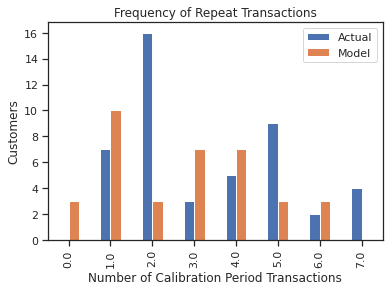

In [ ]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

We can see that our model is doing fair job. Our model is predicting fairly good at the 1 & 5 calibration time period.

**Divide our dataset into training & holdout sets**

In [ ]:
from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(cltv_dataset, 'CUSTOMER_NUMBER', 'TRANS_DATE',
                                        calibration_period_end='2021-08-24',
                                        observation_period_end='2021-11-01' )   
print(summary_cal_holdout.head())

                 frequency_cal  recency_cal   T_cal  frequency_holdout  \
CUSTOMER_NUMBER                                                          
10468                   27.000      229.000 229.000             18.000   
10846                   17.000      228.000 229.000             13.000   
10953                   37.000      229.000 229.000             24.000   
10982                    0.000        0.000   4.000              1.000   
10983                    5.000      121.000 138.000             10.000   

                 duration_holdout  
CUSTOMER_NUMBER                    
10468                      69.000  
10846                      69.000  
10953                      69.000  
10982                      69.000  
10983                      69.000  


In [ ]:
pd.DataFrame(summary_cal_holdout.head())

frequency_cal  recency_cal   T_cal  frequency_holdout  \
CUSTOMER_NUMBER                                                          
10468                   27.000      229.000 229.000             18.000   
10846                   17.000      228.000 229.000             13.000   
10953                   37.000      229.000 229.000             24.000   
10982                    0.000        0.000   4.000              1.000   
10983                    5.000      121.000 138.000             10.000   

                 duration_holdout  
CUSTOMER_NUMBER                    
10468                      69.000  
10846                      69.000  
10953                      69.000  
10982                      69.000  
10983                      69.000

In [ ]:
summary_cal_holdout

frequency_cal  recency_cal   T_cal  frequency_holdout  \
CUSTOMER_NUMBER                                                          
10468                   27.000      229.000 229.000             18.000   
10846                   17.000      228.000 229.000             13.000   
10953                   37.000      229.000 229.000             24.000   
10982                    0.000        0.000   4.000              1.000   
10983                    5.000      121.000 138.000             10.000   
...                        ...          ...     ...                ...   
751878                   0.000        0.000 168.000              0.000   
752617                   3.000      193.000 198.000              2.000   
820171                   9.000      165.000 169.000              5.000   
821319                   4.000       90.000 138.000              1.000   
821410                   8.000      134.000 138.000              5.000   

                 duration_holdout  
CUSTOMER_NUMBER                    
10468                      69.000  
10846                      69.000  
10953                      69.000  
10982                      69.000  
10983                      69.000  
...                           ...  
751878                     69.000  
752617                     69.000  
820171                     69.000  
821319                     69.000  
821410                     69.000  

[93 rows x 5 columns]

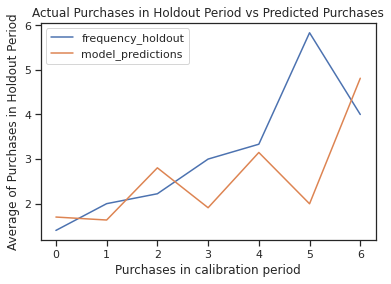

In [ ]:
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

In [ ]:
summary_cal_holdout.head()

frequency_cal  recency_cal   T_cal  frequency_holdout  \
CUSTOMER_NUMBER                                                          
10468                   27.000      229.000 229.000             18.000   
10846                   17.000      228.000 229.000             13.000   
10953                   37.000      229.000 229.000             24.000   
10982                    0.000        0.000   4.000              1.000   
10983                    5.000      121.000 138.000             10.000   

                 duration_holdout  
CUSTOMER_NUMBER                    
10468                      69.000  
10846                      69.000  
10953                      69.000  
10982                      69.000  
10983                      69.000

In [ ]:
summary_bgf.reset_index(inplace=True)

In [ ]:
summary_bgf.reset_index(inplace=True)

In [ ]:
model_copy=summary_bgf.copy()

In [ ]:
model_copy=model_copy.drop(['index'],axis=1)

In [ ]:
model_copy.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                   27456061.672    0.997  not churned 108980969.786   
1                      50723.828    0.996  not churned    138938.522   
2                    8168929.290    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  predicted_transactions  \
0             27456061.672                     0.537                   4.149   
1                50723.828                     0.371                   2.837   
2              8168929.290                     0.727                   5.635   

   predicted_purchases  actual_30  Error  
0                4.089      4.222  0.132  
1                2.804      2.866  0.062  
2                5.546      5.731  0.185

In [ ]:
#Creating a function which can predict the future mobile transaction value based on the lookup window

def bgf_get_pred_error(t, id_):
    
    individual = model_copy[model_copy["CUSTOMER_NUMBER"] == id_]
    
    ind_pred = bgf.predict(t, individual["frequency"], individual["recency"], individual["T"])
    
    actual_val = individual["frequency"]/individual["recency"]*t
    
    error = actual_val - ind_pred
    
    print("Your Predicted Mobile Transaction: %s" % (ind_pred))
    print("Your Actual Mobile Transaction: %s" % (actual_val))
    print("Prediction Error: %s" % (error))

In [ ]:
bgf_get_pred_error(15, 11339.0)

Your Predicted Mobile Transaction: 6   1.724
dtype: float64
Your Actual Mobile Transaction: 6   1.791
dtype: float64
Prediction Error: 6   0.067
dtype: float64


In [ ]:
id_1 = 10846.0
id_2 = 11339.0

In [ ]:
days_since_birth = 30

In [ ]:
sp_trans_1 = cltv_dataset[cltv_dataset["CUSTOMER_NUMBER"] == id_1]
sp_trans_2 = cltv_dataset[cltv_dataset["CUSTOMER_NUMBER"] == id_2]

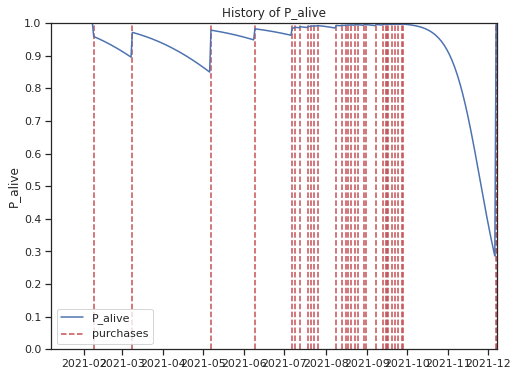

In [ ]:
plt.figure(figsize=(8,6))
plot_history_alive(bgf, days_since_birth, sp_trans_1, "TRANS_DATE")

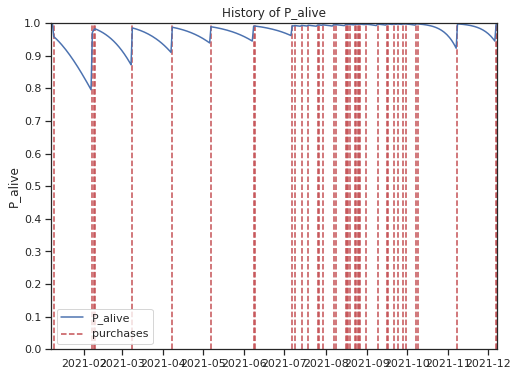

In [ ]:
plt.figure(figsize=(8,6))
plot_history_alive(bgf, days_since_birth, sp_trans_2, "TRANS_DATE")

In [ ]:
model_copy["actual_28"] = model_copy["frequency"]/model_copy["recency"]*28

In [ ]:
model_copy = model_copy.fillna(value = 0) #filling null values with 0

In [ ]:
model_copy.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                   27456061.672    0.997  not churned 108980969.786   
1                      50723.828    0.996  not churned    138938.522   
2                    8168929.290    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  predicted_transactions  \
0             27456061.672                     0.537                   4.149   
1                50723.828                     0.371                   2.837   
2              8168929.290                     0.727                   5.635   

   predicted_purchases  actual_30  Error  actual_28  
0                4.089      4.222  0.132      3.940  
1                2.804      2.866  0.062      2.675  
2                5.546      5.731  0.185      5.349

In [ ]:
#calculating the prediction error for the 30 days mobile transactions prediction
model_copy["Error"] = model_copy["actual_28"] - model_copy["predicted_transactions"]

In [ ]:
model_copy.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
model_copy = model_copy.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
mse = mean_squared_error(model_copy["actual_28"], model_copy["predicted_transactions"])

In [ ]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % model_copy["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 0.7318999087954186
Average Error:  0.32918776734641875
Root Mean Squared Error: 0.8555114895753408


In [ ]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import xlrd
import pandas as pd
import datetime
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

In [ ]:
#Mobile Transactions Prediction

bgf_mse_purchase_30 = mean_squared_error(model_copy["actual_28"],model_copy["predicted_transactions"])
bgf_rmse_purchase_30 = sqrt(bgf_mse_purchase_30)
bgf_avg_error_purchase_30 = model_copy["Error"].mean()

In [ ]:
model_copy.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                   27456061.672    0.997  not churned 108980969.786   
1                      50723.828    0.996  not churned    138938.522   
2                    8168929.290    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  predicted_transactions  \
0             27456061.672                     0.537                   4.149   
1                50723.828                     0.371                   2.837   
2              8168929.290                     0.727                   5.635   

   predicted_purchases  actual_30  Error  actual_28  
0                4.089      4.222 -0.209      3.940  
1                2.804      2.866 -0.163      2.675  
2                5.546      5.731 -0.286      5.349

In [ ]:

#Filtering the data where we have the values of 0 or less than 0.
res_summary = model_copy[model_copy["frequency"] > 0]

In [ ]:
final_summary = res_summary[model_copy["monetary_value"] > 0]

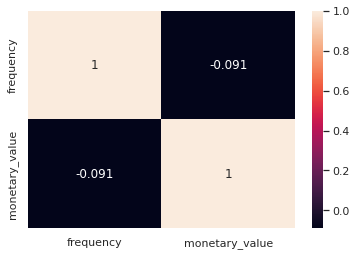

In [ ]:
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

To proceed with the Gamma Gamma Model we have to check for the assumption whether the frequency and monetary values are intercorrelated or not. As we can see here, the correlation between the frequency and monetary value is pretty low so we can go ahead to build Gamma Gamma Model.

2. **Gamma - Gamma Model**

The Gamma-Gamma Model can predict the most likely value per transaction in the future.

The properties of Gamma-Gamma model are:

Monetary value of users’ transactions is random around their mean transaction value.

Mean transaction value varies across users but doesn’t vary for an individual user over time.

Mean transaction values is Gamma distributed across customers.

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

In [ ]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(RFM_data['frequency'], RFM_data['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 88 subjects, p: 2.12, q: 0.09, v: 2.06>

In [ ]:
ggf.summary

coef  se(coef)  lower 95% bound  upper 95% bound
p 2.119     0.536            1.069            3.170
q 0.086     0.010            0.067            0.105
v 2.059     0.543            0.994            3.124

**Top 10 Expected Average Profit from the Mobile Transactions Made**

In [ ]:
RFM_data["expected_average_profit"] = ggf.conditional_expected_average_profit(RFM_data['frequency'],
                                                                             RFM_data['monetary_value'])

RFM_data.sort_values("expected_average_profit", ascending=False).head(6)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
40207                4.000  168.000 244.000   133554877.112   
101577               1.000   30.000  90.000    58000000.000   
105541               2.000   21.000 133.000    52416502.110   
602184               4.000   62.000 131.000    51368222.335   
12481                7.000   74.000 146.000    37606962.173   
602168               5.000  235.000 304.000    29236014.920   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
40207                           1733994673.740    0.906  not churned   
101577                           -21904525.598    0.865  not churned   
105541                           -62544810.874    0.384      churned   
602184                           668833787.647    0.706    high risk   
12481                             79852187.661    0.429      churned   
602168                           112432466.834    0.935  not churned   

                          LTV  expected_average_profit  \
CUSTOMER_NUMBER                                          
40207           944880240.336            149696414.071   
101577          -12013791.982            101989486.209   
105541          -15595416.417             66828543.324   
602184          488597512.191             57576622.392   
12481            50104696.718             40076315.673   
602168           61166928.993             31996086.797   

                 expected_transac_1_month  expected_trans_1_week  
CUSTOMER_NUMBER                                                   
40207                               0.074                  0.018  
101577                              0.068                  0.017  
105541                              0.028                  0.007  
602184                              0.098                  0.024  
12481                               0.091                  0.023  
602168                              0.074                  0.018

In [ ]:
print("Expected Average Mobile Transacations Made: %s" % RFM_data["expected_average_profit"].mean())
print("Actual Average Mobile Transactions Made: %s" % RFM_data["monetary_value"].mean())
print("Difference: %s" % (RFM_data["monetary_value"].mean() - RFM_data["expected_average_profit"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(RFM_data["monetary_value"], RFM_data["expected_average_profit"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(RFM_data["monetary_value"], RFM_data["expected_average_profit"])))

Expected Average Mobile Transacations Made: 8510307.636175068
Actual Average Mobile Transactions Made: 7271114.720577222
Difference: -1239192.9155978458
Mean Squared Error: 28283615351799.37
Root Mean Squared Error: 5318234.232506065


In [ ]:
RFM_data.head(3)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
10468               47.000  334.000 335.000    25279393.870   
10846               32.000  335.000 335.000       15089.469   
10953               64.000  335.000 335.000     7682873.763   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
10468                             27456061.672    0.997  not churned   
10846                                50723.828    0.996  not churned   
10953                              8168929.290    0.998  not churned   

                          LTV  expected_average_profit  \
CUSTOMER_NUMBER                                          
10468           108980969.786             25513528.805   
10846              138938.522                15295.697   
10953            43844896.238              7735002.139   

                 expected_transac_1_month  expected_trans_1_week  
CUSTOMER_NUMBER                                                   
10468                               0.538                  0.135  
10846                               0.371                  0.093  
10953                               0.727                  0.182

**Predicting CLV by Using BG-NBD and Gamma-Gamma Models**

**Customer Lifetime Value Calculation**

In [ ]:
cltv = ggf.customer_lifetime_value(bgf,
                                   RFM_data['frequency'],
                                   RFM_data['recency'],
                                   RFM_data['T'],
                                   RFM_data['monetary_value'],
                                   time=6,  # 6 Month
                                   freq="W",  # frequency of T
                                   discount_rate=0.01)

In [ ]:
# Reset index
cltv = cltv.reset_index()
# Merging the main table and the forecast values table
cltv_final = RFM_data.merge(cltv, on="CUSTOMER_NUMBER", how="left")
# sorting
cltv_final.sort_values(by="clv", ascending=False).head(5)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0             10468     47.000  334.000 335.000    25279393.870   
26            40207      4.000  168.000 244.000   133554877.112   
49           106254     46.000  335.000 335.000    14181685.067   
37           101577      1.000   30.000  90.000    58000000.000   
2             10953     64.000  335.000 335.000     7682873.763   

    predicted_mobile_transactions  p_alive        churn           LTV  \
0                    27456061.672    0.997  not churned 108980969.786   
26                 1733994673.740    0.906  not churned 944880240.336   
49                   15441541.957    0.997  not churned  60049986.996   
37                  -21904525.598    0.865  not churned -12013791.982   
2                     8168929.290    0.998  not churned  43844896.238   

    expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0              25513528.805                     0.538                  0.135   
26            149696414.071                     0.074                  0.018   
49             14315916.721                     0.527                  0.132   
37            101989486.209                     0.068                  0.017   
2               7735002.139                     0.727                  0.182   

            clv  
0  86182850.807  
26 69038547.702  
49 47371647.026  
37 43374018.747  
2  35317282.599

**1 Month Customer Life Time Value**

In [ ]:
# 1 Month CLTV:
cltv_1 = ggf.customer_lifetime_value(bgf,
                                   RFM_data['frequency'],
                                   RFM_data['recency'],
                                   RFM_data['T'],
                                   RFM_data['monetary_value'],
                                   time=1,  # 1 month
                                   freq="W",  # frequency of T
                                   discount_rate=0.01)

cltv_1.head()
cltv_1= cltv_1.reset_index()
cltv_1 = RFM_data.merge(cltv_1, on="CUSTOMER_NUMBER", how="left")
cltv_1.sort_values(by="clv", ascending=False).head(10)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0             10468     47.000  334.000 335.000    25279393.870   
26            40207      4.000  168.000 244.000   133554877.112   
49           106254     46.000  335.000 335.000    14181685.067   
37           101577      1.000   30.000  90.000    58000000.000   
75           602184      4.000   62.000 131.000    51368222.335   
2             10953     64.000  335.000 335.000     7682873.763   
51           109464     50.000  333.000 333.000     8707332.394   
42           103027     64.000  335.000 335.000     6367557.470   
4             10983     16.000  214.000 244.000    15260052.699   
8             11520     64.000  335.000 335.000     5168516.407   

    predicted_mobile_transactions  p_alive        churn           LTV  \
0                    27456061.672    0.997  not churned 108980969.786   
26                 1733994673.740    0.906  not churned 944880240.336   
49                   15441541.957    0.997  not churned  60049986.996   
37                  -21904525.598    0.865  not churned -12013791.982   
75                  668833787.647    0.706    high risk 488597512.191   
2                     8168929.290    0.998  not churned  43844896.238   
51                    9421993.824    0.997  not churned  39957307.943   
42                    6773105.262    0.998  not churned  36353123.751   
4                    19913978.250    0.945  not churned  36131890.543   
8                     5500673.426    0.998  not churned  29523631.190   

    expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0              25513528.805                     0.538                  0.135   
26            149696414.071                     0.074                  0.018   
49             14315916.721                     0.527                  0.132   
37            101989486.209                     0.068                  0.017   
75             57576622.392                     0.098                  0.024   
2               7735002.139                     0.727                  0.182   
51              8783097.881                     0.575                  0.144   
42              6410761.417                     0.727                  0.182   
4              15682816.382                     0.250                  0.062   
8               5203584.854                     0.727                  0.182   

            clv  
0  14762521.430  
26 11837583.996  
49  8114435.216  
37  7472807.623  
75  6049916.908  
2   6049582.287  
51  5428762.127  
42  5013887.264  
4   4212485.862  
8   4069748.682

**Segmenting our Customers by using their CLV Value Forecasts**


Values are converted between 1-100 with Minmaxscaler to better interpret the cltv value

In [ ]:
# Normalization 0-1 Range For CLV Values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(cltv_final[["clv"]])
cltv_final["scaled_clv"] = scaler.transform(cltv_final[["clv"]])

cltv_final.sort_values(by="scaled_clv",  ascending=False).head()

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0             10468     47.000  334.000 335.000    25279393.870   
26            40207      4.000  168.000 244.000   133554877.112   
49           106254     46.000  335.000 335.000    14181685.067   
37           101577      1.000   30.000  90.000    58000000.000   
2             10953     64.000  335.000 335.000     7682873.763   

    predicted_mobile_transactions  p_alive        churn           LTV  \
0                    27456061.672    0.997  not churned 108980969.786   
26                 1733994673.740    0.906  not churned 944880240.336   
49                   15441541.957    0.997  not churned  60049986.996   
37                  -21904525.598    0.865  not churned -12013791.982   
2                     8168929.290    0.998  not churned  43844896.238   

    expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0              25513528.805                     0.538                  0.135   
26            149696414.071                     0.074                  0.018   
49             14315916.721                     0.527                  0.132   
37            101989486.209                     0.068                  0.017   
2               7735002.139                     0.727                  0.182   

            clv  scaled_clv  
0  86182850.807       1.000  
26 69038547.702       0.801  
49 47371647.026       0.550  
37 43374018.747       0.503  
2  35317282.599       0.410

**Labelling our customers related with CLV value**

In [ ]:
# Segmentation of Customers
cltv_final["segment"] = pd.qcut(cltv_final["scaled_clv"], 4, labels=["D", "C", "B", "A"])
cltv_final.head()

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   
3            10982      2.000  109.000 110.000      400000.000   
4            10983     16.000  214.000 244.000    15260052.699   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                   27456061.672    0.997  not churned 108980969.786   
1                      50723.828    0.996  not churned    138938.522   
2                    8168929.290    0.998  not churned  43844896.238   
3                   -1036476.477    0.978  not churned   -769732.137   
4                   19913978.250    0.945  not churned  36131890.543   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1                15295.697                     0.371                  0.093   
2              7735002.139                     0.727                  0.182   
3               509982.249                     0.100                  0.025   
4             15682816.382                     0.250                  0.062   

           clv  scaled_clv segment  
0 86182850.807       1.000       A  
1    35660.919       0.000       D  
2 35317282.599       0.410       A  
3   320008.055       0.004       C  
4 24570239.807       0.285       A

**Examination of the Customer Segments**

In [ ]:
# Examination of Segments
cltv_final.groupby("segment").agg({"count", "mean", "sum"})

CUSTOMER_NUMBER                     frequency                recency  \
                  count       mean      sum     count   mean     sum   count   
segment                                                                        
D                    22 217822.909  4792104        22  9.136 201.000      22   
C                    22 303919.727  6686234        22 10.136 223.000      22   
B                    22 231517.409  5093383        22 18.000 396.000      22   
A                    22 186310.182  4098824        22 26.455 582.000      22   

                             T                  monetary_value               \
           mean      sum count    mean      sum          count         mean   
segment                                                                       
D       161.500 3553.000    22 215.773 4747.000             22   123772.699   
C       175.818 3868.000    22 235.864 5189.000             22   597565.387   
B       201.909 4442.000    22 249.273 5484.000             22  4277025.328   
A       232.136 5107.000    22 270.455 5950.000             22 24086095.469   

                      predicted_mobile_transactions                \
                  sum                         count          mean   
segment                                                             
D         2722999.367                            22    198164.700   
C        13146438.509                            22    490071.440   
B        94094557.209                            22   9044748.398   
A       529894100.325                            22 126084611.051   

                       p_alive                LTV                              \
                   sum   count  mean    sum count         mean            sum   
segment                                                                         
D          4359623.401      22 0.833 18.322    22   202388.087    4452537.916   
C         10781571.688      22 0.835 18.369    22   693654.262   15260393.768   
B        198984464.756      22 0.830 18.257    22  6075529.175  133661641.852   
A       2773861443.127      22 0.873 19.212    22 93728907.057 2062035955.254   

        expected_average_profit                             \
                          count         mean           sum   
segment                                                      
D                            22   136044.772   2992984.983   
C                            22   793398.640  17454770.076   
B                            22  4882392.411 107412633.038   
A                            22 28229394.722 621046683.886   

        expected_transac_1_month             expected_trans_1_week        \
                           count  mean   sum                 count  mean   
segment                                                                    
D                             22 0.107 2.348                    22 0.027   
C                             22 0.146 3.204                    22 0.036   
B                             22 0.214 4.715                    22 0.054   
A                             22 0.318 7.001                    22 0.080   

                clv                            scaled_clv              
          sum count         mean           sum      count  mean   sum  
segment                                                                
D       0.587    22    35765.717    786845.777         22 0.000 0.009  
C       0.801    22   377040.258   8294885.685         22 0.004 0.096  
B       1.179    22  3522996.390  77505920.583         22 0.041 0.899  
A       1.751    22 26708171.503 587579773.075         22 0.310 6.818

In [ ]:
cltvmodelling=cltv_final

In [ ]:
cltvmodelling.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                   27456061.672    0.997  not churned 108980969.786   
1                      50723.828    0.996  not churned    138938.522   
2                    8168929.290    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1                15295.697                     0.371                  0.093   
2              7735002.139                     0.727                  0.182   

           clv  scaled_clv segment  
0 86182850.807       1.000       A  
1    35660.919       0.000       D  
2 35317282.599       0.410       A

3.**Training a Modified_Beta_Geometric_Nbd_Model (MBG/NBD)**

In [ ]:
summary_mbg = RFM_data.copy()

In [ ]:
summary_mbg.head()

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
10468               47.000  334.000 335.000    25279393.870   
10846               32.000  335.000 335.000       15089.469   
10953               64.000  335.000 335.000     7682873.763   
10982                2.000  109.000 110.000      400000.000   
10983               16.000  214.000 244.000    15260052.699   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
10468                             27456061.672    0.997  not churned   
10846                                50723.828    0.996  not churned   
10953                              8168929.290    0.998  not churned   
10982                             -1036476.477    0.978  not churned   
10983                             19913978.250    0.945  not churned   

                          LTV  expected_average_profit  \
CUSTOMER_NUMBER                                          
10468           108980969.786             25513528.805   
10846              138938.522                15295.697   
10953            43844896.238              7735002.139   
10982             -769732.137               509982.249   
10983            36131890.543             15682816.382   

                 expected_transac_1_month  expected_trans_1_week  
CUSTOMER_NUMBER                                                   
10468                               0.538                  0.135  
10846                               0.371                  0.093  
10953                               0.727                  0.182  
10982                               0.100                  0.025  
10983                               0.250                  0.062

In [ ]:
mbg = ModifiedBetaGeoFitter(penalizer_coef = 0.01)
mbg.fit(summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 88 subjects, a: 0.02, alpha: 22.48, b: 0.94, r: 1.29>

In [ ]:
mbg.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r      1.292     0.197            0.907            1.678
alpha 22.482     3.996           14.651           30.314
a      0.019     0.021           -0.023            0.060
b      0.944     0.556           -0.145            2.033

In [ ]:
t = 30
summary_mbg["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])
summary_mbg.head(3)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
10468               47.000  334.000 335.000    25279393.870   
10846               32.000  335.000 335.000       15089.469   
10953               64.000  335.000 335.000     7682873.763   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
10468                             27456061.672    0.997  not churned   
10846                                50723.828    0.996  not churned   
10953                              8168929.290    0.998  not churned   

                          LTV  expected_average_profit  \
CUSTOMER_NUMBER                                          
10468           108980969.786             25513528.805   
10846              138938.522                15295.697   
10953            43844896.238              7735002.139   

                 expected_transac_1_month  expected_trans_1_week  \
CUSTOMER_NUMBER                                                    
10468                               0.538                  0.135   
10846                               0.371                  0.093   
10953                               0.727                  0.182   

                 predicted_purchases  
CUSTOMER_NUMBER                       
10468                          4.022  
10846                          2.776  
10953                          5.437

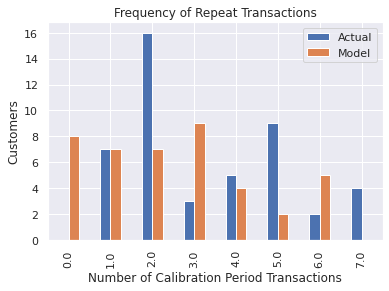

In [ ]:
plot_period_transactions(mbg)

In [ ]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(cltv_dataset, "CUSTOMER_NUMBER", "TRANS_DATE", 
                                                   calibration_period_end = '2021-07-22',
                                                  observation_period_end = '2021-12-02')

In [ ]:
# retain only those customers with frequency > 0
summary_cal_holdout = summary_cal_holdout[summary_cal_holdout['frequency_cal'] > 0]

In [ ]:
mbg.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 52 subjects, a: 0.00, alpha: 36.72, b: 0.00, r: 1.64>

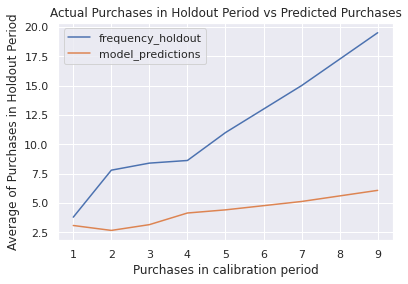

In [ ]:
plot_calibration_purchases_vs_holdout_purchases(mbg, summary_cal_holdout)

In [ ]:
summary_mbg["actual_30"] = summary_mbg["frequency"]/summary_mbg["recency"]*30

In [ ]:
summary_mbg = summary_mbg.fillna(value = 0)

In [ ]:
summary_mbg["Error"] = summary_mbg["actual_30"] - summary_mbg["predicted_purchases"]

In [ ]:
mse = mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"])

In [ ]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_mbg["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 1.4024863525215558
Average Error:  0.6109175285670587
Root Mean Squared Error: 1.1842661662487686


In [ ]:
mbg_mse_purchase = mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"])
mbg_rmse_purchase = sqrt(mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"]))
mbg_avg_purchase_error = (summary_mbg["actual_30"].mean() - summary_mbg["predicted_purchases"].mean())

In [ ]:
summary_mbg_new = summary_mbg[(summary_mbg["monetary_value"] > 0) & (summary_mbg["frequency"] > 0)]

In [ ]:
summary_mbg_new["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_mbg_new["frequency"], 
                                                                        summary_mbg_new["monetary_value"])

In [ ]:
print("Expected Average Sales: %s" % summary_mbg_new["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_mbg_new["monetary_value"].mean())
print("Difference: %s" % (summary_mbg_new["monetary_value"].mean() - summary_mbg_new["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"])))

Expected Average Sales: 8510307.636175068
Actual Average Sales: 7271114.720577222
Difference: -1239192.9155978458
Mean Squared Error: 28283615351799.37
Root Mean Squared Error: 5318234.232506065


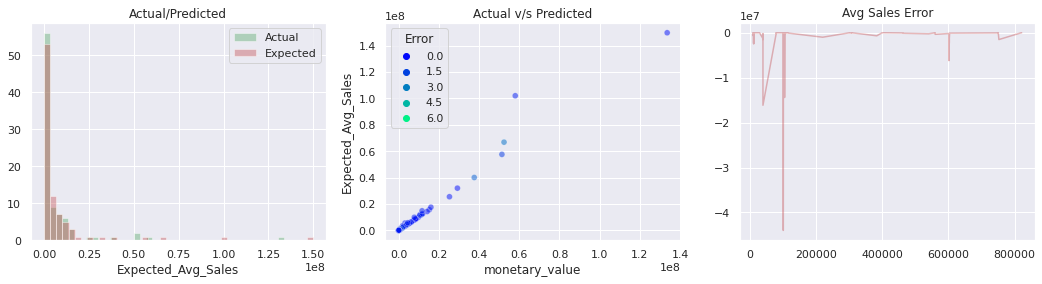

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(summary_mbg_new["monetary_value"], color = "g", kde = False)
sns.distplot(summary_mbg_new["Expected_Avg_Sales"], color = "r", kde = False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])
plt.subplot(132)
sns.scatterplot(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"], alpha = 0.5, hue = summary_mbg["Error"], palette = "winter")
plt.title("Actual v/s Predicted")
plt.subplot(133)
plt.plot(summary_mbg_new["monetary_value"]-summary_mbg_new["Expected_Avg_Sales"], color = 'r', alpha = 0.4)
plt.title("Avg Sales Error")
plt.show()

In [ ]:
summary_mbg_new["predicted_clv"] = ggf.customer_lifetime_value(mbg,
                                                       summary_mbg_new["frequency"],
                                                       summary_mbg_new["recency"],
                                                       summary_mbg_new["T"],
                                                       summary_mbg_new["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [ ]:
summary_mbg_new["CLV"] = summary_mbg_new["predicted_clv"]*0.05

In [ ]:
summary_mbg_new.head(3)

frequency  recency       T  monetary_value  \
CUSTOMER_NUMBER                                               
10468               47.000  334.000 335.000    25279393.870   
10846               32.000  335.000 335.000       15089.469   
10953               64.000  335.000 335.000     7682873.763   

                 predicted_mobile_transactions  p_alive        churn  \
CUSTOMER_NUMBER                                                        
10468                             27456061.672    0.997  not churned   
10846                                50723.828    0.996  not churned   
10953                              8168929.290    0.998  not churned   

                          LTV  expected_average_profit  \
CUSTOMER_NUMBER                                          
10468           108980969.786             25513528.805   
10846              138938.522                15295.697   
10953            43844896.238              7735002.139   

                 expected_transac_1_month  expected_trans_1_week  \
CUSTOMER_NUMBER                                                    
10468                               0.538                  0.135   
10846                               0.371                  0.093   
10953                               0.727                  0.182   

                 predicted_purchases  actual_30  Error  Expected_Avg_Sales  \
CUSTOMER_NUMBER                                                              
10468                          4.022      4.222  0.199        25513528.805   
10846                          2.776      2.866  0.090           15295.697   
10953                          5.437      5.731  0.294         7735002.139   

                 predicted_clv           CLV  
CUSTOMER_NUMBER                               
10468           2584709219.242 129235460.962  
10846              1071694.941     53584.747  
10953           1057493188.394  52874659.420

In [ ]:
summary_mbg_new.reset_index(inplace=True)

In [ ]:
summary_mbg_new.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                   27456061.672    0.997  not churned 108980969.786   
1                      50723.828    0.996  not churned    138938.522   
2                    8168929.290    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1                15295.697                     0.371                  0.093   
2              7735002.139                     0.727                  0.182   

   predicted_purchases  actual_30  Error  Expected_Avg_Sales  predicted_clv  \
0                4.022      4.222  0.199        25513528.805 2584709219.242   
1                2.776      2.866  0.090           15295.697    1071694.941   
2                5.437      5.731  0.294         7735002.139 1057493188.394   

            CLV  
0 129235460.962  
1     53584.747  
2  52874659.420

In [ ]:
from lifetimes import ModifiedBetaGeoFitter

mbgnbd = ModifiedBetaGeoFitter(penalizer_coef=0.01)
mbgnbd.fit(RFM_data['frequency'], 
        RFM_data['recency'], 
        RFM_data['T'],
       verbose=True)

Optimization terminated successfully.
         Current function value: -37.571661
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29


<lifetimes.ModifiedBetaGeoFitter: fitted with 88 subjects, a: 0.02, alpha: 22.48, b: 0.94, r: 1.29>

In [ ]:
print(mbgnbd)

<lifetimes.ModifiedBetaGeoFitter: fitted with 88 subjects, a: 0.02, alpha: 22.48, b: 0.94, r: 1.29>


**Estimating customer lifetime value using the Gamma-Gamma model**

In [ ]:
returning_customers_summary = RFM_data[RFM_data['frequency'] > 0]
returning_customers_summary[['monetary_value', 'frequency']].corr()

monetary_value  frequency
monetary_value           1.000     -0.091
frequency               -0.091      1.000

In [ ]:
from lifetimes import GammaGammaFitter

gg = GammaGammaFitter(penalizer_coef = 0.01)
gg.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'],
       verbose=True)

Optimization terminated successfully.
         Current function value: 17.034185
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18


<lifetimes.GammaGammaFitter: fitted with 88 subjects, p: 2.12, q: 0.09, v: 2.06>

**Predictions for each Customer Mobile Transactions Made**

In [ ]:
summary_cal_holdout.head(3)

frequency_cal  recency_cal   T_cal  frequency_holdout  \
CUSTOMER_NUMBER                                                          
10468                   13.000      196.000 196.000             33.000   
10846                    9.000      195.000 196.000             21.000   
10953                   21.000      196.000 196.000             41.000   

                 duration_holdout  
CUSTOMER_NUMBER                    
10468                     133.000  
10846                     133.000  
10953                     133.000

In [ ]:
t = 30 # days to predict in the future 
summary_cal_holdout['predicted_mobile_transactions'] = mbgnbd.conditional_expected_number_of_purchases_up_to_time(t, 
                                                                                      summary_cal_holdout['frequency_cal'], 
                                                                                      summary_cal_holdout['recency_cal'], 
                                                                                      summary_cal_holdout['T_cal'])

summary_cal_holdout['p_alive'] = mbgnbd.conditional_probability_alive(summary_cal_holdout['frequency_cal'], 
                                                                         summary_cal_holdout['recency_cal'], 
                                                                         summary_cal_holdout['T_cal'])
summary_cal_holdout['p_alive'] = np.round(summary_cal_holdout['p_alive'] / summary_cal_holdout['p_alive'].max(), 2)

In [ ]:
cltvmodelling['clv'] = gg.customer_lifetime_value(
    mbgnbd, #the model to use to predict the number of future transactions
    cltvmodelling['frequency'],
    cltvmodelling['recency'],
    cltvmodelling['T'],
    cltvmodelling['monetary_value'],
    time=3, # months
    discount_rate=0)

In [ ]:
cltvmodelling['clv'] += (-1*cltvmodelling['clv'].min())

In [ ]:
display(cltvmodelling.sample(2).T)

84           28
CUSTOMER_NUMBER                     752617        80006
frequency                            5.000       10.000
recency                            204.000      243.000
T                                  304.000      303.000
monetary_value                16054334.810  1240463.360
predicted_mobile_transactions 62068256.821  2117366.371
p_alive                              0.863        0.906
churn                          not churned  not churned
LTV                           31167952.034  1984443.750
expected_average_profit       17569969.689  1296378.159
expected_transac_1_month             0.068        0.129
expected_trans_1_week                0.017        0.032
clv                           29478569.864  3970478.742
scaled_clv                           0.087        0.012
segment                                  A            C

**Evaluating the MBG/NBD Model**

Accessing model fit

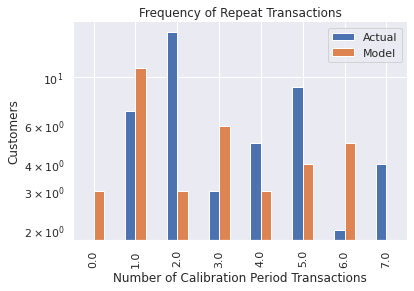

In [ ]:
from lifetimes.plotting import plot_period_transactions
ax = plot_period_transactions(mbgnbd, max_frequency=7)
ax.set_yscale('log')
sns.despine();

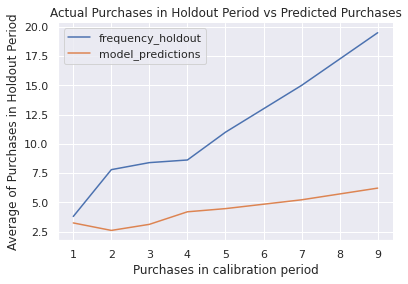

In [ ]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

plot_calibration_purchases_vs_holdout_purchases(mbgnbd, summary_cal_holdout)
sns.despine();

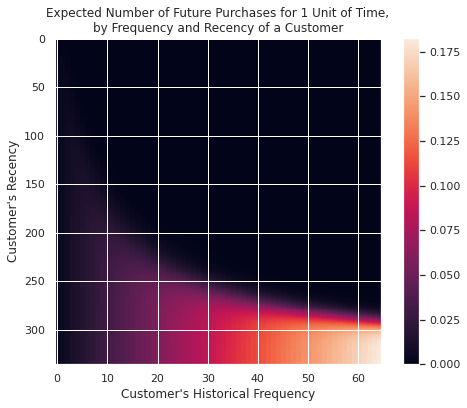

In [ ]:
plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(mbgnbd)

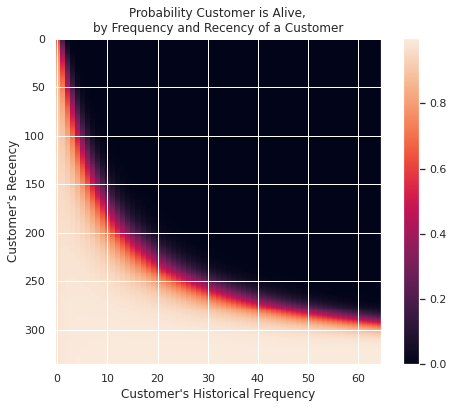

In [ ]:
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(mbgnbd)

In [ ]:
t = 30
cltvmodelling["predicted_mobile_transactions"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, cltvmodelling["frequency"], cltvmodelling["recency"], cltvmodelling["T"])
cltvmodelling.head(5)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   
3            10982      2.000  109.000 110.000      400000.000   
4            10983     16.000  214.000 244.000    15260052.699   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                          4.022    0.997  not churned 108980969.786   
1                          2.776    0.996  not churned    138938.522   
2                          5.437    0.998  not churned  43844896.238   
3                          0.747    0.978  not churned   -769732.137   
4                          1.865    0.945  not churned  36131890.543   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1                15295.697                     0.371                  0.093   
2              7735002.139                     0.727                  0.182   
3               509982.249                     0.100                  0.025   
4             15682816.382                     0.250                  0.062   

            clv  scaled_clv segment  
0 309381877.283       1.000       A  
1    127733.074       0.000       D  
2 126834883.623       0.410       A  
3   1126800.513       0.004       C  
4  90540981.813       0.285       A

**Generating Predictions for a Specific Customer in the next 30 days**

In [ ]:
t = 30
individual = cltvmodelling.loc[cltvmodelling['CUSTOMER_NUMBER'] == 10468]
bgf.predict(t, 
            individual['frequency'], 
            individual['recency'], 
            individual['T'])

0   4.022
dtype: float64

In [ ]:
example_customer_orders = df.loc[df['CUSTOMER_NUMBER'] == 10468]
example_customer_orders.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE     AMOUNT  \
92             10468      1046820100 2021-01-07   7305.450   
93             10468      1046820100 2021-01-07 200000.000   
183            10468      1046820100 2021-02-07  30000.000   

                                             NARRATION RM_CODE  \
92   REMITTANCE CHECK REF 0000419 DRAWN BY         ...      WG   
93                         SETTLEMENT CHEQUE N 0000595      WG   
183  YOUR CASH DEPOSIT CANDY SHOP-WAGITHA  ENTERPRI...      WG   

                    RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
92   ISABEL CYNTHIA WANGECI                  1016    SAMEER ENTERPRISE   
93   ISABEL CYNTHIA WANGECI                  1016    SAMEER ENTERPRISE   
183  ISABEL CYNTHIA WANGECI                  1016    SAMEER ENTERPRISE   

    TRANSACTION_CODE           TRANSACTION_DESCRIPTION  
92             CHA52           CREDIT ACCOUNT REMITTER  
93                CQ  CHEQUE DRAWN ON BLC BK CUST ACCT  
183               VE                      CASH DEPOSIT

**Customer Probability History**

What is the probability of each customer being alive over time?

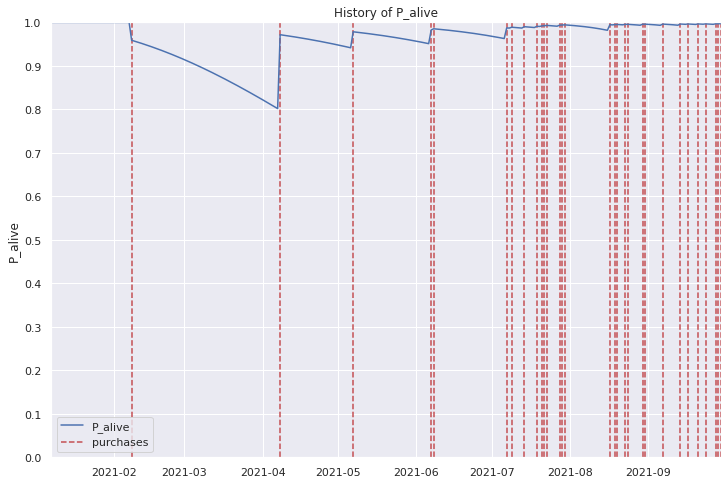

In [ ]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
id = 11437
days_since_birth = 30
sp_trans = df.loc[df['CUSTOMER_NUMBER'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'TRANS_DATE')

**Predicted Transactions with Time**

In [ ]:
df.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION  
0              MFS  MOBILE BANKING OPERATION  
1              MFS  MOBILE BANKING OPERATION  
2               VI         INTERNAL TRANSFER

In [ ]:
dfxy=df

In [ ]:
from lifetimes.utils import expected_cumulative_transactions

t = (dfxy.TRANS_DATE.max() - dfxy.TRANS_DATE.min()).days
dfxy = expected_cumulative_transactions(mbgnbd, dfxy, 'TRANS_DATE', 'CUSTOMER_NUMBER', t)

In [ ]:
dfxy.tail()

actual  predicted
330    1359   1260.983
331    1359   1266.582
332    1359   1272.180
333    1359   1277.778
334    1385   1283.375

In [ ]:
mydy=model_data

In [ ]:
mydy.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION  
0              MFS  MOBILE BANKING OPERATION  
1              MFS  MOBILE BANKING OPERATION  
2               VI         INTERNAL TRANSFER

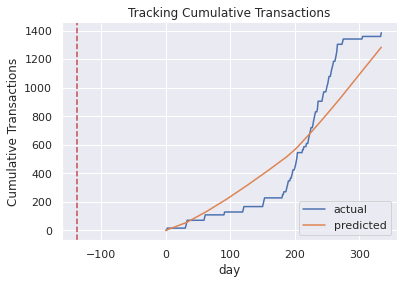

In [ ]:
# Calibration period = 2021-01-07 to 2021-08-26
from datetime import datetime

cal = datetime.strptime('2020-08-22', '%Y-%m-%d')

from lifetimes.plotting import plot_cumulative_transactions
t = (mydy.TRANS_DATE.max() - mydy.TRANS_DATE.min()).days
t_cal = (cal - mydy.TRANS_DATE.min()).days
plot_cumulative_transactions(mbgnbd, mydy, 'TRANS_DATE', 'CUSTOMER_NUMBER', t, t_cal, freq='D')
sns.despine()

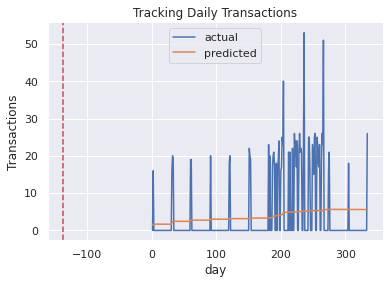

In [ ]:
from lifetimes.plotting import plot_incremental_transactions
plot_incremental_transactions(mbgnbd, mydy, 'TRANS_DATE', 'CUSTOMER_NUMBER', t, t_cal, freq='D')
sns.despine()

In [ ]:
returning_customers = cltvmodelling[ (cltvmodelling['frequency'] > 0) & (cltvmodelling['monetary_value'] > 0)]
returning_customers.sort_values(by='monetary_value', ascending=False).head()

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
26            40207      4.000  168.000 244.000   133554877.112   
37           101577      1.000   30.000  90.000    58000000.000   
47           105541      2.000   21.000 133.000    52416502.110   
75           602184      4.000   62.000 131.000    51368222.335   
18            12481      7.000   74.000 146.000    37606962.173   

    predicted_mobile_transactions  p_alive        churn           LTV  \
26                          0.549    0.906  not churned 944880240.336   
37                          0.506    0.865  not churned -12013791.982   
47                          0.206    0.384      churned -15595416.417   
75                          0.727    0.706    high risk 488597512.191   
18                          0.681    0.429      churned  50104696.718   

    expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
26            149696414.071                     0.074                  0.018   
37            101989486.209                     0.068                  0.017   
47             66828543.324                     0.028                  0.007   
75             57576622.392                     0.098                  0.024   
18             40076315.673                     0.091                  0.023   

             clv  scaled_clv segment  
26 260954639.416       0.801       A  
37 176146932.209       0.503       A  
47  89253020.339       0.134       A  
75 163312031.084       0.408       A  
18 142681608.638       0.266       A

In [ ]:
returning_customers[['monetary_value', 'frequency']].corr()

monetary_value  frequency
monetary_value           1.000     -0.091
frequency               -0.091      1.000

In [ ]:
returning_customers.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                          4.022    0.997  not churned 108980969.786   
1                          2.776    0.996  not churned    138938.522   
2                          5.437    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1                15295.697                     0.371                  0.093   
2              7735002.139                     0.727                  0.182   

            clv  scaled_clv segment  
0 309381877.283       1.000       A  
1    127733.074       0.000       D  
2 126834883.623       0.410       A

**Predict the Average Customer Trsnacation Order Value**

In [ ]:
predicted_monetary = ggf.conditional_expected_average_profit(
        returning_customers['frequency'],
        returning_customers['monetary_value']
)

In [ ]:
aov_df = pd.DataFrame(predicted_monetary, columns = ['aov'])
aov_df = aov_df.sort_values(by='aov', ascending=False)
aov_df.head(5)

aov
26 149696414.071
37 101989486.209
47  66828543.324
75  57576622.392
18  40076315.673

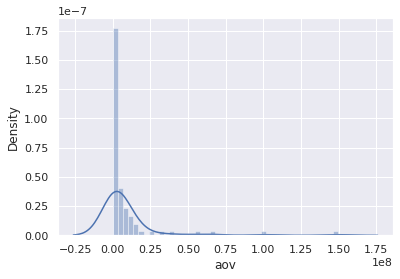

In [ ]:
ax = sns.distplot(aov_df['aov'])

In [ ]:
returning_customers_summary = cltvmodelling[cltvmodelling['frequency']>0]

print(returning_customers_summary.head())
print(len(returning_customers_summary))

   CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   
3            10982      2.000  109.000 110.000      400000.000   
4            10983     16.000  214.000 244.000    15260052.699   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                          4.022    0.997  not churned 108980969.786   
1                          2.776    0.996  not churned    138938.522   
2                          5.437    0.998  not churned  43844896.238   
3                          0.747    0.978  not churned   -769732.137   
4                          1.865    0.945  not churned  36131890.543   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1           

**Predict the conditional, expected average lifetime value of our customers**

In [ ]:
print("Expected conditional average revenue: €%s, Average revenue: €%s" % (
    np.round(gg.conditional_expected_average_profit(
        returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value']
        ).mean(), 2),
        np.round(returning_customers_summary[returning_customers_summary['frequency']>0]['monetary_value'].mean(), 2)
        ))

Expected conditional average revenue: €8510307.64, Average revenue: €7271114.72


In [ ]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(cltv_dataset, "CUSTOMER_NUMBER", "TRANS_DATE", 
                                                   calibration_period_end = '2021-08-22',
                                                  observation_period_end = '2021-11-02')

In [ ]:
mbgnbd.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 92 subjects, a: 0.00, alpha: 20.32, b: 0.00, r: 0.98>

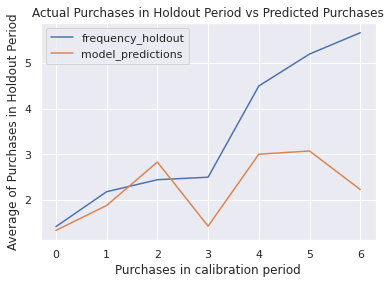

In [ ]:
plot_calibration_purchases_vs_holdout_purchases(mbgnbd, summary_cal_holdout)

**Implementing the Pareto - Negative Binom Distribution + Gamma Gamma Distribution Model**

In [ ]:
cltv_pnbd = cltv_final.copy()

In [ ]:
cltv_pnbd.shape

(88, 15)

In [ ]:
cltv_pnbd.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                          4.022    0.997  not churned 108980969.786   
1                          2.776    0.996  not churned    138938.522   
2                          5.437    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1                15295.697                     0.371                  0.093   
2              7735002.139                     0.727                  0.182   

            clv  scaled_clv segment  
0 309381877.283       1.000       A  
1    127733.074       0.000       D  
2 126834883.623       0.410       A

In [ ]:
pareto_nbd = ParetoNBDFitter(penalizer_coef = 0.1)
pareto_nbd.fit(cltv_pnbd["frequency"], cltv_pnbd["recency"], cltv_pnbd["T"])

<lifetimes.ParetoNBDFitter: fitted with 88 subjects, alpha: 24.26, beta: 575.94, r: 1.42, s: 0.43>

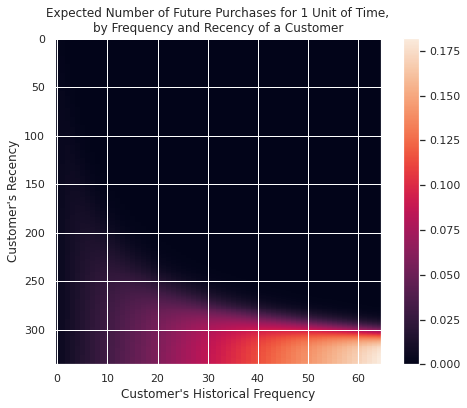

In [ ]:
plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(pareto_nbd)

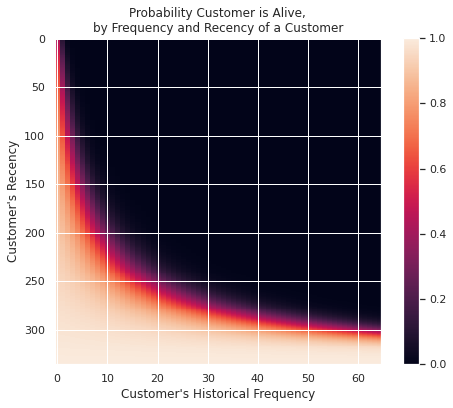

In [ ]:
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(pareto_nbd)

In [ ]:
cltv_pnbd["p_not_alive"] = 1-pareto_nbd.conditional_probability_alive(cltv_pnbd["frequency"], cltv_pnbd["recency"], cltv_pnbd["T"])
cltv_pnbd["p_alive"] = pareto_nbd.conditional_probability_alive(cltv_pnbd["frequency"], cltv_pnbd["recency"], cltv_pnbd["T"])

In [ ]:
t = 30
cltv_pnbd["predicted_mobile_transactions"] = pareto_nbd.conditional_expected_number_of_purchases_up_to_time(t, cltv_pnbd["frequency"], cltv_pnbd["recency"], cltv_pnbd["T"])

In [ ]:
cltv_pnbd.sort_values(by = "predicted_mobile_transactions").tail(5)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
8             11520     64.000  335.000 335.000     5168516.407   
33           101122     64.000  335.000 335.000     3223472.450   
2             10953     64.000  335.000 335.000     7682873.763   
42           103027     64.000  335.000 335.000     6367557.470   
17            12409     64.000  335.000 335.000     1157789.288   

    predicted_mobile_transactions  p_alive        churn          LTV  \
8                           5.425    1.000  not churned 29523631.190   
33                          5.425    1.000  not churned 18445058.774   
2                           5.425    1.000  not churned 43844896.238   
42                          5.425    1.000  not churned 36353123.751   
17                          5.425    1.000  not churned  6679350.133   

    expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
8               5203584.854                     0.727                  0.182   
33              3245343.762                     0.727                  0.182   
2               7735002.139                     0.727                  0.182   
42              6410761.417                     0.727                  0.182   
17              1165644.928                     0.727                  0.182   

             clv  scaled_clv segment  p_not_alive  
8   85325869.151       0.276       A        0.000  
33  53215533.840       0.172       A        0.000  
2  126834883.623       0.410       A        0.000  
42 105120594.310       0.340       A        0.000  
17  19113590.426       0.062       B        0.000

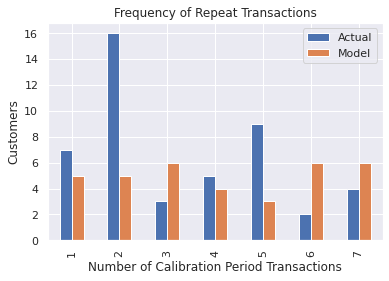

In [ ]:
plot_period_transactions(pareto_nbd)

In [ ]:
#dividing our dataset into training & holdout
pareto_summary_cal_holdout = calibration_and_holdout_data(model_data, "CUSTOMER_NUMBER", "TRANS_DATE", 
                                                   calibration_period_end = '2021-07-26',
                                                  observation_period_end = '2021-12-2')

In [ ]:
pareto_nbd.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 76 subjects, alpha: 27.30, beta: 24.57, r: 1.06, s: 0.00>

In [ ]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal   T_cal  frequency_holdout  \
CUSTOMER_NUMBER                                                          
10468                   15.000      200.000 200.000             31.000   
10846                   11.000      200.000 200.000             19.000   
10953                   23.000      200.000 200.000             39.000   
10983                    3.000       99.000 109.000             13.000   
11339                   14.000      200.000 200.000             24.000   

                 duration_holdout  
CUSTOMER_NUMBER                    
10468                     129.000  
10846                     129.000  
10953                     129.000  
10983                     129.000  
11339                     129.000

In [ ]:
pareto_nbd.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 76 subjects, alpha: 26.84, beta: 525.84, r: 1.04, s: 0.00>

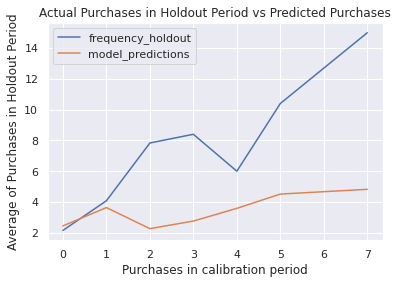

In [ ]:
plot_calibration_purchases_vs_holdout_purchases(pareto_nbd, pareto_summary_cal_holdout)

In [ ]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal   T_cal  frequency_holdout  \
CUSTOMER_NUMBER                                                          
10468                   15.000      200.000 200.000             31.000   
10846                   11.000      200.000 200.000             19.000   
10953                   23.000      200.000 200.000             39.000   
10983                    3.000       99.000 109.000             13.000   
11339                   14.000      200.000 200.000             24.000   

                 duration_holdout  
CUSTOMER_NUMBER                    
10468                     129.000  
10846                     129.000  
10953                     129.000  
10983                     129.000  
11339                     129.000

In [ ]:
model_copy.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                   27456061.672    0.997  not churned 108980969.786   
1                      50723.828    0.996  not churned    138938.522   
2                    8168929.290    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  predicted_transactions  \
0             27456061.672                     0.537                   4.149   
1                50723.828                     0.371                   2.837   
2              8168929.290                     0.727                   5.635   

   predicted_purchases  actual_30  Error  actual_28  
0                4.089      4.222 -0.209      3.940  
1                2.804      2.866 -0.163      2.675  
2                5.546      5.731 -0.286      5.349

In [ ]:
#Creating a function which can predict the future purchased value based on the lookup window

def pareto_get_pred_error(t, id_):
    
    individual_p = model_copy[model_copy["CUSTOMER_NUMBER"] == id_]
    
    ind_pred_p = pareto_nbd.predict(t, individual_p["frequency"], individual_p["recency"], individual_p["T"])
    
    actual_val_p = individual_p["frequency"]/individual_p["recency"]*t
    
    error = actual_val_p - ind_pred_p
    
    print("Your Predicted Mobile Transaction: %s" % (ind_pred_p))
    print("Your Actual Mobile Transaction: %s" % (actual_val_p))
    print("Prediction Error: %s" % (error))

In [ ]:
pareto_get_pred_error(30, 11799.0)

Your Predicted Mobile Transaction: 11   1.496
dtype: float64
Your Actual Mobile Transaction: 11   1.917
dtype: float64
Prediction Error: 11   0.422
dtype: float64


In [ ]:
model_copy["actual_30_p"] = model_copy["frequency"]/model_copy["recency"]*30

In [ ]:
model_copy["actual_30_p"].fillna(0, inplace = True)

In [ ]:
model_copy["p_error"] = model_copy["actual_30_p"]-model_copy["predicted_transactions"]

In [ ]:
print("Mean Squared Error: %s" % mean_squared_error(model_copy["actual_30_p"], model_copy["predicted_transactions"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(model_copy["actual_30_p"], model_copy["predicted_transactions"])))
print("Average Purchase Error: %s" %(model_copy["p_error"].mean()))

Mean Squared Error: 0.8881805844663041
Root Mean Squared Error: 0.9424333315764591
Average Purchase Error: 0.4676323989043219


In [ ]:
pareto_mse_purchase = mean_squared_error(model_copy["actual_30_p"], model_copy["predicted_transactions"])
pareto_rmse_purchase = sqrt(mean_squared_error(model_copy["actual_30_p"], model_copy["predicted_transactions"]))
pareto_avg_error_purchase = model_copy["p_error"].mean()

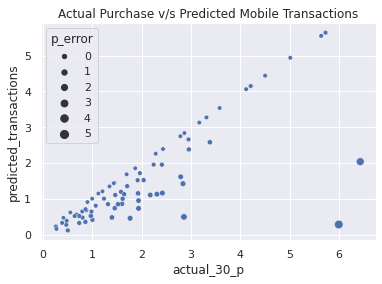

In [ ]:
sns.scatterplot(model_copy["actual_30_p"], model_copy["predicted_transactions"], size = model_copy["p_error"])
plt.title("Actual Purchase v/s Predicted Mobile Transactions")
plt.show()

In [ ]:
#Get the history alive plot to check whether the customer is alive or not

def get_history_alive(t_, data_, id_):
    
    individual_alive = cltv_dataset[cltv_dataset["CUSTOMER_NUMBER"] == id_]
    plot_history_alive(pareto_nbd, t = t_, transactions = individual_alive, datetime_col = "TRANS_DATE",
                  freq = "D")

In [ ]:
summary_cal_holdout

frequency_cal  recency_cal   T_cal  frequency_holdout  \
CUSTOMER_NUMBER                                                          
10468                   25.000      224.000 227.000             20.000   
10846                   16.000      225.000 227.000             14.000   
10953                   35.000      225.000 227.000             26.000   
10982                    0.000        0.000   2.000              1.000   
10983                    5.000      121.000 136.000             10.000   
...                        ...          ...     ...                ...   
751878                   0.000        0.000 166.000              0.000   
752617                   3.000      193.000 196.000              2.000   
820171                   9.000      165.000 167.000              5.000   
821319                   4.000       90.000 136.000              1.000   
821410                   8.000      134.000 136.000              5.000   

                 duration_holdout  
CUSTOMER_NUMBER                    
10468                      72.000  
10846                      72.000  
10953                      72.000  
10982                      72.000  
10983                      72.000  
...                           ...  
751878                     72.000  
752617                     72.000  
820171                     72.000  
821319                     72.000  
821410                     72.000  

[92 rows x 5 columns]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def smape(y_true, y_pred):
    difference = abs(y_true - y_pred)
    denominator = (abs(y_true) + abs(y_pred))/2
    return np.mean(np.where(denominator==0, 0, difference/denominator))

In [ ]:
cltv_pnbd.head(4)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   
3            10982      2.000  109.000 110.000      400000.000   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                          4.013    0.999  not churned 108980969.786   
1                          2.771    1.000  not churned    138938.522   
2                          5.425    1.000  not churned  43844896.238   
3                          0.756    0.999  not churned   -769732.137   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1                15295.697                     0.371                  0.093   
2              7735002.139                     0.727                  0.182   
3               509982.249                     0.100                  0.025   

            clv  scaled_clv segment  p_not_alive  
0 309381877.283       1.000       A        0.001  
1    127733.074       0.000       D        0.000  
2 126834883.623       0.410       A        0.000  
3   1126800.513       0.004       C        0.001

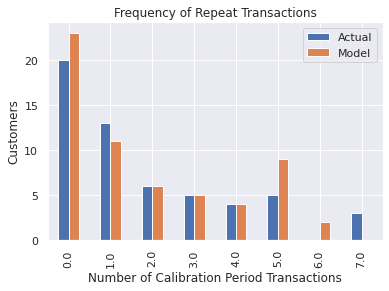

In [ ]:
plot_period_transactions(pareto_nbd)

In [ ]:
summary_copy = cltv_pnbd.copy()

In [ ]:
summary_copy = summary_copy[(summary_copy["frequency"] > 0) & (summary_copy["monetary_value"] > 0)]

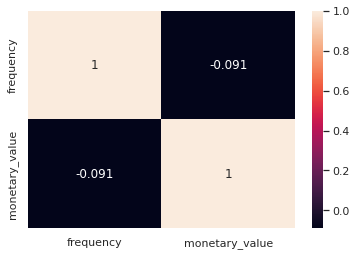

In [ ]:
sns.heatmap(summary_copy[["frequency", "monetary_value"]].corr(), annot = True)

In [ ]:
ggf_p = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [ ]:
ggf_p.fit(summary_copy["frequency"], summary_copy["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 88 subjects, p: 0.16, q: 0.42, v: 953059.37>

In [ ]:
summary_copy["expected_avg_sales_p"] = ggf_p.conditional_expected_average_profit(summary_copy["frequency"],
                                                                        summary_copy["monetary_value"])

In [ ]:
avg_purchase_error = summary_copy["monetary_value"].mean() - summary_copy["expected_avg_sales_p"].mean()

In [ ]:
print("Acutal Avg Sales: %s" % summary_copy["monetary_value"].mean())
print("Predicted Avg Sales: %s" % summary_copy["expected_avg_sales_p"].mean())
print("Mean Sqaured Error: %s" % mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"]))
print("Root Mean Sqaured Error: %s" % sqrt(mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"])))
print("Avg Sales Error: %s" % avg_purchase_error)

Acutal Avg Sales: 7271114.720577222
Predicted Avg Sales: 33954398.89740655
Mean Sqaured Error: 3.4019787667922044e+16
Root Mean Sqaured Error: 184444538.18945694
Avg Sales Error: -26683284.176829327


In [ ]:
summary_copy["actual_30_p"] = model_copy["frequency"]/model_copy["recency"]*30

In [ ]:
summary_copy["actual_30_p"].fillna(0, inplace = True)

In [ ]:
summary_copy["p_error"] = summary_copy["actual_30_p"]-summary_copy["predicted_mobile_transactions"]

In [ ]:
actual = summary_copy["actual_30_p"] * summary_copy["monetary_value"]
predicted = summary_copy["predicted_mobile_transactions"] * summary_copy["expected_avg_sales_p"]

In [ ]:
error = actual-predicted

In [ ]:

result_p = pd.DataFrame([actual, predicted, error], index = ["Actual", "Predicted", "Error"]).T

In [ ]:
print("Average Error: %s" % result_p["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result_p["Actual"], result_p["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result_p["Actual"], result_p["Predicted"])))

Average Error: -11988708.381797526
Mean Squared Error: 1.0628459968871044e+16
Root Mean Squared Error: 103094422.5885719


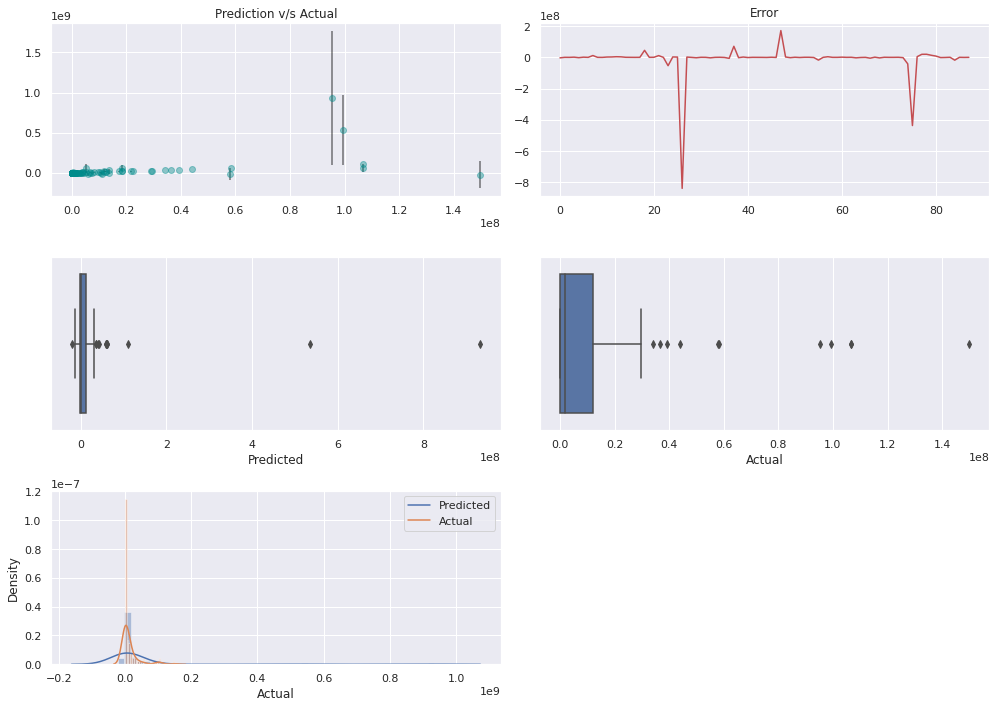

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(321)
plt.errorbar(result_p["Actual"], result_p["Predicted"], yerr=result_p["Error"], fmt='o', color='darkcyan',
             ecolor='black', elinewidth=2, capsize=0, alpha = 0.4);
plt.title("Prediction v/s Actual")
plt.subplot(322)
plt.plot(result_p["Error"], color = 'r')
plt.title("Error")
plt.subplot(323)
sns.boxplot(result_p["Predicted"])
plt.subplot(324)
sns.boxplot(result_p["Actual"])
plt.subplot(325)
sns.distplot(result_p["Predicted"])
sns.distplot(result_p["Actual"])
plt.legend(["Predicted", "Actual"])
plt.tight_layout()

In [ ]:
summary_copy["predicted_clv_p"] = ggf_p.customer_lifetime_value(pareto_nbd,
                                                       summary_copy["frequency"],
                                                       summary_copy["recency"],
                                                       summary_copy["T"],
                                                       summary_copy["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [ ]:
summary_copy.shape

(88, 20)

In [ ]:
summary_copy["CLV_p"] = summary_copy["predicted_clv_p"]*0.05

**Model Performance Results Interpretation**

In [ ]:
summary_.reset_index(inplace=True)

In [ ]:
predicted_clv_results = pd.DataFrame(summary_[["CUSTOMER_NUMBER", "predicted_clv"]])

In [ ]:
predicted_clv_results = predicted_clv_results.merge(summary_copy[["CUSTOMER_NUMBER", "predicted_clv_p"]], on = "CUSTOMER_NUMBER")

In [ ]:
predicted_clv_results = predicted_clv_results.merge(summary_mbg_new[["CUSTOMER_NUMBER", "predicted_clv"]], on = "CUSTOMER_NUMBER")

In [ ]:
predicted_clv_results.columns = ["CUSTOMER_NUMBER", "BG-NBD", "Pareto-NBD", "MBG-NBD"]

In [ ]:
predicted_clv_results.head(5)

CUSTOMER_NUMBER         BG-NBD     Pareto-NBD        MBG-NBD
0            10468 2897677134.884 2822242731.484 2584709219.242
1            10846    3670460.401    3585963.020    1071694.941
2            10953 1169295239.691 1136837610.321 1057493188.394
3            10982  -17430724.779  -17828143.404    9794425.422
4            10983  994922067.020  970032341.463  762965846.514

In [ ]:
predicted_clv_results.to_csv("Predicted_CLV_Results.csv")

**Mobile Transactions Prediction Result Summary**

In [ ]:
indexes = ["MSE Purchase Error", "RMSE Purchase Error","Avg Purchase Error"]

In [ ]:
data = [[bgf_mse_purchase_30, pareto_mse_purchase, mbg_mse_purchase],
[bgf_rmse_purchase_30, pareto_rmse_purchase, mbg_rmse_purchase], [bgf_avg_error_purchase_30, pareto_avg_error_purchase, mbg_avg_purchase_error]]

In [ ]:
model_purchase_result = pd.DataFrame(data, columns = ["BG-NBD", "Pareto-NBD", "MBG-NBD"], index = indexes)

In [ ]:
model_purchase_result

BG-NBD  Pareto-NBD  MBG-NBD
MSE Purchase Error    0.732       0.888    1.402
RMSE Purchase Error   0.856       0.942    1.184
Avg Purchase Error    0.329       0.468    0.611

As we can see here is that there is no much difference when it comes to the performance of these models but the **BG-NBD Model** is slightly performing better when it comes it minimizing the MSE & RMSE Errors.

**Customer Segmentation using the Predicted CLV Values**

We have calculated the CLV and deliver the same to the marketing team but now marketing team is interested to know the most profitable customers segment which they can target the deliver the best optimized campaigns.

Our work is to deliver the requested data to the marketing team & to perform the same we will be going to perform the clustering on the predicted metrics.

In [ ]:
cltv_final.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                          4.022    0.997  not churned 108980969.786   
1                          2.776    0.996  not churned    138938.522   
2                          5.437    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1                15295.697                     0.371                  0.093   
2              7735002.139                     0.727                  0.182   

            clv  scaled_clv segment  
0 309381877.283       1.000       A  
1    127733.074       0.000       D  
2 126834883.623       0.410       A

In [ ]:
col = ['frequency', 'monetary_value', 'recency', "predicted_mobile_transactions", 'p_alive', 'churn', 'LTV', "expected_transac_1_month", "expected_average_profit", 'expected_trans_1_week' ]

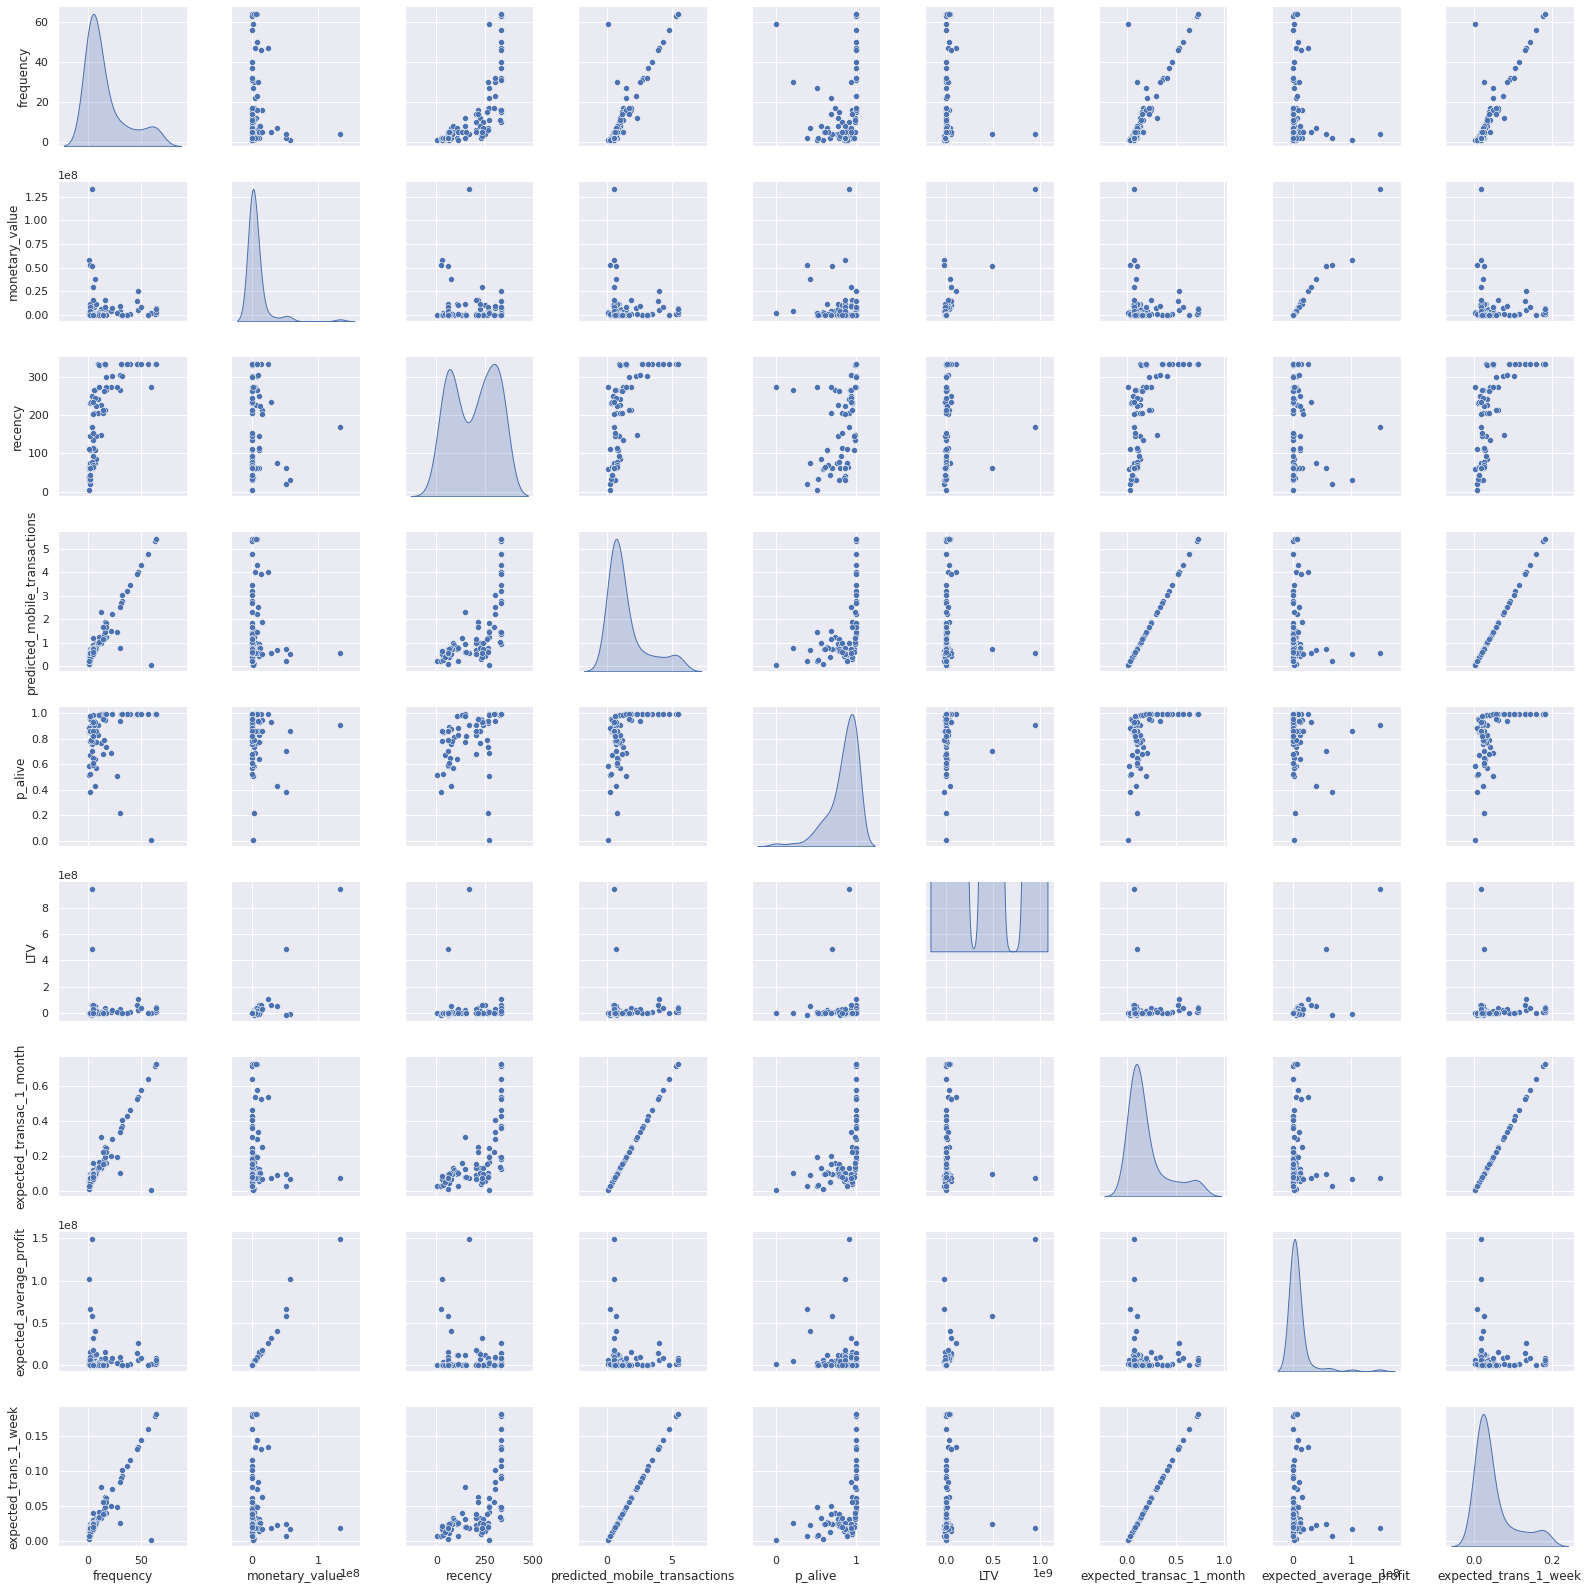

In [ ]:
sns.pairplot(cltv_final[col], diag_kind = "kde")

In [ ]:
new_df = cltv_final[col]

In [ ]:
new_df.head(3)

frequency  monetary_value  recency  predicted_mobile_transactions  p_alive  \
0     47.000    25279393.870  334.000                          4.022    0.997   
1     32.000       15089.469  335.000                          2.776    0.996   
2     64.000     7682873.763  335.000                          5.437    0.998   

         churn           LTV  expected_transac_1_month  \
0  not churned 108980969.786                     0.538   
1  not churned    138938.522                     0.371   
2  not churned  43844896.238                     0.727   

   expected_average_profit  expected_trans_1_week  
0             25513528.805                  0.135  
1                15295.697                  0.093  
2              7735002.139                  0.182

**Label Encoding the Categorical Variables**

In [ ]:
# Get list of categorical variables
from sklearn import preprocessing
s = (new_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['churn']


In [ ]:
encoder = preprocessing.LabelEncoder()
categorical_features = new_df.columns.tolist()
for each in categorical_features:
    new_df[each] = encoder.fit_transform(new_df[each])

In [ ]:
new_df.head(10)

frequency  monetary_value  recency  predicted_mobile_transactions  p_alive  \
0         24              81       51                             71       69   
1         20               9       52                             66       66   
2         29              66       52                             76       75   
3          1              33       18                             34       52   
4         13              79       29                             61       47   
5          0              39        6                             11       30   
6         22              41       52                             69       68   
7         18              57       41                             36        1   
8         29              61       52                             76       75   
9          6              35       40                             25       41   

   churn  LTV  expected_transac_1_month  expected_average_profit  \
0      2   85                        71                       81   
1      2   27                        66                        8   
2      2   80                        76                       65   
3      2    8                        34                       34   
4      2   77                        61                       79   
5      2   18                        11                       46   
6      2   55                        69                       39   
7      0   50                        36                       55   
8      2   74                        76                       59   
9      2   40                        24                       33   

   expected_trans_1_week  
0                     71  
1                     66  
2                     76  
3                     34  
4                     61  
5                     11  
6                     69  
7                     36  
8                     76  
9                     24

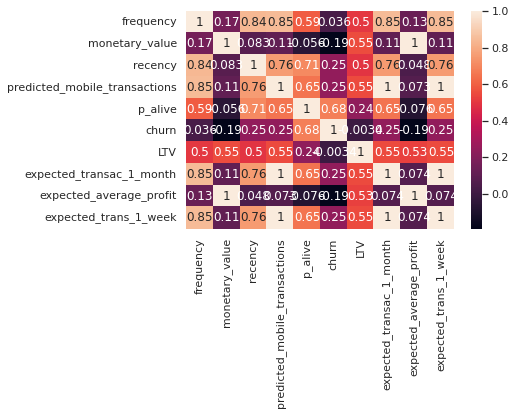

In [ ]:
sns.heatmap(new_df.corr(),annot=True)

In [ ]:
features = new_df.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(new_df)

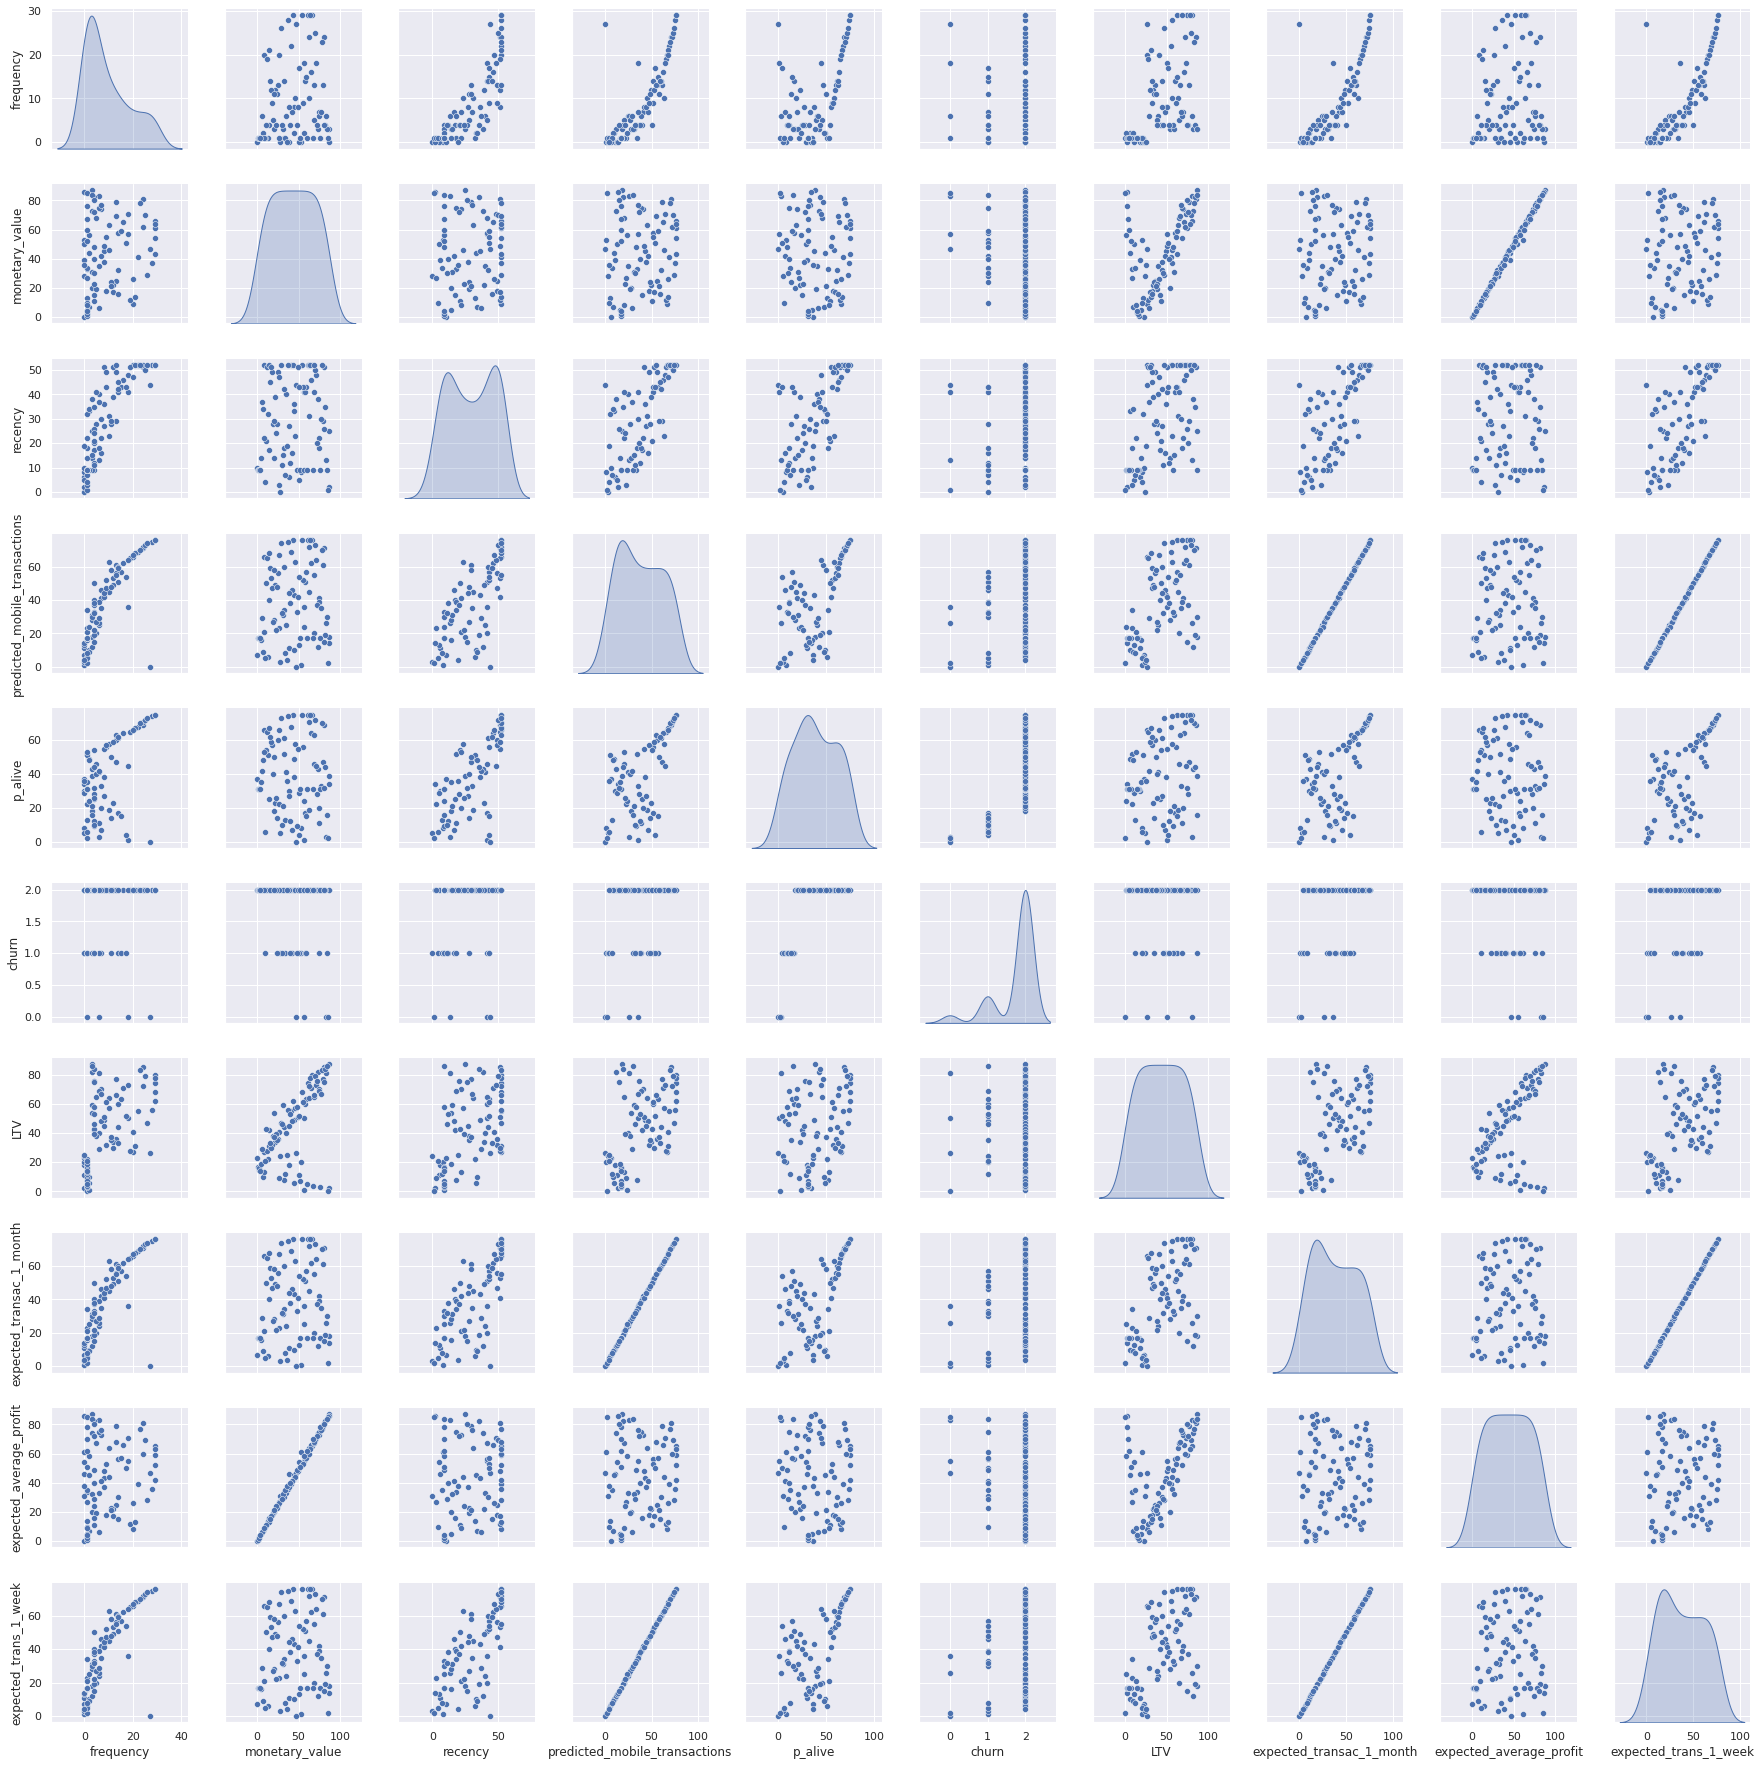

In [ ]:
sns.pairplot(new_df, diag_kind='kde')

In [ ]:
from scipy import stats
from sklearn.metrics import silhouette_score

import datetime as dt
import scipy.stats
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values of Inertia and Silhouette Score.
        Lineplot of values of Inertia and Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
    inertia = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
        inertia_score = round(kmeans.inertia_, 2)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]), 
            inertia_score, 
            (inertia[n_clusters - start] - inertia[n_clusters - start - 1])))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sns.pointplot(x=n_clu, y=inertia)

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score(SS): 0.338, SS Delta: 0.0, Inertia: 234916.44, Inertia Delta: 0.0
No. Clusters: 3, Silhouette Score(SS): 0.34, SS Delta: 0.0020000000000000018, Inertia: 168244.59, Inertia Delta: -66671.85
No. Clusters: 4, Silhouette Score(SS): 0.336, SS Delta: -0.0040000000000000036, Inertia: 130544.14, Inertia Delta: -37700.45
No. Clusters: 5, Silhouette Score(SS): 0.37, SS Delta: 0.033999999999999975, Inertia: 96975.38, Inertia Delta: -33568.759999999995
No. Clusters: 6, Silhouette Score(SS): 0.394, SS Delta: 0.02400000000000002, Inertia: 76391.93, Inertia Delta: -20583.45000000001
No. Clusters: 7, Silhouette Score(SS): 0.367, SS Delta: -0.027000000000000024, Inertia: 67882.12, Inertia Delta: -8509.809999999998
No. Clusters: 8, Silhouette Score(SS): 0.354, SS Delta: -0.013000000000000012, Inertia: 61187.82, Inertia Delta: -6694.299999999996
No. Clusters: 9, Silhouette Score(SS): 0.336, SS Delta: -0.01799999999999996, Inertia: 55915.24, Inertia Delta: -5272.580000000

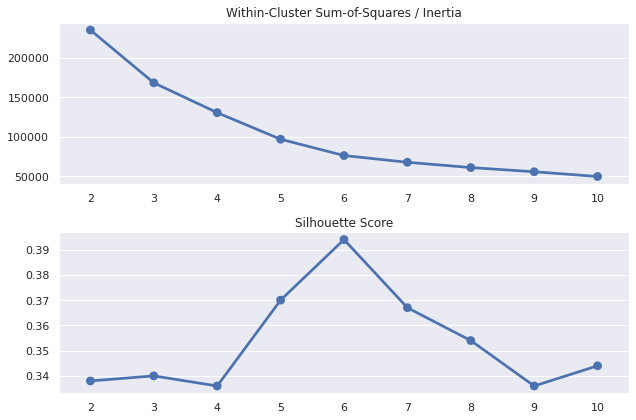

In [ ]:
optimal_kmeans(new_df)

In [ ]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(new_df)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])

In [ ]:
groups

number_of_group    inertia
0                 1 387536.250
1                 2 234916.444
2                 3 168359.671
3                 4 130560.721
4                 5  96934.677
5                 6  76193.348
6                 7  68022.810
7                 8  60737.390
8                 9  56869.556
9                10  50574.640
10               11  45231.699
11               12  41728.288
12               13  38936.695
13               14  37035.528

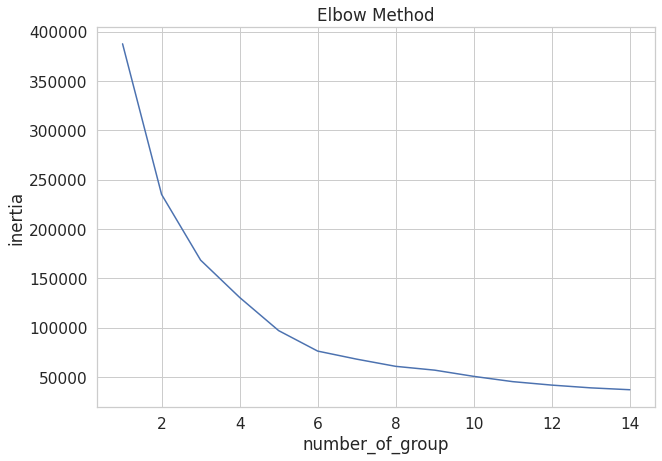

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number_of_group', y = 'inertia').set(title = "Elbow Method")
plt.show()

In [ ]:
inertia = []

for i in range(2, 11):
    cluster = KMeans(n_clusters = i, init = "k-means++").fit(new_df)
    inertia.append(cluster.inertia_)

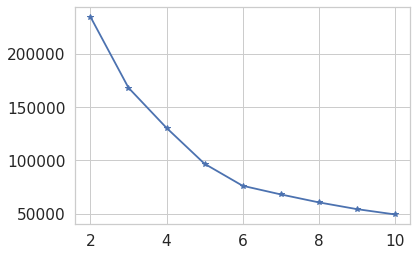

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker = "*", linewidth = 1.8)

In [ ]:
k_model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 1000)

In [ ]:
k_model_fit = k_model.fit(new_df)

In [ ]:
new_df

frequency  monetary_value  recency  predicted_mobile_transactions  \
0          24              81       51                             71   
1          20               9       52                             66   
2          29              66       52                             76   
3           1              33       18                             34   
4          13              79       29                             61   
..        ...             ...      ...                            ...   
83          1               4        9                             17   
84          4              80       26                             15   
85         11              24       28                             48   
86          4              23       24                             22   
87         11              21       29                             58   

    p_alive  churn  LTV  expected_transac_1_month  expected_average_profit  \
0        69      2   85                        71                       81   
1        66      2   27                        66                        8   
2        75      2   80                        76                       65   
3        52      2    8                        34                       34   
4        47      2   77                        61                       79   
..      ...    ...  ...                       ...                      ...   
83       31      2   14                        17                        4   
84       32      2   75                        15                       80   
85       14      1   35                        48                       23   
86       26      2   39                        22                       24   
87       50      2   37                        58                       21   

    expected_trans_1_week  
0                      71  
1                      66  
2                      76  
3                      34  
4                      61  
..                    ...  
83                     17  
84                     15  
85                     48  
86                     22  
87                     58  

[88 rows x 10 columns]

In [ ]:
centers = k_model_fit.cluster_centers_

In [ ]:
centers

array([[19.81481481, 44.92592593, 48.22222222, 65.7037037 , 65.51851852,
         2.        , 56.48148148, 65.66666667, 44.        , 65.66666667],
       [ 3.45833333, 15.29166667, 20.66666667, 25.70833333, 33.29166667,
         1.875     , 28.25      , 25.66666667, 15.375     , 25.66666667],
       [ 7.72727273, 65.22727273, 27.5       , 36.36363636, 23.22727273,
         1.45454545, 66.40909091, 36.40909091, 64.72727273, 36.40909091],
       [ 2.46666667, 54.2       , 11.33333333, 10.53333333, 23.6       ,
         1.53333333, 10.93333333, 10.6       , 56.46666667, 10.6       ]])

In [ ]:
labels = k_model_fit.labels_

In [ ]:
labels = pd.Series(labels, name = "cluster_group")

In [ ]:
cltv_final = pd.concat([cltv_final, labels], axis = 1)

In [ ]:
label_mapper = dict({0 : "Low_LTV", 3: "Medium_LTV", 1: "High_LTV", 2: "V_High_LTV"})

In [ ]:
cltv_final["cluster_group"] = cltv_final["cluster_group"].map(label_mapper)

In [ ]:
cltv_final.groupby("cluster_group").mean().T

cluster_group                   High_LTV      Low_LTV   Medium_LTV  \
CUSTOMER_NUMBER               286434.292   160447.926   291454.133   
frequency                          4.667       36.370        5.533   
recency                          137.042      313.926       77.600   
T                                197.083      316.481      168.800   
monetary_value                114104.403  4166370.880 10059270.957   
predicted_mobile_transactions      0.678        3.237        0.382   
p_alive                            0.849        0.991        0.719   
LTV                           471885.233 16909113.977 -4225485.281   
expected_average_profit       129209.370  4221347.819 14844916.787   
expected_transac_1_month           0.091        0.433        0.051   
expected_trans_1_week              0.023        0.108        0.013   
clv                           336395.863 47251816.277 23561423.453   
scaled_clv                         0.001        0.152        0.059   

cluster_group                   V_High_LTV  
CUSTOMER_NUMBER                 231464.364  
frequency                           10.227  
recency                            183.682  
T                                  252.864  
monetary_value                16988114.164  
predicted_mobile_transactions        0.890  
p_alive                              0.738  
LTV                           82314612.955  
expected_average_profit       18597995.646  
expected_transac_1_month             0.119  
expected_trans_1_week                0.030  
clv                           47146400.490  
scaled_clv                           0.127

In [ ]:
cluster_avg = cltv_final.groupby(['cluster_group']).mean() 
population_avg = cltv_final.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

CUSTOMER_NUMBER  frequency  recency      T  monetary_value  \
cluster_group                                                               
High_LTV                 0.220     -0.710   -0.290 -0.190          -0.980   
Low_LTV                 -0.320      1.280    0.630  0.300          -0.430   
Medium_LTV               0.240     -0.650   -0.600 -0.300           0.380   
V_High_LTV              -0.010     -0.360   -0.050  0.040           1.340   

               predicted_mobile_transactions  p_alive    LTV  \
cluster_group                                                  
High_LTV                              -0.540    0.010 -0.980   
Low_LTV                                1.210    0.180 -0.330   
Medium_LTV                            -0.740   -0.150 -1.170   
V_High_LTV                            -0.390   -0.120  2.270   

               expected_average_profit  expected_transac_1_month  \
cluster_group                                                      
High_LTV                        -0.980                    -0.540   
Low_LTV                         -0.500                     1.210   
Medium_LTV                       0.740                    -0.740   
V_High_LTV                       1.190                    -0.390   

               expected_trans_1_week    clv  scaled_clv  
cluster_group                                            
High_LTV                      -0.540 -0.990      -0.990  
Low_LTV                        1.210  0.550       0.720  
Medium_LTV                    -0.740 -0.220      -0.340  
V_High_LTV                    -0.390  0.550       0.430

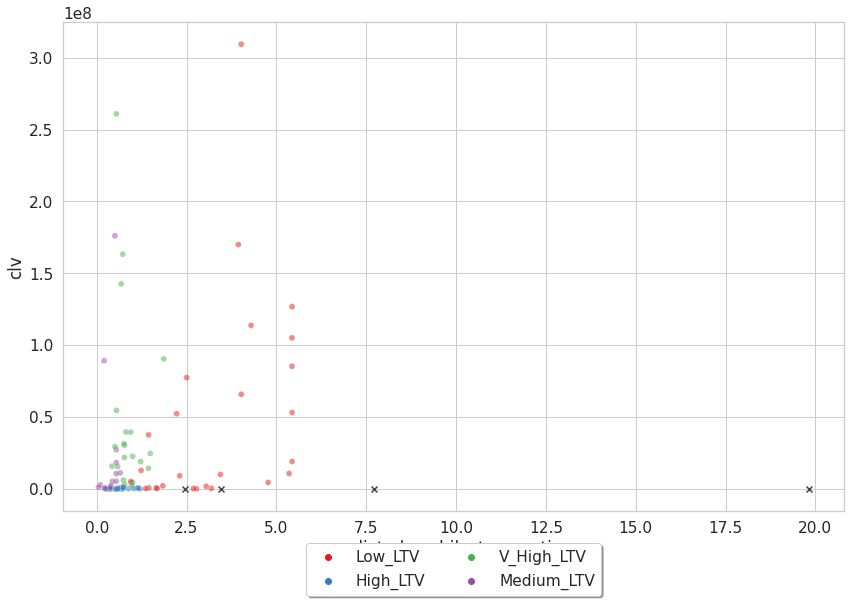

In [ ]:
plt.figure(figsize=(14,9))
sns.scatterplot(x = "predicted_mobile_transactions", y = "clv", hue = "cluster_group", palette = "Set1", data = cltv_final, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 2], marker = "x", color = "k", alpha = 0.8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

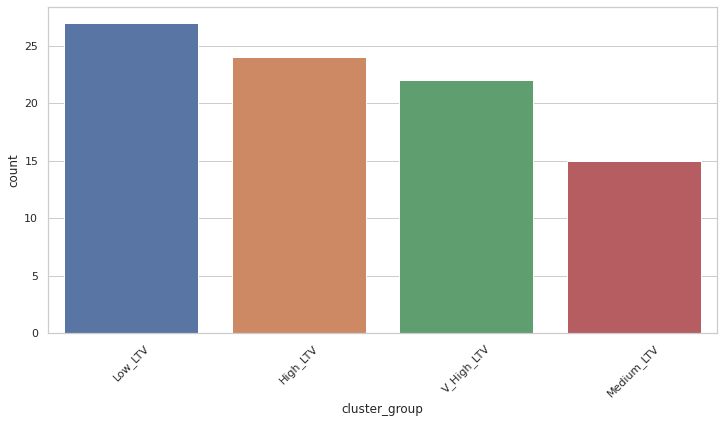

In [ ]:
#set sns theme
sns.set_theme(style="whitegrid")

#set plot size
fig, ax = plt.subplots(figsize=(12, 6))

#plot count of each RFM segment
sns.countplot(x="cluster_group", data=cltv_final)
plt.xticks(rotation=45)

plt.show()

In [ ]:
cltv_final.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                          4.022    0.997  not churned 108980969.786   
1                          2.776    0.996  not churned    138938.522   
2                          5.437    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1                15295.697                     0.371                  0.093   
2              7735002.139                     0.727                  0.182   

            clv  scaled_clv segment cluster_group  
0 309381877.283       1.000       A       Low_LTV  
1    127733.074       0.000       D       Low_LTV  
2 126834883.623       0.410       A       Low_LTV

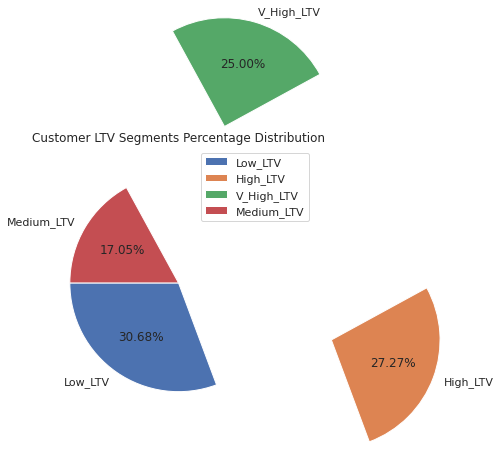

In [ ]:
plt.figure(figsize=(11,5))
plt.pie(cltv_final["cluster_group"].value_counts(), labels = cltv_final["cluster_group"].unique(), startangle = 180, explode = [0.0,1.5,1.5,0.0], autopct = "%1.2f%%")
plt.title("Customer LTV Segments Percentage Distribution")
plt.legend()

In [ ]:
cltv_final.cluster_group.value_counts()

Low_LTV       27
High_LTV      24
V_High_LTV    22
Medium_LTV    15
Name: cluster_group, dtype: int64

**Average CLV Breakdown by the Segments Summary Table**

In [ ]:
avclv = cltv_final.groupby("cluster_group").agg({"CUSTOMER_NUMBER": "nunique", 
                                        "recency": "mean",
                                        "frequency": "mean",
                                        "expected_trans_1_week": "mean",
                                        "expected_transac_1_month": "mean",
                                        "expected_average_profit": "mean",
                                        "clv": "mean",
                                        "monetary_value": "mean"})
avclv.rename(columns = {"CUSTOMER_NUMBER": "The Segment Size"}, inplace = True)

cm = sns.light_palette("lime", as_cmap = True)

avclv.T.style.background_gradient(cmap = cm, axis = 1)\
.set_precision(2)\
.highlight_min(axis = 1, color = "#0073cf")\
.highlight_max(axis = 1, color = "#d01c1f")

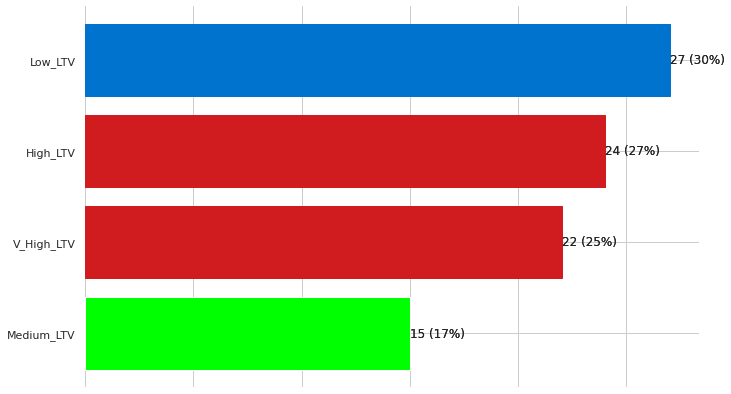

In [ ]:
# count the number of customers in each segment
segments_counts = cltv_final['cluster_group'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(11, 7))

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='lime')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['V_High_LTV', 'High_LTV']:
            bar.set_color('#d01c1f')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Low_LTV']:
            bar.set_color('#0073cf')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

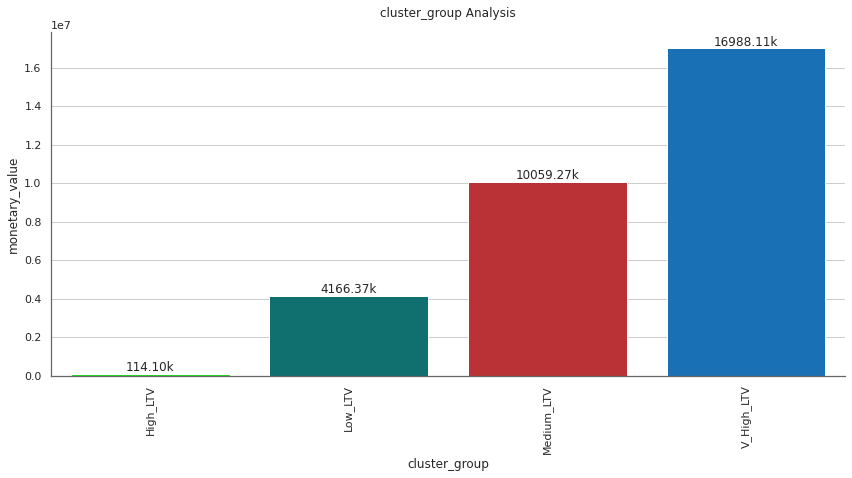

In [ ]:
# create a new dataframe for average revenue by taking the mean of it
colors_list = ['lime', 'Teal', '#d01c1f', '#0073cf']
df_monthly_order_avg = cltv_final.groupby('cluster_group')['monetary_value'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='cluster_group', y='monetary_value', df=df_monthly_order_avg, value=True, colors=colors_list)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Text(0.5, 1.0, 'Customer Lifetime Value Segments Distribution')

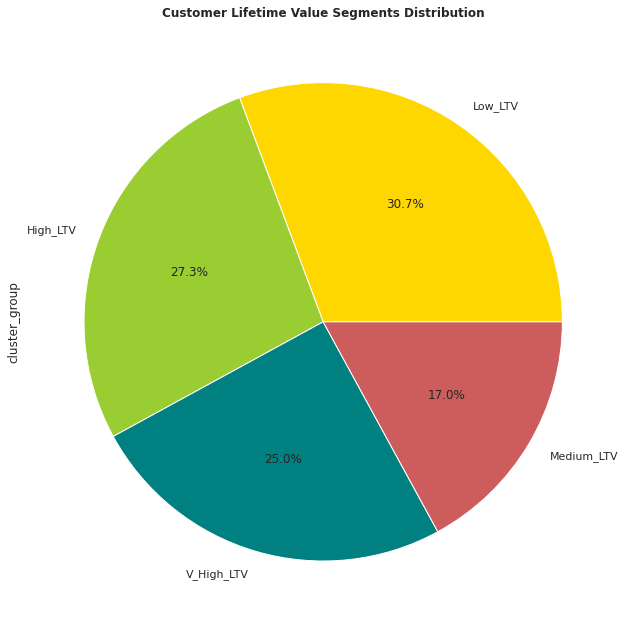

In [ ]:
colors_list = ['gold', 'yellowgreen', 'Teal', 'IndianRed', 'maroon', 'silver', 'Teal', 'IndianRed', 'lime','Fuchsia']

plt.figure(figsize = (16,11))
cltv_final['cluster_group'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colors=colors_list)
plt.title("Customer Lifetime Value Segments Distribution", weight = 'bold')

**Churn Rate**

Text(0.5, 1.0, 'Customers Churn Status Segmentation Distribution')

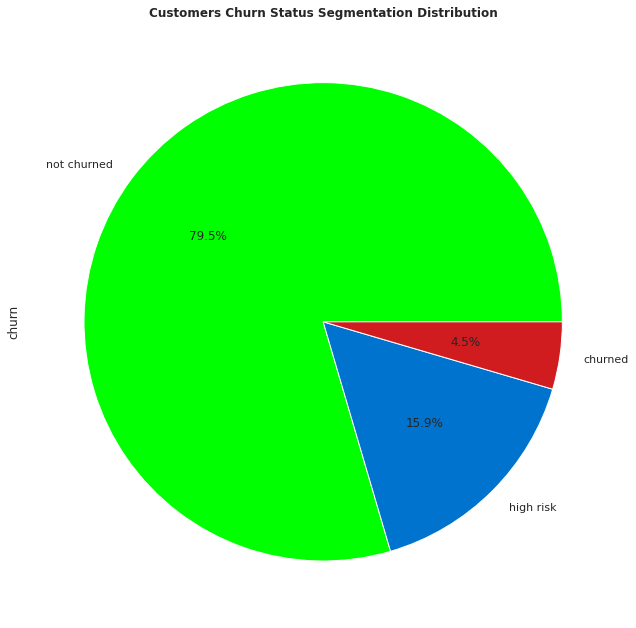

In [ ]:
colors_list = ['lime', '#0073cf', '#d01c1f', 'maroon', 'silver', 'Teal', 'IndianRed', 'lime','Fuchsia']

plt.figure(figsize = (16,11))
cltv_final['churn'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colors=colors_list)
plt.title("Customers Churn Status Segmentation Distribution", weight = 'bold')

In [ ]:
cltv_final["churn"].value_counts()

not churned    70
high risk      14
churned         4
Name: churn, dtype: int64

**Add the Cluster group column to the original dataframe**

In [ ]:
model_data = pd.concat([model_data, labels], axis = 1)

In [ ]:
label_mapper = dict({0 : "Low_LTV", 3: "Medium_LTV", 1: "High_LTV", 2: "V_High_LTV"})

In [ ]:
model_data["cluster_group"] = model_data["cluster_group"].map(label_mapper)

In [ ]:
model_data.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION cluster_group  
0              MFS  MOBILE BANKING OPERATION       Low_LTV  
1              MFS  MOBILE BANKING OPERATION       Low_LTV  
2               VI         INTERNAL TRANSFER       Low_LTV

**Save the customer segmentation datasets**

In [ ]:
# Save the customer_segmentation_results dataset

cltv_final.to_csv("customer_segmentation_result.csv", mode='w',  index=False)

In [ ]:
from google.colab import files
files.download("customer_segmentation_result.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Saving the built models using Pickle**

In [ ]:
# loading library
import pickle

In [ ]:
# Save the K-Means Model to file in the current working directory

Pkl_Filename = "k_means_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(k_model, file)

In [ ]:
pickle.dump(k_model, open('k_means.pkl', 'wb'))

In [ ]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    baseline = pickle.load(file)

baseline

KMeans(max_iter=1000, n_clusters=4)

In [ ]:
Pkl_Filename = "gamma_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(gg, file)

In [ ]:
pickle.dump(gg, open('gamma_model.pkl', 'wb'))

In [ ]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    baseline = pickle.load(file)

baseline

<lifetimes.GammaGammaFitter: fitted with 88 subjects, p: 2.12, q: 0.09, v: 2.06>

**Model APIs Building and Testing**

In [ ]:
!pip install flask_restful

     |████████████████████████████████| 52 kB 1.7 MB/s 


In [ ]:
from flask import Flask, jsonify
from flask_restful import Api, Resource, reqparse
import pickle
import numpy as np
import json

app = Flask(__name__)
api = Api(app)

# Create parser for the payload data
parser = reqparse.RequestParser()
parser.add_argument('customer_number')

# Define how the api will respond to the post requests
class k_means(Resource):
    def post(self):
        args = parser.parse_args()
        X = np.array(json.loads(args['customer_number']))
        prediction = model.predict(X)
        return jsonify(prediction.tolist())

api.add_resource(k_means, '/k_means')

if __name__ == '__main__':
    # Load model
    with open('k_means_model.pkl', 'rb') as f:
        model = pickle.load(f)

    app.run(debug=True, use_reloader=False)

In [ ]:
# app.py
import json
import pickle
import datetime
#import packages
import os
import numpy as np

from flask import Flask, abort, jsonify, request, url_for
from flask_httpauth import HTTPBasicAuth
from flask_restful import Api, Resource, reqparse
from utils import read_data
auth = HTTPBasicAuth()

from flask import Flask
from flask_restful import Api, Resource, reqparse
import pickle
import numpy as np

APP = Flask(__name__)
API = Api(APP)

model = pickle.load(open("gamma_model.pkl", ‘rb’))


class Predict(Resource):

    @staticmethod
    def post():
        parser = reqparse.RequestParser()
        parser.add_argument('customer_number')
        parser.add_argument('account_number')
        parser.add_argument('trans_date')
        parser.add_argument('amount')

        args = parser.parse_args()  # creates dict

        X_new = np.fromiter(args.values(), dtype=float)  # convert input to array

        out = {'Prediction': model.predict([X_new])[0]}

        return out, 200


API.add_resource(Predict, '/predict')

if __name__ == '__main__':
    APP.run(debug=True,use_reloader=False,  port='1080')

In [ ]:
!pip install datafile

In [ ]:
import joblib
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

dir_path = os.path.dirname(os.path.realpath(__file__))
def predict(county, start_date, end_date):
    
    data = transform(county, start_date, end_date)
    #return data
    #print(classes)
    
    loaded_model = joblib.load(dir_path + '/content/gamma_model.pkl')
    
    data1 = data[['customer_number']]

NameError: ignored

In [ ]:
from flask import Flask
from flask_restful import Resource, Api
app = Flask(__name__)
api = Api(app)
data = []
class People(Resource):
	def get(self):
		for x in data:
			if x['Data'] == name:
				return x
		return {'Data': None}
	def post(self, name):
		temp = {'Data': name}
		data.append(temp)
		return temp
	def delete(self):
		for ind, x in enumerate(data):
			if x['Data'] == name:
				temp = data.pop(ind)
				return {'Note': 'Deleted'}
api.add_resource(People, '/Name/')
if __name__ == '__main__':
	app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: ignored

In [ ]:
s

**API Testing**

In [ ]:
from datafile import transform, create_new_dataframe
import joblib
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

dir_path = os.path.dirname(os.path.realpath(__file__))
def predict(county, start_date, end_date):
    
    data = transform(county, start_date, end_date)
    #return data
    #print(classes)
    
    loaded_model = joblib.load(dir_path + '/model/deploymodel.pkl')
    
    data1 = data[['product_code']]

    #data1['order_demand'] = np.exp(loaded_model.predict(data))
    data1 = data1.assign(order_demand=np.exp(loaded_model.predict(data)))
    #data1['order_demand'] = loaded_model.predict(data)

    # return data1
    #prediction = np.reshape(prediction, (1, 10)) 
    
    #df_pred = pd.DataFrame(prediction)
    #df_pred = df_pred.rename(columns={0: 'Order_demand'})
    
    #le = LabelEncoder()
    # le.fit(df_pred['product_code'])
    # df_pred['product_code'] = le.transform(df_pred['product_code'])
    t = joblib.load(dir_path + '/encoderfile.pkl')
    
    # cat_cols = ['deliverynote', 'isreturned', 'warehouse', 'order_id', 'county', 'Date',
    #             'sub_county', 'facility', 'mfl_code', 'expirydate', 'facilitytype', 'order_type',
    #             'product_category', 'product', 'product_code', 'uom', 'batchno', 'program_type']
    # for i in cat_cols:
    #      transformed_data[i] = transformed_data[i].map(
    #          lambda s: 'rare' if s not in t[i].classes_ else s)
    #      transformed_data[i] = t[i].transform(transformed_data[i])
    data1['product_code'] = t['product_code'].inverse_transform(
        data1['product_code'])
    #print(df_pred)
    #return df_pred
    #print(data1)
    return data1


def forecast_dataframe(county, start_date, end_date):
    prediction_data = predict(county, start_date, end_date)
    provisional_data = create_new_dataframe(county, start_date, end_date)
    final_data = provisional_data.merge(prediction_data , how='left', on='product_code')
    final_data = final_data.assign(forecast_cost = final_data['unitprice'] * final_data['order_demand'])
    return final_data

In [ ]:
#Saving our model - Pareto/NBD
pickle.dump(pareto_model, open('pareto_nbd.pkl', 'wb'))

#Saving our 2nd model - Gamma Model
pickle.dump(ggf_model, open('gamma_model.pkl', 'wb'))

#Saving our 3rd Model - KMeans
pickle.dump(k_model, open('k_means_model.pkl', 'wb'))

**Exploratory Data Analysis Continued.....**

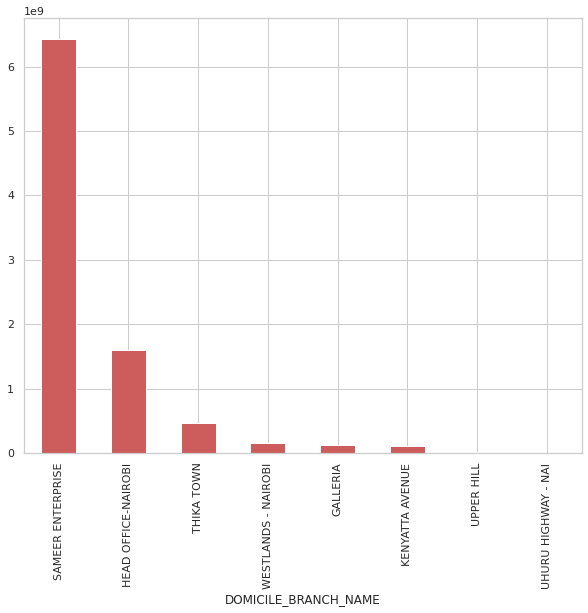

In [ ]:
#Let's check the distribution of the domicile branch names
plt.figure(figsize=(10,8))
model_data.groupby("DOMICILE_BRANCH_NAME").sum().sort_values(by = "AMOUNT", ascending = False).head(30)["AMOUNT"].plot(kind = "bar", color = 'IndianRed')

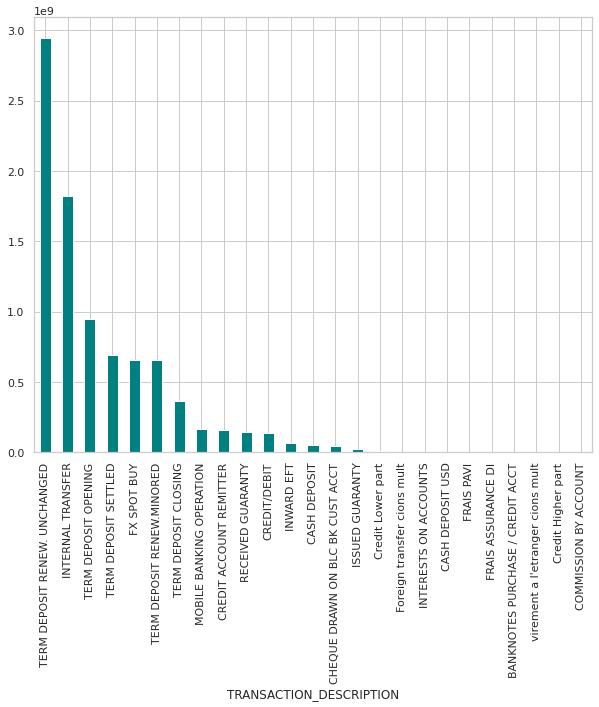

In [ ]:
#Let's check the distribution of the transactions descriptions
plt.figure(figsize=(10,8))
model_data.groupby("TRANSACTION_DESCRIPTION").sum().sort_values(by = "AMOUNT", ascending = False).head(30)["AMOUNT"].plot(kind = "bar", color = 'teal')

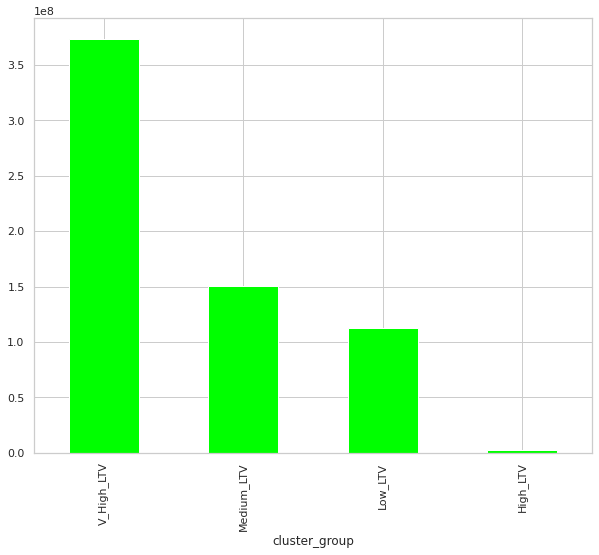

In [ ]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
cltv_final.groupby("cluster_group").sum().sort_values(by = "monetary_value", ascending = False).head(30)["monetary_value"].plot(kind = "bar", color = 'lime')

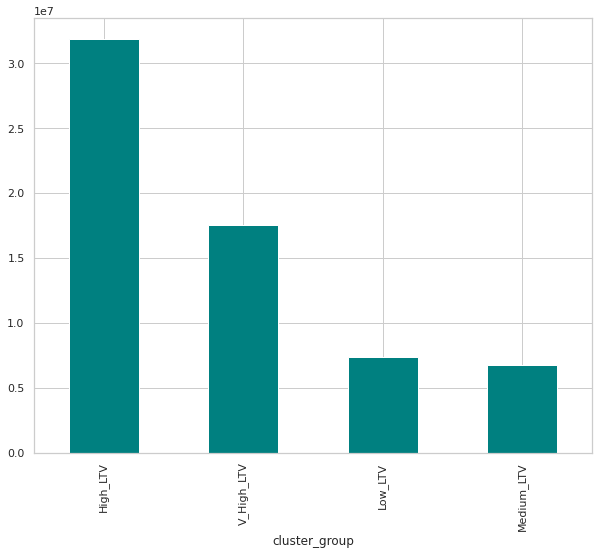

In [ ]:
#Let's check the amount transacted distribution across the customer segments
plt.figure(figsize=(10,8))
model_data.groupby("cluster_group").sum().sort_values(by = "AMOUNT", ascending = False).head(30)["AMOUNT"].plot(kind = "bar", color = 'Teal')

**Feature Engineering**

In [ ]:
temp_data = model_data.copy() #creating a data copy point

In [ ]:
model_data.head(3) #use the temp data for adding some extra columns to the data

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION cluster_group  
0              MFS  MOBILE BANKING OPERATION       Low_LTV  
1              MFS  MOBILE BANKING OPERATION       Low_LTV  
2               VI         INTERNAL TRANSFER       Low_LTV

In [ ]:
#Date Time Analysis
model_data.loc[:, "Month"] = model_data.TRANS_DATE.dt.month
model_data.loc[:, "Time"] = model_data.TRANS_DATE.dt.time
model_data.loc[:, "Year"] = model_data.TRANS_DATE.dt.year
model_data.loc[:, "Day"] = model_data.TRANS_DATE.dt.day
model_data.loc[:, "Quarter"] = model_data.TRANS_DATE.dt.quarter
model_data.loc[:, "Day of Week"] = model_data.TRANS_DATE.dt.dayofweek

In [ ]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [ ]:
#renaming the data values using map function
model_data["Day of Week"] = model_data["Day of Week"].map(dayofweek_mapping)

In [ ]:
model_data.head(2)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE    AMOUNT  \
0            10846      1084620300 2021-01-07 13318.000   
1            10846      1084620300 2021-01-07   500.000   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION cluster_group  Month      Time  \
0              MFS  MOBILE BANKING OPERATION       Low_LTV      1  00:00:00   
1              MFS  MOBILE BANKING OPERATION       Low_LTV      1  00:00:00   

   Year  Day  Quarter Day of Week  
0  2021    7        1    Thursday  
1  2021    7        1    Thursday

In [ ]:
import datetime
from datetime import datetime

In [ ]:
import calendar
model_data['Month'] = model_data['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
model_data.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION cluster_group Month      Time  \
0              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
1              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
2               VI         INTERNAL TRANSFER       Low_LTV   Jan  00:00:00   

   Year  Day  Quarter Day of Week  
0  2021    7        1    Thursday  
1  2021    7        1    Thursday  
2  2021    7        1    Thursday

In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CUSTOMER_NUMBER          5938 non-null   int64         
 1   ACCOUNT_NUMBER           5938 non-null   int64         
 2   TRANS_DATE               5938 non-null   datetime64[ns]
 3   AMOUNT                   5938 non-null   float64       
 4   NARRATION                5938 non-null   object        
 5   RM_CODE                  5938 non-null   object        
 6   RM_NAME                  5938 non-null   object        
 7   DOMICILE_BRANCH_CODE     5938 non-null   int64         
 8   DOMICILE_BRANCH_NAME     5938 non-null   object        
 9   TRANSACTION_CODE         5938 non-null   object        
 10  TRANSACTION_DESCRIPTION  5938 non-null   object        
 11  cluster_group            88 non-null     object        
 12  Month                    5938 non-

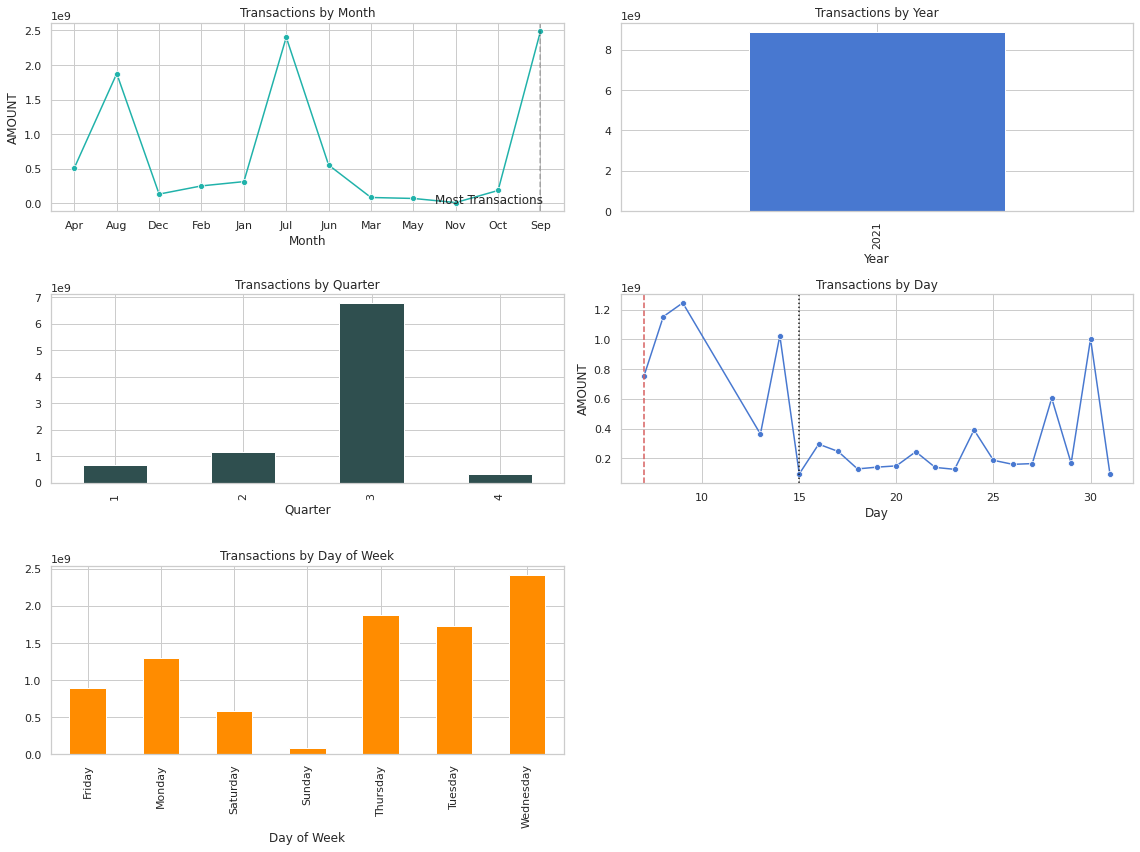

In [ ]:
#Plotting the above data
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "AMOUNT", data = model_data.groupby("Month").sum("AMOUNT"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
model_data.groupby("Year").sum()["AMOUNT"].plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
model_data.groupby("Quarter").sum()["AMOUNT"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "AMOUNT", data = model_data.groupby("Day").sum("AMOUNT"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
model_data.groupby("Day of Week").sum()["AMOUNT"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

**Time Cohort Analysis: Retention Rate**

The flow of this Analysis will be:

Segment customers into cohorts based on the month they made their first purchase in.
We will then assign a cohort index to each purchase of all the customer. i.e we will mark each transaction based on that customers relative time period difference since his first purchase(Cohort he belongs to).
Cohort Index assigned will represent months since the 1st transaction of that particular customer.

In the Last step, we will calculate various business metrics such as retention rate or Revenue Generated with respect to each Cohort and build a Cohort Chart using Heatmap to represent the results.


A cohort simply means that a group of people they have same characteristics.

Generally, we have three type of cohort analysis:

**Time Cohorts or Acquisition Cohorts:** Groups are divided by first activity.
Behavior cohorts or Segment-Based cohorts: Groups are divided by their behaivors and actions about your service.

**Size Cohorts:** Size-based cohorts refer to the various sizes of customers who purchase a company’s products or services.

In [ ]:
print("Min date: {} \nMax date: {}".format(model_data.TRANS_DATE	.min(), model_data.TRANS_DATE	.max()))
print("Time difference is: {}".format(model_data.TRANS_DATE	.max() - model_data.TRANS_DATE.min()))

Min date: 2021-01-07 00:00:00 
Max date: 2021-12-08 00:00:00
Time difference is: 335 days 00:00:00


Cohort analysis is a tool to measure user engagement over time. It helps to know whether user engagement is actually getting better over time or is only appearing to improve because of growth.

Cohort analysis proves to be valuable because it helps to separate growth metrics from engagement metrics as growth can easily mask engagement problems. In reality, the lack of activity of the old users is being hidden by the impressive growth numbers of new users, which results in concealing the lack of engagement from a small number of people.

**Calculating time offset in Months i.e. Cohort Index:**

In [ ]:
def get_date(x):
    '''
    Prase year and month values

    '''
    return dt.datetime(x.year, x.month, 1)

Since, We will be performing Cohort Analysis based on Transaction records of Customers, we will be Dealing with Mainly:

Transaction Data
CustomerID
Amount Transcated and Quantity columns in this Analsyis.

**The Following steps will performed to generate the Cohort Chart of Retention Rate:**

Month Extraction from InvioceDate column

Assigning Cohort to Each Transaction

Assigning Cohort Index to each transaction

Calculating number of unique customers in each Group of (ChortDate,Index)

Creating Cohort Table for Retention Rate

Creating the Cohort Chart using the Cohort Table

In [ ]:
# Get month information from dataframe
model_data['TransactMonth'] = model_data['TRANS_DATE'].apply(get_date)
 
model_data.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION cluster_group Month      Time  \
0              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
1              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
2               VI         INTERNAL TRANSFER       Low_LTV   Jan  00:00:00   

   Year  Day  Quarter Day of Week TransactMonth  
0  2021    7        1    Thursday    2021-01-01  
1  2021    7        1    Thursday    2021-01-01  
2  2021    7        1    Thursday    2021-01-01

In [ ]:
# Group each customer based on their ID and select TransactMonth value
grouping = model_data.groupby('CUSTOMER_NUMBER')['TransactMonth']

# Get first month of each customer acqusition
model_data['CohortMonth'] = grouping.transform('min')

model_data.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION cluster_group Month      Time  \
0              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
1              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
2               VI         INTERNAL TRANSFER       Low_LTV   Jan  00:00:00   

   Year  Day  Quarter Day of Week TransactMonth CohortMonth  
0  2021    7        1    Thursday    2021-01-01  2021-01-01  
1  2021    7        1    Thursday    2021-01-01  2021-01-01  
2  2021    7        1    Thursday    2021-01-01  2021-01-01

In [ ]:
def get_date_int(dataframe, column):
    '''
    Extract year, month, and day values

    '''
    year = dataframe[column].dt.year
    month = dataframe[column].dt.month
    day = dataframe[column].dt.day
    return year, month, day

In [ ]:
# Extract year, month, and day from InvoiceMonth and CohortMonth
invoice_year, invoice_month, invoice_day = get_date_int(model_data, 'TransactMonth')
cohort_year, cohort_month, cohort_day = get_date_int(model_data, 'CohortMonth')

In [ ]:
# Calculate the difference between first acqusition and date of each transaction
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
days_diff = invoice_day - cohort_day

In [ ]:
# Calculate time offset in months
model_data['CohortIndex'] = (years_diff * 12 + months_diff + 1)
model_data.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION cluster_group Month      Time  \
0              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
1              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
2               VI         INTERNAL TRANSFER       Low_LTV   Jan  00:00:00   

   Year  Day  Quarter Day of Week TransactMonth CohortMonth  CohortIndex  
0  2021    7        1    Thursday    2021-01-01  2021-01-01            1  
1  2021    7        1    Thursday    2021-01-01  2021-01-01            1  
2  2021    7        1    Thursday    2021-01-01  2021-01-01            1

In [ ]:
grouped = model_data.groupby(['TransactMonth', 'CohortMonth'])

cohorts = grouped.agg({'CUSTOMER_NUMBER':pd.Series.nunique,
                       'ACCOUNT_NUMBER':pd.Series.nunique,
                       'AMOUNT':np.sum})
cohorts.rename(columns = {'CUSTOMER_NUMBER': 'TotalCustomers',
               'ACCOUNT_NUMBER': 'TotalTransactionsMade'}, inplace = True)
cohorts.head()

TotalCustomers  TotalTransactionsMade        AMOUNT
TransactMonth CohortMonth                                                     
2021-01-01    2021-01-01               30                     46 314784634.170
2021-02-01    2021-01-01               23                     34 123939930.500
              2021-02-01               14                     16 129088953.530
2021-03-01    2021-01-01               20                     31  55690192.700
              2021-02-01                4                      4    550863.510

In [ ]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df))+1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.tail()

TotalCustomers  TotalTransactionsMade       AMOUNT  \
TransactMonth CohortMonth                                                       
2021-12-01    2021-02-01                3                      3   161628.000   
              2021-03-01                2                      2 13697670.000   
              2021-07-01                3                      3  2014324.000   
              2021-08-01                1                      1   400000.000   
              2021-12-01                1                      2 16125000.000   

                           CohortPeriod  
TransactMonth CohortMonth                
2021-12-01    2021-02-01              2  
              2021-03-01              3  
              2021-07-01              4  
              2021-08-01              5  
              2021-12-01              6

In [ ]:
cohorts.reset_index(inplace=True)

In [ ]:
cohorts.set_index(['TransactMonth', 'CohortMonth'], inplace=True)
cohorts.head()

TotalCustomers  TotalTransactionsMade  \
TransactMonth CohortMonth                                          
2021-01-01    2021-01-01               30                     46   
2021-02-01    2021-01-01               23                     34   
              2021-02-01               14                     16   
2021-03-01    2021-01-01               20                     31   
              2021-02-01                4                      4   

                                 AMOUNT  CohortPeriod  
TransactMonth CohortMonth                              
2021-01-01    2021-01-01  314784634.170             1  
2021-02-01    2021-01-01  123939930.500             1  
              2021-02-01  129088953.530             2  
2021-03-01    2021-01-01   55690192.700             1  
              2021-02-01     550863.510             2

In [ ]:
cohort_group_size = cohorts['TotalCustomers'].groupby(level=0).first()
cohort_group_size.head()

TransactMonth
2021-01-01    30
2021-02-01    23
2021-03-01    20
2021-04-01    17
2021-05-01    19
Name: TotalCustomers, dtype: int64

In [ ]:
cohorts['TotalCustomers'].unstack(0).head()

TransactMonth  2021-01-01  2021-02-01  2021-03-01  2021-04-01  2021-05-01  \
CohortMonth                                                                 
2021-01-01         30.000      23.000      20.000      17.000      19.000   
2021-02-01            NaN      14.000       4.000       1.000       3.000   
2021-03-01            NaN         NaN       6.000       2.000       2.000   
2021-04-01            NaN         NaN         NaN       5.000       2.000   
2021-05-01            NaN         NaN         NaN         NaN       3.000   

TransactMonth  2021-06-01  2021-07-01  2021-08-01  2021-09-01  2021-10-01  \
CohortMonth                                                                 
2021-01-01         23.000      29.000      30.000      30.000      18.000   
2021-02-01          5.000       9.000      10.000      11.000       3.000   
2021-03-01          2.000       5.000       5.000       5.000       1.000   
2021-04-01          2.000       4.000       2.000       4.000         NaN   
2021-05-01          1.000       1.000       1.000       1.000         NaN   

TransactMonth  2021-11-01  2021-12-01  
CohortMonth                            
2021-01-01         15.000      20.000  
2021-02-01            NaN       3.000  
2021-03-01            NaN       2.000  
2021-04-01          2.000         NaN  
2021-05-01            NaN         NaN

In [ ]:
user_retention = cohorts['TotalCustomers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

TransactMonth  2021-01-01  2021-02-01  2021-03-01  2021-04-01  2021-05-01  \
CohortMonth                                                                 
2021-01-01          1.000       1.000       1.000       1.000       1.000   
2021-02-01            NaN       0.609       0.200       0.059       0.158   
2021-03-01            NaN         NaN       0.300       0.118       0.105   
2021-04-01            NaN         NaN         NaN       0.294       0.105   
2021-05-01            NaN         NaN         NaN         NaN       0.158   
2021-06-01            NaN         NaN         NaN         NaN         NaN   
2021-07-01            NaN         NaN         NaN         NaN         NaN   
2021-08-01            NaN         NaN         NaN         NaN         NaN   
2021-09-01            NaN         NaN         NaN         NaN         NaN   
2021-10-01            NaN         NaN         NaN         NaN         NaN   

TransactMonth  2021-06-01  2021-07-01  2021-08-01  2021-09-01  2021-10-01  \
CohortMonth                                                                 
2021-01-01          1.000       1.000       1.000       1.000       1.000   
2021-02-01          0.217       0.310       0.333       0.367       0.167   
2021-03-01          0.087       0.172       0.167       0.167       0.056   
2021-04-01          0.087       0.138       0.067       0.133         NaN   
2021-05-01          0.043       0.034       0.033       0.033         NaN   
2021-06-01          0.130       0.069       0.067       0.067         NaN   
2021-07-01            NaN       0.966       0.800       0.733       0.111   
2021-08-01            NaN         NaN       0.200       0.100         NaN   
2021-09-01            NaN         NaN         NaN       0.267       0.111   
2021-10-01            NaN         NaN         NaN         NaN       0.056   

TransactMonth  2021-11-01  2021-12-01  
CohortMonth                            
2021-01-01          1.000       1.000  
2021-02-01            NaN       0.150  
2021-03-01            NaN       0.100  
2021-04-01          0.133         NaN  
2021-05-01            NaN         NaN  
2021-06-01            NaN         NaN  
2021-07-01          0.067       0.150  
2021-08-01            NaN       0.050  
2021-09-01            NaN         NaN  
2021-10-01            NaN         NaN

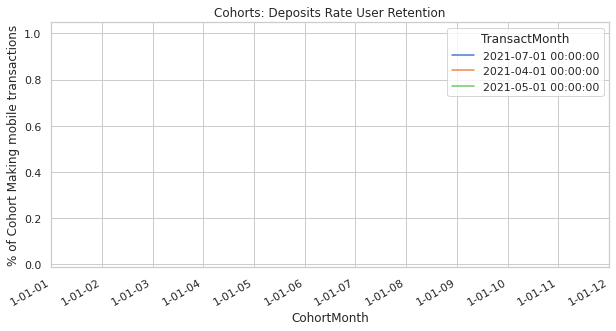

In [ ]:
user_retention[['2021-07-01','2021-04-01','2021-05-01']].plot(figsize=(10,5))
plt.title('Cohorts: Deposits Rate User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Making mobile transactions');

In [ ]:
cohort_order_size = cohorts['TotalTransactionsMade'].groupby(level=0).first()
cohort_order_size.head()

TransactMonth
2021-01-01    46
2021-02-01    34
2021-03-01    31
2021-04-01    21
2021-05-01    23
Name: TotalTransactionsMade, dtype: int64

In [ ]:
order_retention =cohorts['TotalTransactionsMade'].unstack(0).divide(cohort_order_size, axis=1)
order_retention.head(10)

TransactMonth  2021-01-01  2021-02-01  2021-03-01  2021-04-01  2021-05-01  \
CohortMonth                                                                 
2021-01-01          1.000       1.000       1.000       1.000       1.000   
2021-02-01            NaN       0.471       0.129       0.048       0.130   
2021-03-01            NaN         NaN       0.258       0.095       0.087   
2021-04-01            NaN         NaN         NaN       0.333       0.087   
2021-05-01            NaN         NaN         NaN         NaN       0.217   
2021-06-01            NaN         NaN         NaN         NaN         NaN   
2021-07-01            NaN         NaN         NaN         NaN         NaN   
2021-08-01            NaN         NaN         NaN         NaN         NaN   
2021-09-01            NaN         NaN         NaN         NaN         NaN   
2021-10-01            NaN         NaN         NaN         NaN         NaN   

TransactMonth  2021-06-01  2021-07-01  2021-08-01  2021-09-01  2021-10-01  \
CohortMonth                                                                 
2021-01-01          1.000       1.000       1.000       1.000       1.000   
2021-02-01          0.172       0.194       0.190       0.243       0.120   
2021-03-01          0.069       0.090       0.076       0.086       0.040   
2021-04-01          0.103       0.060       0.038       0.114         NaN   
2021-05-01          0.034       0.045       0.038       0.057         NaN   
2021-06-01          0.172       0.030       0.025       0.043         NaN   
2021-07-01            NaN       0.537       0.342       0.586       0.080   
2021-08-01            NaN         NaN       0.114       0.071         NaN   
2021-09-01            NaN         NaN         NaN       0.157       0.120   
2021-10-01            NaN         NaN         NaN         NaN       0.080   

TransactMonth  2021-11-01  2021-12-01  
CohortMonth                            
2021-01-01          1.000       1.000  
2021-02-01            NaN       0.107  
2021-03-01            NaN       0.071  
2021-04-01          0.100         NaN  
2021-05-01            NaN         NaN  
2021-06-01            NaN         NaN  
2021-07-01          0.050       0.107  
2021-08-01            NaN       0.036  
2021-09-01            NaN         NaN  
2021-10-01            NaN         NaN

**Count number of unique customer Id's falling in each group of CohortMonth and CohortIndex**

In [ ]:
# Count monthly active customers from each cohort
grouping = model_data.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of customers in each group via nunique of customerID
cohort_data = grouping['CUSTOMER_NUMBER'].apply(pd.Series.nunique)

# Reset index
cohort_data = cohort_data.reset_index()

cohort_data.head()

CohortMonth  CohortIndex  CUSTOMER_NUMBER
0  2021-01-01            1               30
1  2021-01-01            2               23
2  2021-01-01            3               20
3  2021-01-01            4               17
4  2021-01-01            5               19

Above data is our cohort table. Its interpretation is simple. For example, We have 874 unique customer with their first transaction is in 2010-12. Its cohort month is 2010-12 and cohort index is 1. Go on the one right cell, it is 319. Its mean, 319 unique customer retain their customership for next month.

**Retention Rate Calculation**

In [ ]:
# Create a pivot table for customer retention
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CUSTOMER_NUMBER')
cohort_counts

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2021-01-01  30.000 23.000 20.000 17.000 19.000 23.000 29.000 30.000 30.000   
2021-02-01  14.000  4.000  1.000  3.000  5.000  9.000 10.000 11.000  3.000   
2021-03-01   6.000  2.000  2.000  2.000  5.000  5.000  5.000  1.000    NaN   
2021-04-01   5.000  2.000  2.000  4.000  2.000  4.000    NaN  2.000    NaN   
2021-05-01   3.000  1.000  1.000  1.000  1.000    NaN    NaN    NaN    NaN   
2021-06-01   3.000  2.000  2.000  2.000    NaN    NaN    NaN    NaN    NaN   
2021-07-01  28.000 24.000 22.000  2.000  1.000  3.000    NaN    NaN    NaN   
2021-08-01   6.000  3.000    NaN    NaN  1.000    NaN    NaN    NaN    NaN   
2021-09-01   8.000  2.000    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2021-10-01   1.000    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2021-12-01   1.000    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12  
CohortMonth                       
2021-01-01  18.000 15.000 20.000  
2021-02-01     NaN  3.000    NaN  
2021-03-01   2.000    NaN    NaN  
2021-04-01     NaN    NaN    NaN  
2021-05-01     NaN    NaN    NaN  
2021-06-01     NaN    NaN    NaN  
2021-07-01     NaN    NaN    NaN  
2021-08-01     NaN    NaN    NaN  
2021-09-01     NaN    NaN    NaN  
2021-10-01     NaN    NaN    NaN  
2021-12-01     NaN    NaN    NaN

In [ ]:
def cohort_avg_value(cohort_grouping, column, decimal=3):

    # Count average value in each cohort
    cohort_data = grouping[column].mean()

    # Reset index of df
    cohort_data = cohort_data.reset_index()

    # Create a pivot table of average customer purchase value
    average_quantity = cohort_data.pivot(
        index='CohortMonth', columns='CohortIndex', values=column)

    # Round figures
    average_quantity = average_quantity.round(decimal)

    return average_quantity

In [ ]:
# Store first column as cohort size
cohort_sizes = cohort_counts.iloc[:, 0]

# Calculate percentage of active customers in each cohort
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Convert retention to percentage format
retention = retention.round(3)

In [ ]:
# Calculate average unit price per cohort
avg_cohort_price = cohort_avg_value(grouping, 'AMOUNT', 2)

# Calculate the avg quantity of items purchased in each cohort
avg_cohort_quantity = cohort_avg_value(grouping, 'AMOUNT', 1)

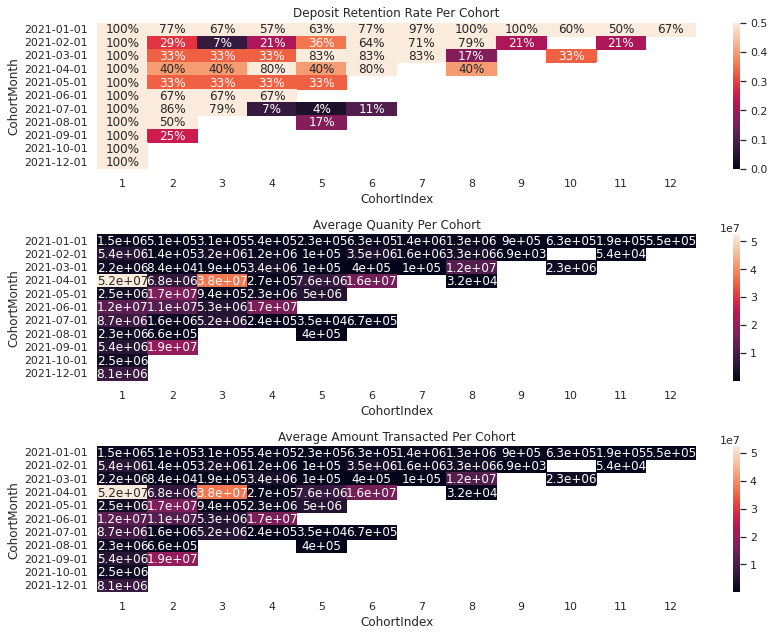

In [ ]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.title('Deposit Retention Rate Per Cohort')
ax = sns.heatmap(retention, annot=True, fmt='.0%', vmin=0, vmax=0.5)
ax.set_yticklabels(retention.index.date)

plt.subplot(3, 1, 2)
plt.title('Average Quanity Per Cohort')
ax = sns.heatmap(avg_cohort_quantity, annot=True)
ax.set_yticklabels(avg_cohort_quantity.index.date)

plt.subplot(3, 1, 3)
plt.title('Average Amount Transacted Per Cohort')
ax = sns.heatmap(avg_cohort_price, annot=True)
ax.set_yticklabels(avg_cohort_price.index.date)

plt.tight_layout()

**Deposit Retention RateHeatmap**

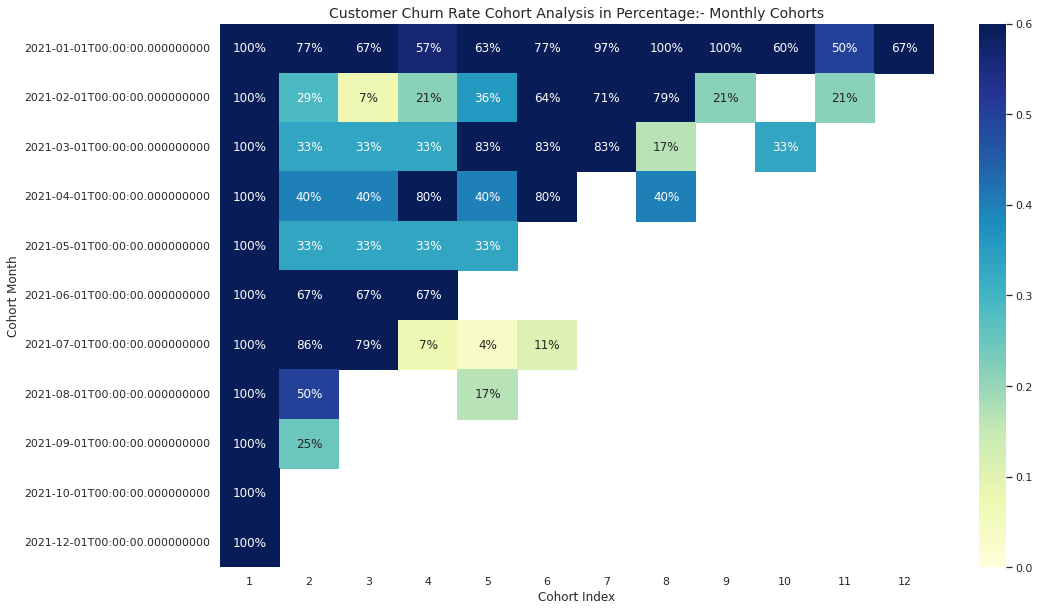

In [ ]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Customer Churn Rate Cohort Analysis in Percentage:- Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

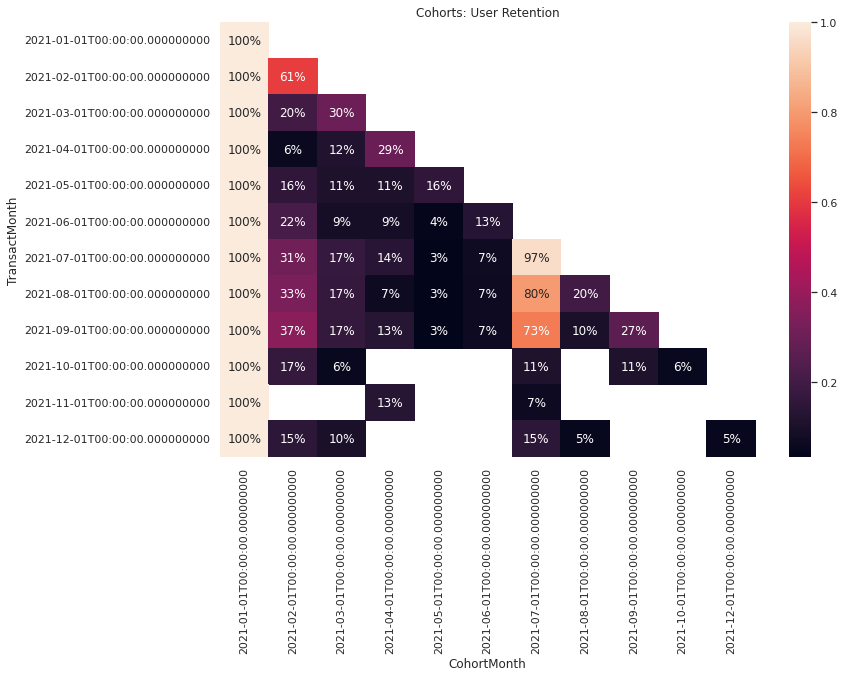

In [ ]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

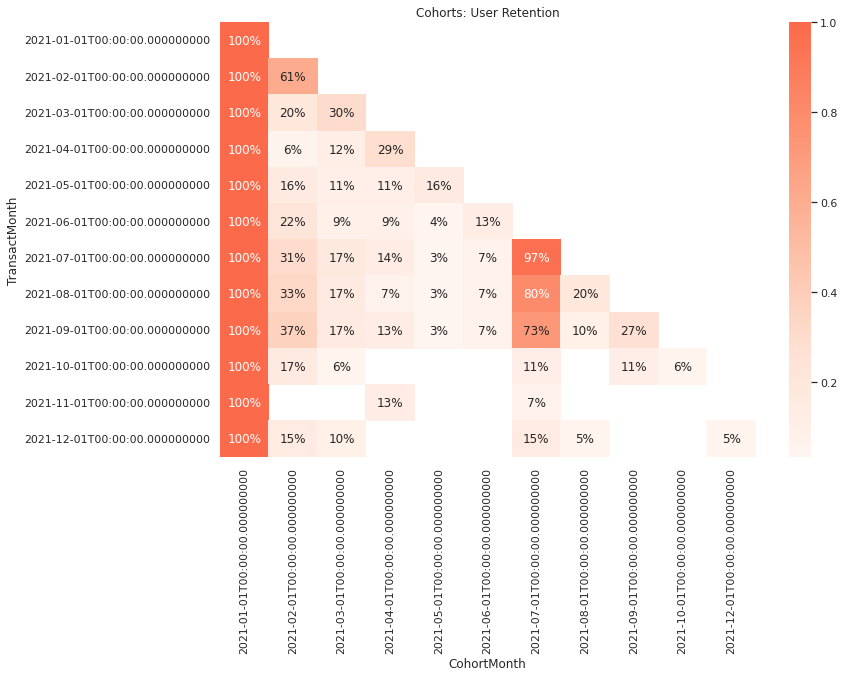

In [ ]:
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%',cmap="Reds",center=1)

In [ ]:
customer_per_month = model_data.groupby("CohortMonth")["CUSTOMER_NUMBER"].nunique().values
customers = customer_per_month.cumsum()
customers = customers[::-1]
customers

array([105, 104, 103,  95,  89,  61,  58,  55,  50,  44,  30])

In [ ]:
customer_in_month = model_data.groupby("CohortIndex")["CUSTOMER_NUMBER"].nunique()
customer_in_month

CohortIndex
1     105
2      63
3      50
4      31
5      34
6      44
7      44
8      44
9      33
10     20
11     18
12     20
Name: CUSTOMER_NUMBER, dtype: int64

In [ ]:
monthly_customer_price_df = model_data.groupby("TransactMonth").agg({"AMOUNT": "sum",
                                                            "CUSTOMER_NUMBER": "nunique"})
monthly_customer_price_df

AMOUNT  CUSTOMER_NUMBER
TransactMonth                                
2021-01-01     314784634.170               30
2021-02-01     253028884.030               37
2021-03-01      85392260.040               30
2021-04-01     514491688.100               25
2021-05-01      71424832.150               29
2021-06-01     554861914.660               36
2021-07-01    2401539529.490               78
2021-08-01    1876323192.270               80
2021-09-01    2487708007.600               86
2021-10-01     186858021.760               27
2021-11-01      12349502.450               18
2021-12-01     134357683.000               30

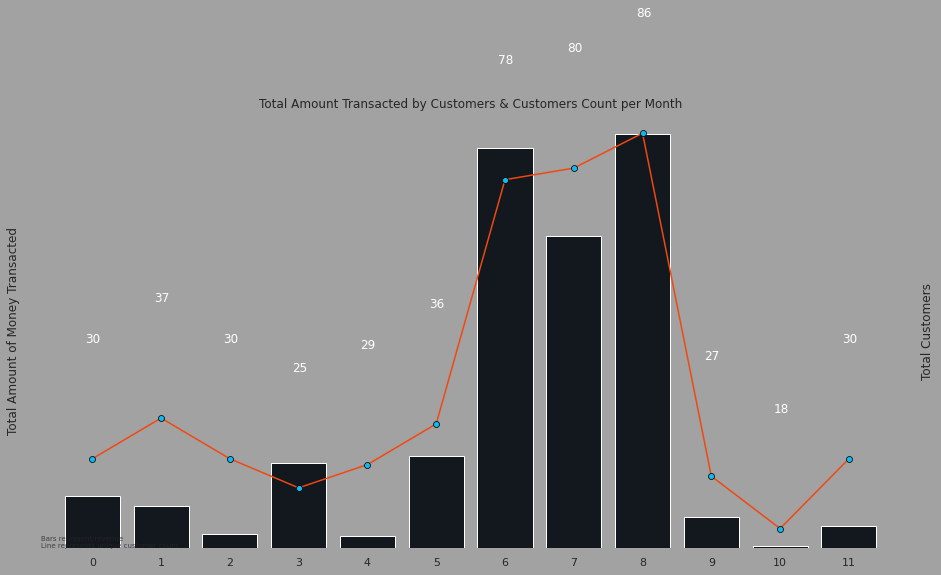

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8), facecolor = "#A2A2A2")
ax.set_facecolor("#A2A2A2")

sns.barplot(x = np.arange(len(monthly_customer_price_df.index)), y = monthly_customer_price_df.AMOUNT	, ax = ax,
            color = "#101820")
ax2 = ax.twinx()
sns.lineplot(x = np.arange(len(monthly_customer_price_df.index)), y = monthly_customer_price_df.CUSTOMER_NUMBER, ax = ax2,
            color = "#F1480F", marker = "o", markerfacecolor = "#0EB8F1", markeredgecolor = "#000000")

ax.set_yticks([])
ax2.set_yticks([])
ax2.set_ylabel("Total Customers")
ax.set_ylabel("Total Amount of Money Transacted")
plt.title("Total Amount Transacted by Customers & Customers Count per Month")
ax.text(-0.75, 1000000, "Bars represent revenue \nLine represents unique customer count", 
        fontsize = 7, alpha = 0.8)
for x, y in zip(np.arange(len(monthly_customer_price_df.index)),  monthly_customer_price_df.CUSTOMER_NUMBER):
    ax2.text(x -0.1, y + 20 , y, color = "white")
    
sns.despine(left = True, right = True, bottom = True, top = True)
plt.show()

**Customer Churn Status Calculation**

In [ ]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

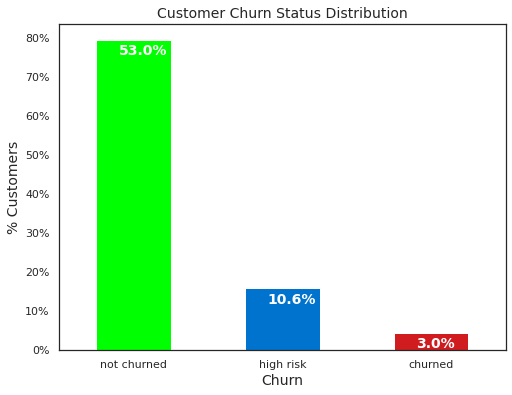

In [ ]:
colors = ['lime', '#0073cf', '#d01c1f']
ax = (cltv_final['churn'].value_counts()*100.0 /len(cltv_final)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Customer Churn Status Distribution', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

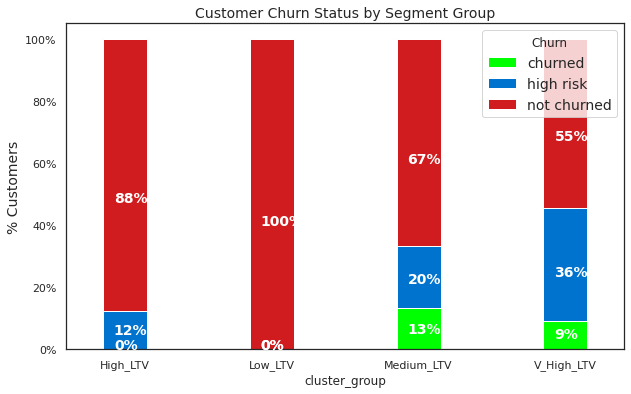

In [ ]:
colors = ['lime', '#0073cf', '#d01c1f']
contract_churn = cltv_final.groupby(['cluster_group','churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Customer Churn Status by Segment Group',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, '# of Customers by their tenure')

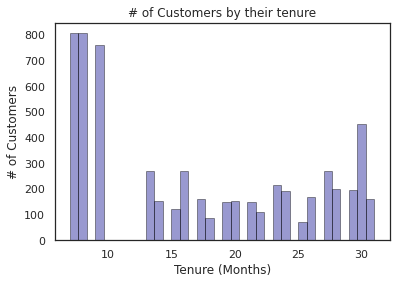

In [ ]:
ax = sns.distplot(model_data['Day'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (Months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, 'Distribution of the Customer Churn Status by the amount transacted')

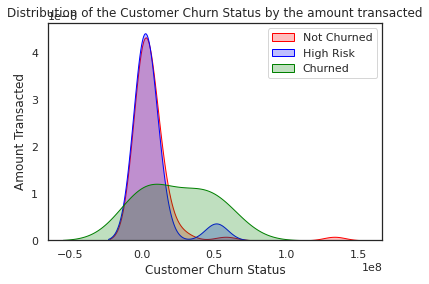

In [ ]:
ax = sns.kdeplot(cltv_final.monetary_value[(cltv_final["churn"] == 'not churned') ],
                color="Red", shade = True)
ax = sns.kdeplot(cltv_final.monetary_value[(cltv_final["churn"] == 'high risk') ],
                ax =ax, color="Blue", shade= True)
ax = sns.kdeplot(cltv_final.monetary_value[(cltv_final["churn"] == 'churned') ],
                ax =ax, color="Green", shade= True)
ax.legend(["Not Churned","High Risk", "Churned"],loc='upper right')
ax.set_ylabel('Amount Transacted')
ax.set_xlabel('Customer Churn Status')
ax.set_title('Distribution of the Customer Churn Status by the amount transacted')

In [ ]:
cltv_final['churn'].value_counts()

not churned    70
high risk      14
churned         4
Name: churn, dtype: int64

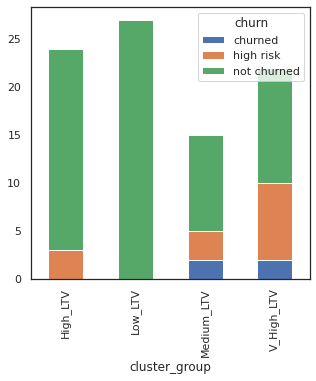

In [ ]:
cltv_final.groupby(["cluster_group", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [ ]:
y_True = cltv_final["churn"][cltv_final["churn"] == 'churned']
print ("Churn Percentage Rate is = "+str( (y_True.shape[0] / cltv_final["churn"].shape[0]) * 100 ))

Churn Percentage Rate is = 4.545454545454546


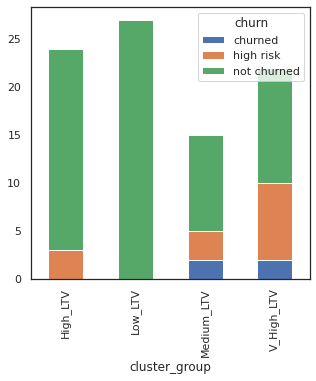

In [ ]:
cltv_final.groupby(["cluster_group", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

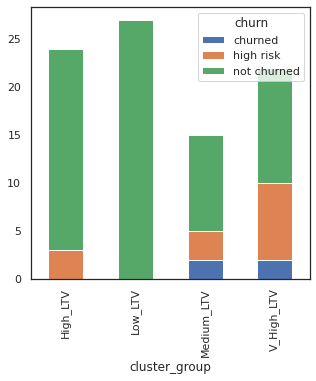

In [ ]:
cltv_final.groupby(["cluster_group", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

Text(0.5, 1.0, 'Distribution of the Customer Churn Status by the amount transacted')

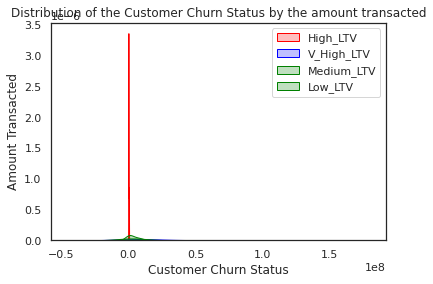

In [ ]:
ax = sns.kdeplot(cltv_final.monetary_value[(cltv_final["cluster_group"] == 'High_LTV') ],
                color="Red", shade = True)
ax = sns.kdeplot(cltv_final.monetary_value[(cltv_final["cluster_group"] == 'V_High_LTV') ],
                ax =ax, color="Blue", shade= True)
ax = sns.kdeplot(cltv_final.monetary_value[(cltv_final["cluster_group"] == 'Medium_LTV') ],
                ax =ax, color="Green", shade= True)
ax = sns.kdeplot(cltv_final.monetary_value[(cltv_final["cluster_group"] == 'Low_LTV') ],
                ax =ax, color="Green", shade= True)
ax.legend(["High_LTV","V_High_LTV", "Medium_LTV", 'Low_LTV'],loc='upper right')
ax.set_ylabel('Amount Transacted')
ax.set_xlabel('Customer Churn Status')
ax.set_title('Distribution of the Customer Churn Status by the amount transacted')

In [ ]:
cltv_final['cluster_group'].value_counts()

Low_LTV       27
High_LTV      24
V_High_LTV    22
Medium_LTV    15
Name: cluster_group, dtype: int64

In [ ]:
cltv_final.head(3)

CUSTOMER_NUMBER  frequency  recency       T  monetary_value  \
0            10468     47.000  334.000 335.000    25279393.870   
1            10846     32.000  335.000 335.000       15089.469   
2            10953     64.000  335.000 335.000     7682873.763   

   predicted_mobile_transactions  p_alive        churn           LTV  \
0                          4.022    0.997  not churned 108980969.786   
1                          2.776    0.996  not churned    138938.522   
2                          5.437    0.998  not churned  43844896.238   

   expected_average_profit  expected_transac_1_month  expected_trans_1_week  \
0             25513528.805                     0.538                  0.135   
1                15295.697                     0.371                  0.093   
2              7735002.139                     0.727                  0.182   

            clv  scaled_clv segment cluster_group  
0 309381877.283       1.000       A       Low_LTV  
1    127733.074       0.000       D       Low_LTV  
2 126834883.623       0.410       A       Low_LTV

**Number of New Customers by Month**

In [ ]:
df_for_trend = model_data.copy()

In [ ]:
df_for_trend.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION cluster_group Month      Time  \
0              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
1              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
2               VI         INTERNAL TRANSFER       Low_LTV   Jan  00:00:00   

   Year  Day  Quarter Day of Week TransactMonth CohortMonth  CohortIndex  
0  2021    7        1    Thursday    2021-01-01  2021-01-01            1  
1  2021    7        1    Thursday    2021-01-01  2021-01-01            1  
2  2021    7        1    Thursday    2021-01-01  2021-01-01            1

In [ ]:
df_for_trend['TransactMonth'] = pd.to_datetime(df_for_trend['TransactMonth'])

In [ ]:
df_for_trend['TransactMonth']=df_for_trend['TransactMonth'].dt.month_name()

In [ ]:
df_for_trend.head(3)

CUSTOMER_NUMBER  ACCOUNT_NUMBER TRANS_DATE      AMOUNT  \
0            10846      1084620300 2021-01-07   13318.000   
1            10846      1084620300 2021-01-07     500.000   
2            11437      1143720300 2021-01-07 1578121.300   

                                           NARRATION RM_CODE  \
0  MPESA C2B TRANSFER 254728933964 PG14RYYH8O CCF...      D9   
1  MPESA C2B TRANSFER 254721796894 PG10SN6MOM CCF...      D9   
2  TRANSFER RECEIVED BY ORDER OF MEDAIR CHMPP.O B...      D9   

              RM_NAME  DOMICILE_BRANCH_CODE DOMICILE_BRANCH_NAME  \
0  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
1  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   
2  JOSEPH WAWERU MWAI                  1016    SAMEER ENTERPRISE   

  TRANSACTION_CODE   TRANSACTION_DESCRIPTION cluster_group Month      Time  \
0              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
1              MFS  MOBILE BANKING OPERATION       Low_LTV   Jan  00:00:00   
2               VI         INTERNAL TRANSFER       Low_LTV   Jan  00:00:00   

   Year  Day  Quarter Day of Week TransactMonth CohortMonth  CohortIndex  
0  2021    7        1    Thursday       January  2021-01-01            1  
1  2021    7        1    Thursday       January  2021-01-01            1  
2  2021    7        1    Thursday       January  2021-01-01            1

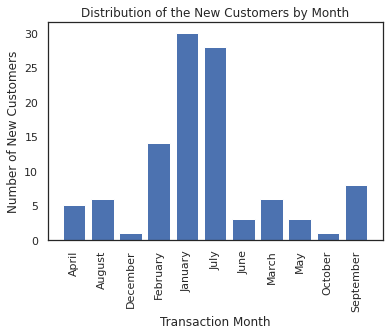

In [ ]:
#Define new customer

cust_wt_fst_order = df_for_trend.groupby(['CUSTOMER_NUMBER']).TRANS_DATE.min().reset_index()
cust_wt_fst_order = cust_wt_fst_order.rename(columns = {"TRANS_DATE" : "FirstTRANS_DATE"})

df_for_trend = df_for_trend.merge(cust_wt_fst_order,left_on = 'CUSTOMER_NUMBER',right_on = 'CUSTOMER_NUMBER',how = 'left')

df_for_trend['FirstOrderFlg'] = (df_for_trend['TRANS_DATE'] == df_for_trend['FirstTRANS_DATE'])

df_new_cust = df_for_trend[df_for_trend['FirstOrderFlg']==True][['CUSTOMER_NUMBER','TransactMonth']].drop_duplicates()

agg_df_new_cust = df_new_cust.groupby("TransactMonth").CUSTOMER_NUMBER.nunique().reset_index()
plt.bar(agg_df_new_cust['TransactMonth'],agg_df_new_cust['CUSTOMER_NUMBER'])
plt.xticks(rotation=90)
plt.xlabel("Transaction Month")
plt.ylabel("Number of New Customers")
plt.title('Distribution of the New Customers by Month')
plt.show()

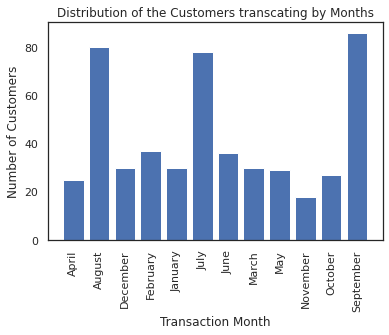

In [ ]:
agg_df_cust = df_for_trend.groupby("TransactMonth").CUSTOMER_NUMBER.nunique().reset_index()

plt.bar(agg_df_cust['TransactMonth'],agg_df_cust['CUSTOMER_NUMBER'])
plt.xticks(rotation=90)
plt.xlabel("Transaction Month")
plt.ylabel("Number of Customers")
plt.title('Distribution of the Customers transcating by Months')

plt.show()

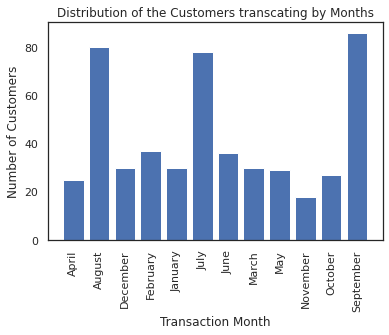

In [ ]:
agg_df_cust = df_for_trend.groupby("TransactMonth").CUSTOMER_NUMBER.nunique().reset_index()

plt.bar(agg_df_cust['TransactMonth'],agg_df_cust['CUSTOMER_NUMBER'])
plt.xticks(rotation=90)
plt.xlabel("Transaction Month")
plt.ylabel("Number of Customers")
plt.title('Distribution of the Customers transcating by Months')

plt.show()